# Import Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import matplotlib.colors as colors
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
import matplotlib as mpl
from sklearn.utils.validation import column_or_1d
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization, Activation
from sklearn.metrics import root_mean_squared_error
import seaborn as sns
from scikeras.wrappers import KerasRegressor

# Import Data

In [3]:
x_UnNor_RF_rfecv = pd.read_csv('x_UnNor_RF_rfecv.csv')
x_UnNor_svr_rfecv = pd.read_csv('x_UnNor_svr_rfecv.csv')
x_UnNor_sfs_svr = pd.read_csv('x_UnNor_sfs_svr_NRMS.csv')
x_UnNor_rf_feature_impor = pd.read_csv('x_UnNor_rf_feature_impor.csv')
x_UnNor_mutual_info = pd.read_csv('x_UnNor_mutual_info.csv')
x_UnNor_lasso = pd.read_csv('x_UnNor_lasso.csv')
y_UnNor = pd.read_csv('y_UnNor.csv')
x_UnNor = pd.read_csv('x_UnNor.csv')

x_RF_rfecv = x_UnNor_RF_rfecv.copy()
x_svr_rfecv = x_UnNor_svr_rfecv.copy()
x_sfs_svr = x_UnNor_sfs_svr.copy()
x_rf_feature_impor = x_UnNor_rf_feature_impor.copy()
x_mutual_info = x_UnNor_mutual_info.copy()
x_lasso = x_UnNor_lasso.copy()
y = y_UnNor.copy()
x = x_UnNor.copy()

Conti_Count_Features = pd.read_csv('cont_count_features.csv')
ohe_label_encoded_cols = pd.read_csv('ohe_label_encoded_cols.csv')
ordinal_encoded_features = pd.read_csv('ordinal_encoded_features.csv')

In [4]:
print('Number of feature in mutual information method: %s \n' % len(x_UnNor_mutual_info.columns))
print('Number of feature in random forest features importance method: %s \n' % len(x_UnNor_rf_feature_impor.columns))
print('Number of feature in svr Sequential Feature Selector method: %s \n' % len(x_UnNor_sfs_svr.columns))
print('Number of feature in Lasso method: %s \n' % len(x_UnNor_lasso.columns))
print('Number of feature in svr RECURSIVE FEATURE ELIMINATION method: %s \n' % len(x_UnNor_svr_rfecv.columns))
print('Number of feature in random forest RECURSIVE FEATURE ELIMINATION method: %s \n' % len(x_UnNor_RF_rfecv.columns))
print('Number of feature in Original data: %s \n' % len(x_UnNor.columns))
print('Number of Samples: %s \n' % len(x_UnNor.index))

Number of feature in mutual information method: 34 

Number of feature in random forest features importance method: 11 

Number of feature in svr Sequential Feature Selector method: 31 

Number of feature in Lasso method: 62 

Number of feature in svr RECURSIVE FEATURE ELIMINATION method: 32 

Number of feature in random forest RECURSIVE FEATURE ELIMINATION method: 55 

Number of feature in Original data: 258 

Number of Samples: 2930 



In [5]:
print('selected features by mutual information method:\n %s \n' % x_UnNor_mutual_info.columns)
print('selected features by random forest features importance method:\n %s \n' % x_UnNor_rf_feature_impor.columns)
print('selected features by svr Sequential Feature Selector method:\n %s \n' % x_UnNor_sfs_svr.columns)
print('selected features by Lasso method:\n %s \n' % x_UnNor_lasso.columns)
print('selected features by svr RECURSIVE FEATURE ELIMINATION method:\n %s \n' % x_UnNor_svr_rfecv.columns)
print('selected features by random forest RECURSIVE FEATURE ELIMINATION method:\n %s \n' % x_UnNor_RF_rfecv.columns)

selected features by mutual information method:
 Index(['Overall Qual', 'Overall Cond', 'House Age', 'Restore Age', 'Full Bath',
       'TotRms AbvGrd', 'Fireplaces', 'Garage Cars',
       'Transformed Lot Frontage', 'Transformed Mas Vnr Area',
       'Transformed BsmtFin SF 1', 'Transformed Bsmt Unf SF',
       'Transformed Total Bsmt SF', 'Transformed Garage Area',
       'Transformed Lot Area', 'Transformed 1st Flr SF',
       'Transformed 2nd Flr SF', 'Transformed Gr Liv Area',
       'Transformed Open Porch SF', 'MS SubClass_60', 'Mas Vnr Type_None',
       'Foundation_CBlock', 'Foundation_PConc', 'Garage Type_Attchd',
       'Garage Type_Detchd', 'Exter Qual_encoded', 'Bsmt Qual_encoded',
       'Heating QC_encoded', 'Kitchen Qual_encoded', 'Fireplace Qu_encoded',
       'Bsmt Exposure_encoded', 'BsmtFin Type 1_encoded',
       'Garage Finish_encoded', 'Garage Age'],
      dtype='object') 

selected features by random forest features importance method:
 Index(['Overall Qual', 'Ho

In [6]:
x_RF_rfecv.head(2)

Overall Qual  Overall Cond  House Age  Restore Age  Bsmt Full Bath  \
0             6             5         65           65               1   
1             5             6         64           64               0   

   Full Bath  Half Bath  Bedroom AbvGr  TotRms AbvGrd  Fireplaces  ...  \
0          1          0              3              7           2  ...   
1          1          0              2              5           0  ...   

   Kitchen Qual_encoded  Fireplace Qu_encoded  Garage Cond_encoded  \
0                     3                     4                    3   
1                     3                     0                    3   

   Bsmt Exposure_encoded  BsmtFin Type 1_encoded  BsmtFin Type 2_encoded  \
0                      4                       4                       1   
1                      1                       3                       2   

   Functional_encoded  Garage Finish_encoded  Paved Drive_encoded  Garage Age  
0                   7                      3                    1          65  
1                   7                      1                    2          64  

[2 rows x 55 columns]

In [7]:
x_svr_rfecv.head(2)

Overall Qual  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
0             6          1          0              3              1   
1             5          1          0              2              1   

   TotRms AbvGrd  Fireplaces  Garage Cars  Transformed Mas Vnr Area  \
0              7           2            2                      4.73   
1              5           0            1                      0.00   

   Transformed Lot Area  ...  Roof Matl_WdShngl  Mas Vnr Type_None  \
0                 10.37  ...                  0                  0   
1                  9.36  ...                  0                  1   

   Garage Type_2Types  Garage Type_None  Misc Feature_Elev  \
0                   0                 0                  0   
1                   0                 0                  0   

   Kitchen Qual_encoded  Pool QC_encoded  Bsmt Exposure_encoded  \
0                     3                0                      4   
1                     3                0                      1   

   Functional_encoded  Has Garage  
0                   7           1  
1                   7           1  

[2 rows x 32 columns]

In [8]:
x_sfs_svr.head(2)

Overall Qual  Overall Cond  Bsmt Full Bath  Full Bath  Kitchen AbvGr  \
0             6             5               1          1              1   
1             5             6               0          1              1   

   Transformed Lot Area  Transformed 1st Flr SF  Transformed Gr Liv Area  \
0                 10.37                    7.41                     7.41   
1                  9.36                    6.80                     6.80   

   MS SubClass_85  MS SubClass_180  ...  Exterior 1st_Stone  \
0               0                0  ...                   0   
1               0                0  ...                   0   

   Exterior 2nd_PreCast  Foundation_CBlock  Central Air_Y  \
0                     0                  1              1   
1                     0                  1              1   

   Sale Condition_Family  Bsmt Qual_encoded  Kitchen Qual_encoded  \
0                      0                  3                     3   
1                      0                  3                     3   

   Fireplace Qu_encoded  Garage Cond_encoded  Paved Drive_encoded  
0                     4                    3                    1  
1                     0                    3                    2  

[2 rows x 31 columns]

In [9]:
x_rf_feature_impor.head(2)

Overall Qual  House Age  Full Bath  Garage Cars  Transformed BsmtFin SF 1  \
0             6         65          1            2                      6.46   
1             5         64          1            1                      6.15   

   Transformed Total Bsmt SF  Transformed Lot Area  Transformed 1st Flr SF  \
0                       6.99                 10.37                    7.41   
1                       6.78                  9.36                    6.80   

   Transformed Gr Liv Area  Bsmt Qual_encoded  Kitchen Qual_encoded  
0                     7.41                  3                     3  
1                     6.80                  3                     3

In [10]:
x_mutual_info.head(2)

Overall Qual  Overall Cond  House Age  Restore Age  Full Bath  \
0             6             5         65           65          1   
1             5             6         64           64          1   

   TotRms AbvGrd  Fireplaces  Garage Cars  Transformed Lot Frontage  \
0              7           2            2                      4.96   
1              5           0            1                      4.39   

   Transformed Mas Vnr Area  ...  Garage Type_Detchd  Exter Qual_encoded  \
0                      4.73  ...                   0                   3   
1                      0.00  ...                   0                   3   

   Bsmt Qual_encoded  Heating QC_encoded  Kitchen Qual_encoded  \
0                  3                   2                     3   
1                  3                   3                     3   

   Fireplace Qu_encoded  Bsmt Exposure_encoded  BsmtFin Type 1_encoded  \
0                     4                      4                       4   
1                     0                      1                       3   

   Garage Finish_encoded  Garage Age  
0                      3          65  
1                      1          64  

[2 rows x 34 columns]

In [11]:
x_lasso.head(2)

Overall Qual  Overall Cond  Bsmt Full Bath  Full Bath  Half Bath  \
0             6             5               1          1          0   
1             5             6               0          1          0   

   TotRms AbvGrd  Fireplaces  Garage Cars  Sold Age  Transformed Lot Frontage  \
0              7           2            2        15                      4.96   
1              5           0            1        15                      4.39   

   ...  Exter Qual_encoded  Bsmt Qual_encoded  Heating QC_encoded  \
0  ...                   3                  3                   2   
1  ...                   3                  3                   3   

   Kitchen Qual_encoded  Pool QC_encoded  Bsmt Exposure_encoded  \
0                     3                0                      4   
1                     3                0                      1   

   BsmtFin Type 1_encoded  Functional_encoded  Garage Finish_encoded  \
0                       4                   7                      3   
1                       3                   7                      1   

   Fence_encoded  
0              0  
1              3  

[2 rows x 62 columns]

In [12]:
x.head(2)

Overall Qual  Overall Cond  House Age  Restore Age  Low Qual Fin SF  \
0             6             5         65           65                0   
1             5             6         64           64                0   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  ...  \
0               1               0          1          0              3  ...   
1               0               0          1          0              2  ...   

   Pool QC_encoded  Bsmt Exposure_encoded  BsmtFin Type 1_encoded  \
0                0                      4                       4   
1                0                      1                       3   

   BsmtFin Type 2_encoded  Functional_encoded  Garage Finish_encoded  \
0                       1                   7                      3   
1                       2                   7                      1   

   Paved Drive_encoded  Fence_encoded  Has Garage  Garage Age  
0                    1              0           1          65  
1                    2              3           1          64  

[2 rows x 258 columns]

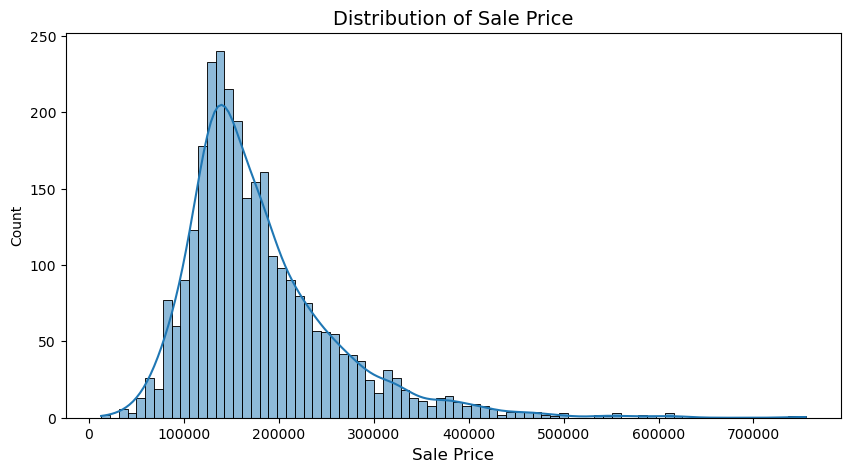

In [13]:
plt.figure(figsize=(10, 5))
sns.histplot(y, kde=True, color='limegreen', legend=False,bins=80)
plt.title('Distribution of Sale Price', fontsize=14)
plt.xlabel('Sale Price', fontsize=12)
plt.show()

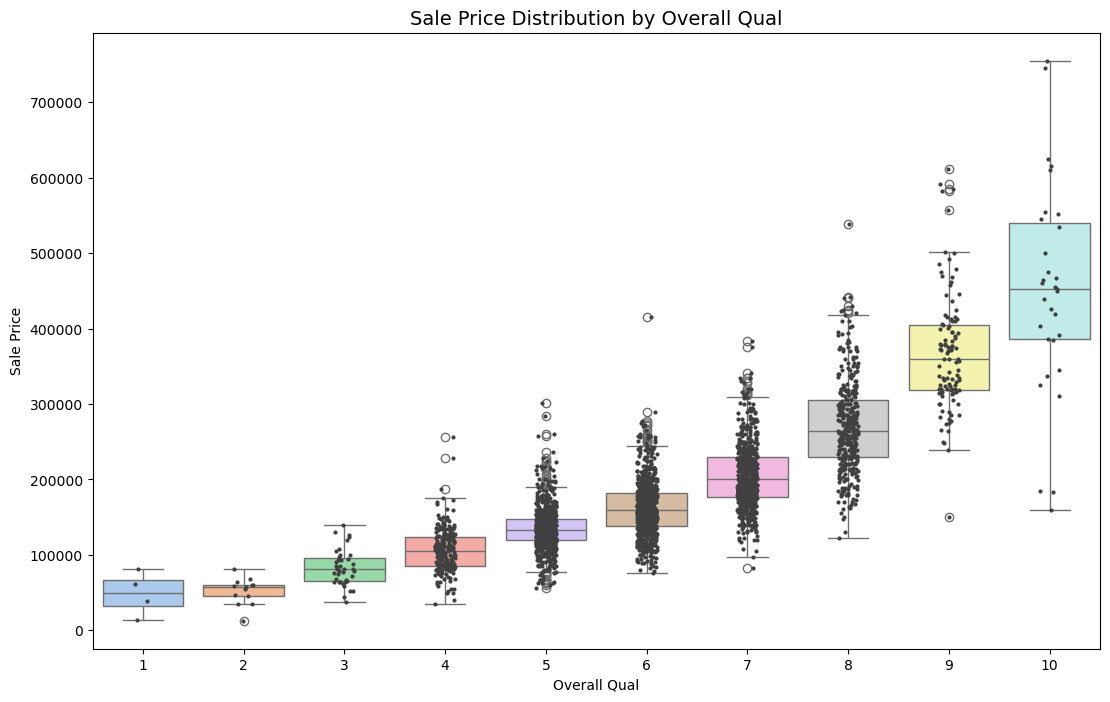

In [14]:
plt.figure(figsize=(13, 8))
sns.boxplot(x=x['Overall Qual'], y=y.values.reshape(-1), hue=x['Overall Qual'], legend=False, palette='pastel')
sns.stripplot(x=x['Overall Qual'], y=y.values.reshape(-1), color=".25", size=3)
plt.title('Sale Price Distribution by Overall Qual', fontsize=14)
plt.ylabel('Sale Price')
plt.show()

# Train Test Split

In [15]:
kfold = KFold(n_splits=5, random_state=42, shuffle=True)

In [16]:
# SVR SFS, Random Forest Features Importance, Lasso, RF RFECV, Original Data

x_train_RF_rfecv, x_test_RF_rfecv, y_train_RF_rfecv, y_test_RF_rfecv = train_test_split(x_RF_rfecv, y, random_state = 42, test_size= 0.3, shuffle=True)

#x_train_svr_rfecv, x_test_svr_rfecv, y_train_svr_rfecv, y_test_svr_rfecv = train_test_split(x_svr_rfecv, y, random_state = 42, test_size= 0.3, shuffle=True)

x_train_sfs_svr, x_test_sfs_svr, y_train_sfs_svr, y_test_sfs_svr = train_test_split(x_sfs_svr, y, random_state = 42, test_size= 0.3, shuffle=True)

x_train_rf_feature_impor, x_test_rf_feature_impor, y_train_rf_feature_impor, y_test_rf_feature_impor = train_test_split(x_rf_feature_impor, y, random_state = 42, test_size= 0.3, shuffle=True)

#x_train_mutual_info, x_test_mutual_info, y_train_mutual_info, y_test_mutual_info = train_test_split(x_mutual_info, y, random_state = 42, test_size= 0.3, shuffle=True)

x_train_lasso, x_test_lasso, y_train_lasso, y_test_lasso = train_test_split(x_lasso, y, random_state = 42, test_size= 0.3, shuffle=True)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size= 0.3, shuffle=True)

In [17]:
print(f'Number of train data : {x_train.shape[0]}')
print(f'Number of test data : {x_test.shape[0]}')
print(f'Number of random forest features importance Features : {x_train_rf_feature_impor.shape[1]}')
print(f'Number of SFS SVR Features : {x_train_sfs_svr.shape[1]}')
print(f'Number of RF RECURSIVE FEATURE ELIMINATION Features : {x_train_RF_rfecv.shape[1]}')
print(f'Number of Lasso Features : {x_train_lasso.shape[1]}')
print(f'Number of Original data (X) Features : {x_train.shape[1]}')

Number of train data : 2051
Number of test data : 879
Number of random forest features importance Features : 11
Number of SFS SVR Features : 31
Number of RF RECURSIVE FEATURE ELIMINATION Features : 55
Number of Lasso Features : 62
Number of Original data (X) Features : 258


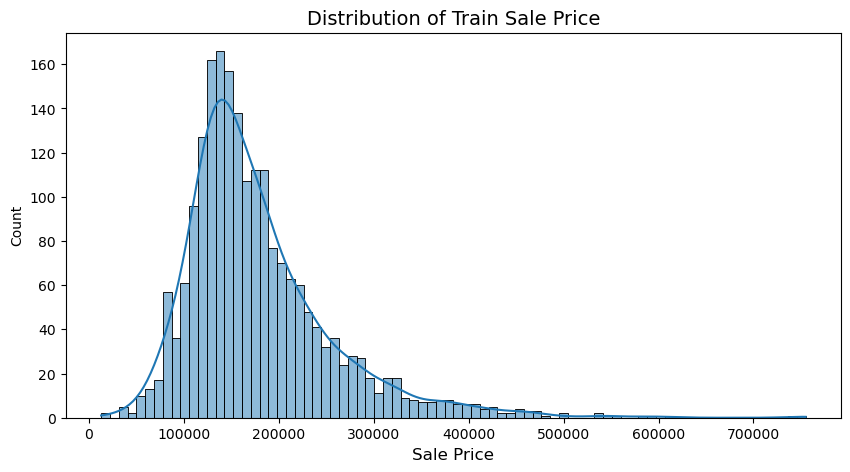

In [18]:
plt.figure(figsize=(10, 5))
sns.histplot(y_train, kde=True, color='red', legend=False,bins=80)
plt.title('Distribution of Train Sale Price', fontsize=14)
plt.xlabel('Sale Price', fontsize=12)
plt.show()

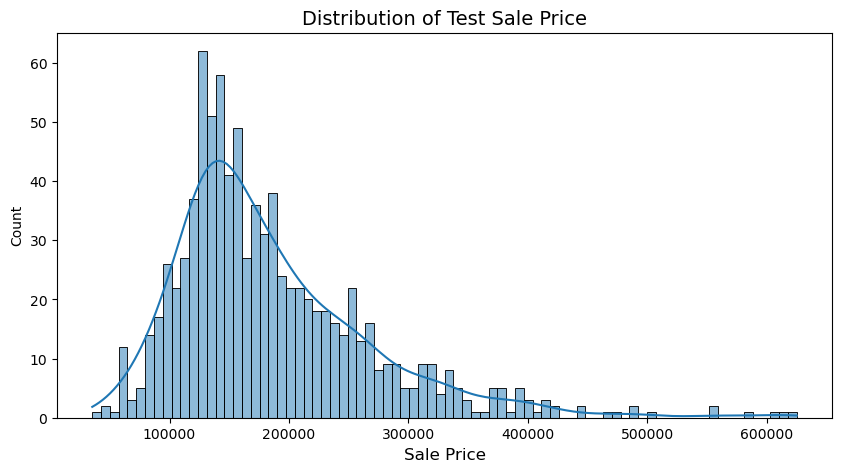

In [19]:
plt.figure(figsize=(10, 5))
sns.histplot(y_test, kde=True, color='blue', legend=False,bins=80)
plt.title('Distribution of Test Sale Price', fontsize=14)
plt.xlabel('Sale Price', fontsize=12)
plt.show()

# Normalization

In [20]:
minmaxscale = MinMaxScaler()

x_train_UnNor_RF_rfecv = x_train_RF_rfecv.copy()
x_test_UnNor_RF_rfecv = x_test_RF_rfecv.copy()
y_train_UnNor_RF_rfecv = y_train_RF_rfecv.copy()
y_test_UnNor_RF_rfecv = y_test_RF_rfecv.copy()

x_train_UnNor_sfs_svr = x_train_sfs_svr.copy()
x_test_UnNor_sfs_svr = x_test_sfs_svr.copy()
y_train_UnNor_sfs_svr = y_train_sfs_svr.copy()
y_test_UnNor_sfs_svr = y_test_sfs_svr.copy()

x_train_UnNor_rf_feature_impor = x_train_rf_feature_impor.copy()
x_test_UnNor_rf_feature_impor = x_test_rf_feature_impor.copy()
y_train_UnNor_rf_feature_impor = y_train_rf_feature_impor.copy()
y_test_UnNor_rf_feature_impor = y_test_rf_feature_impor.copy()

x_train_UnNor_lasso = x_train_lasso.copy()
x_test_UnNor_lasso = x_test_lasso.copy()
y_train_UnNor_lasso = y_train_lasso.copy()
y_test_UnNor_lasso = y_test_lasso.copy()

x_train_UnNor = x_train.copy()
x_test_UnNor = x_test.copy()
y_train_UnNor = y_train.copy()
y_test_UnNor = y_test.copy()

In [21]:
Cont_Disc_x_rf_feature_impor_Features= [x for x in x_train_rf_feature_impor.columns if x not in ohe_label_encoded_cols]

x_train_rf_feature_impor[Cont_Disc_x_rf_feature_impor_Features] = np.round(minmaxscale.fit_transform(
    x_train_rf_feature_impor[Cont_Disc_x_rf_feature_impor_Features]), decimals=4)
x_test_rf_feature_impor[Cont_Disc_x_rf_feature_impor_Features] = np.round(minmaxscale.transform(
    x_test_rf_feature_impor[Cont_Disc_x_rf_feature_impor_Features]), decimals=4)

y_train_rf_feature_impor['SalePrice'] = np.round(minmaxscale.fit_transform(y_train_rf_feature_impor), decimals=4)
#y_train_rf_feature_impor = y_train_rf_feature_impor['SalePrice'] # Pandas Series
y_test_rf_feature_impor['SalePrice'] = np.round(minmaxscale.transform(y_test_rf_feature_impor), decimals=4)
#y_test_rf_feature_impor = y_test_rf_feature_impor['SalePrice'] # Pandas Series


Cont_Disc_x_sfs_svr= [x for x in x_train_sfs_svr.columns if x not in ohe_label_encoded_cols]

x_train_sfs_svr[Cont_Disc_x_sfs_svr] = np.round(minmaxscale.fit_transform(x_train_sfs_svr[Cont_Disc_x_sfs_svr]), decimals=4)
x_test_sfs_svr[Cont_Disc_x_sfs_svr] = np.round(minmaxscale.transform(x_test_sfs_svr[Cont_Disc_x_sfs_svr]), decimals=4)

y_train_sfs_svr['SalePrice'] = np.round(minmaxscale.fit_transform(y_train_sfs_svr), decimals=4)
#y_train_sfs_svr = y_train_sfs_svr['SalePrice']
y_test_sfs_svr['SalePrice'] = np.round(minmaxscale.transform(y_test_sfs_svr), decimals=4)
#y_test_sfs_svr = y_test_sfs_svr['SalePrice']


Cont_Disc_x_RF_rfecv_Features= [x for x in x_train_RF_rfecv.columns if x not in ohe_label_encoded_cols]

x_train_RF_rfecv[Cont_Disc_x_RF_rfecv_Features] = np.round(minmaxscale.fit_transform(
    x_train_RF_rfecv[Cont_Disc_x_RF_rfecv_Features]), decimals=4)
x_test_RF_rfecv[Cont_Disc_x_RF_rfecv_Features] = np.round(minmaxscale.transform(
    x_test_RF_rfecv[Cont_Disc_x_RF_rfecv_Features]), decimals=4)

y_train_RF_rfecv['SalePrice'] = np.round(minmaxscale.fit_transform(y_train_RF_rfecv), decimals=4)
y_test_RF_rfecv['SalePrice'] = np.round(minmaxscale.transform(y_test_RF_rfecv), decimals=4)


Cont_Disc_x_lasso_Features= [x for x in x_train_lasso.columns if x not in ohe_label_encoded_cols]

x_train_lasso[Cont_Disc_x_lasso_Features] = np.round(minmaxscale.fit_transform(x_train_lasso[Cont_Disc_x_lasso_Features]), decimals=4)
x_test_lasso[Cont_Disc_x_lasso_Features] = np.round(minmaxscale.transform(x_test_lasso[Cont_Disc_x_lasso_Features]), decimals=4)

y_train_lasso['SalePrice'] = np.round(minmaxscale.fit_transform(y_train_lasso), decimals=4)
y_test_lasso['SalePrice'] = np.round(minmaxscale.transform(y_test_lasso), decimals=4)


Cont_Disc_x_original_data= [x for x in x_train.columns if x not in ohe_label_encoded_cols]

x_train[Cont_Disc_x_original_data] = np.round(minmaxscale.fit_transform(x_train[Cont_Disc_x_original_data]), decimals=4)
x_test[Cont_Disc_x_original_data] = np.round(minmaxscale.transform(x_test[Cont_Disc_x_original_data]), decimals=4)

y_train['SalePrice'] = np.round(minmaxscale.fit_transform(y_train), decimals=4)
y_test['SalePrice'] = np.round(minmaxscale.transform(y_test), decimals=4)

In [22]:
x_train_rf_feature_impor.head(2)

Overall Qual  House Age  Full Bath  Garage Cars  \
2210        0.4444     0.4420       0.50         0.75   
782         0.4444     0.3043       0.25         0.25   

      Transformed BsmtFin SF 1  Transformed Total Bsmt SF  \
2210                    0.6539                     0.7924   
782                     0.8322                     0.8337   

      Transformed Lot Area  Transformed 1st Flr SF  Transformed Gr Liv Area  \
2210                0.3072                  0.4029                   0.6325   
782                 0.5793                  0.5458                   0.5265   

      Bsmt Qual_encoded  Kitchen Qual_encoded  
2210                0.6                0.3333  
782                 0.6                1.0000

In [23]:
x_test_rf_feature_impor.head(2)

Overall Qual  House Age  Full Bath  Garage Cars  \
1357        0.7778     0.6159       0.25         0.25   
2367        0.5556     0.2754       0.25         0.25   

      Transformed BsmtFin SF 1  Transformed Total Bsmt SF  \
1357                    0.0000                     0.7317   
2367                    0.6539                     0.7110   

      Transformed Lot Area  Transformed 1st Flr SF  Transformed Gr Liv Area  \
1357                0.2681                  0.3370                   0.5689   
2367                0.0724                  0.1429                   0.3993   

      Bsmt Qual_encoded  Kitchen Qual_encoded  
1357                0.6                0.6667  
2367                0.6                0.3333

In [24]:
x_train_sfs_svr.head(2)

Overall Qual  Overall Cond  Bsmt Full Bath  Full Bath  Kitchen AbvGr  \
2210        0.4444         0.625          0.0000       0.50         0.6667   
782         0.4444         0.875          0.6667       0.25         0.3333   

      Transformed Lot Area  Transformed 1st Flr SF  Transformed Gr Liv Area  \
2210                0.3072                  0.4029                   0.6325   
782                 0.5793                  0.5458                   0.5265   

      MS SubClass_85  MS SubClass_180  ...  Exterior 1st_Stone  \
2210             0.0              0.0  ...                 0.0   
782              0.0              0.0  ...                 0.0   

      Exterior 2nd_PreCast  Foundation_CBlock  Central Air_Y  \
2210                   0.0                1.0            0.0   
782                    0.0                1.0            1.0   

      Sale Condition_Family  Bsmt Qual_encoded  Kitchen Qual_encoded  \
2210                    0.0                0.6                0.3333   
782                     0.0                0.6                1.0000   

      Fireplace Qu_encoded  Garage Cond_encoded  Paved Drive_encoded  
2210                   0.0                  0.6                  1.0  
782                    0.8                  0.6                  1.0  

[2 rows x 31 columns]

In [25]:
x_test_sfs_svr.head(2)

Overall Qual  Overall Cond  Bsmt Full Bath  Full Bath  Kitchen AbvGr  \
1357        0.7778          0.75             0.0       0.25         0.3333   
2367        0.5556          0.75             0.0       0.25         0.3333   

      Transformed Lot Area  Transformed 1st Flr SF  Transformed Gr Liv Area  \
1357                0.2681                  0.3370                   0.5689   
2367                0.0724                  0.1429                   0.3993   

      MS SubClass_85  MS SubClass_180  ...  Exterior 1st_Stone  \
1357             0.0              0.0  ...                 0.0   
2367             0.0              0.0  ...                 0.0   

      Exterior 2nd_PreCast  Foundation_CBlock  Central Air_Y  \
1357                   0.0                0.0            1.0   
2367                   0.0                1.0            1.0   

      Sale Condition_Family  Bsmt Qual_encoded  Kitchen Qual_encoded  \
1357                    0.0                0.6                0.6667   
2367                    0.0                0.6                0.3333   

      Fireplace Qu_encoded  Garage Cond_encoded  Paved Drive_encoded  
1357                   0.8                  0.6                  1.0  
2367                   0.0                  0.6                  1.0  

[2 rows x 31 columns]

In [26]:
x_train_RF_rfecv.head(2)

Overall Qual  Overall Cond  House Age  Restore Age  Bsmt Full Bath  \
2210        0.4444         0.625     0.4420       1.0000          0.0000   
782         0.4444         0.875     0.3043       0.1167          0.6667   

      Full Bath  Half Bath  Bedroom AbvGr  TotRms AbvGrd  Fireplaces  ...  \
2210       0.50        0.0          0.500         0.4615         0.0  ...   
782        0.25        0.0          0.125         0.2308         0.5  ...   

      Kitchen Qual_encoded  Fireplace Qu_encoded  Garage Cond_encoded  \
2210                0.3333                   0.0                  0.6   
782                 1.0000                   0.8                  0.6   

      Bsmt Exposure_encoded  BsmtFin Type 1_encoded  BsmtFin Type 2_encoded  \
2210                   0.25                  0.6667                  0.1667   
782                    1.00                  1.0000                  0.1667   

      Functional_encoded  Garage Finish_encoded  Paved Drive_encoded  \
2210                 1.0                 0.3333                  1.0   
782                  1.0                 0.3333                  1.0   

      Garage Age  
2210      0.5891  
782       0.4419  

[2 rows x 55 columns]

In [27]:
x_test_RF_rfecv.head(2)

Overall Qual  Overall Cond  House Age  Restore Age  Bsmt Full Bath  \
1357        0.7778          0.75     0.6159       0.2333             0.0   
2367        0.5556          0.75     0.2754       0.6333             0.0   

      Full Bath  Half Bath  Bedroom AbvGr  TotRms AbvGrd  Fireplaces  ...  \
1357       0.25        0.0          0.375         0.3846        0.25  ...   
2367       0.25        0.5          0.375         0.3077        0.00  ...   

      Kitchen Qual_encoded  Fireplace Qu_encoded  Garage Cond_encoded  \
1357                0.6667                   0.8                  0.6   
2367                0.3333                   0.0                  0.6   

      Bsmt Exposure_encoded  BsmtFin Type 1_encoded  BsmtFin Type 2_encoded  \
1357                   0.25                  0.1667                  0.1667   
2367                   0.25                  0.8333                  0.1667   

      Functional_encoded  Garage Finish_encoded  Paved Drive_encoded  \
1357                 1.0                 0.3333                  1.0   
2367                 1.0                 0.3333                  1.0   

      Garage Age  
1357      0.7752  
2367      0.4031  

[2 rows x 55 columns]

In [28]:
x_train_lasso.head(2)

Overall Qual  Overall Cond  Bsmt Full Bath  Full Bath  Half Bath  \
2210        0.4444         0.625          0.0000       0.50        0.0   
782         0.4444         0.875          0.6667       0.25        0.0   

      TotRms AbvGrd  Fireplaces  Garage Cars  Sold Age  \
2210         0.4615         0.0         0.75      0.75   
782          0.2308         0.5         0.25      0.25   

      Transformed Lot Frontage  ...  Exter Qual_encoded  Bsmt Qual_encoded  \
2210                    0.5000  ...              0.3333                0.6   
782                     0.4135  ...              0.3333                0.6   

      Heating QC_encoded  Kitchen Qual_encoded  Pool QC_encoded  \
2210                 0.5                0.3333              0.0   
782                  1.0                1.0000              0.0   

      Bsmt Exposure_encoded  BsmtFin Type 1_encoded  Functional_encoded  \
2210                   0.25                  0.6667                 1.0   
782                    1.00                  1.0000                 1.0   

      Garage Finish_encoded  Fence_encoded  
2210                 0.3333            0.0  
782                  0.3333            0.0  

[2 rows x 62 columns]

In [29]:
x_test_lasso.head(2)

Overall Qual  Overall Cond  Bsmt Full Bath  Full Bath  Half Bath  \
1357        0.7778          0.75             0.0       0.25        0.0   
2367        0.5556          0.75             0.0       0.25        0.5   

      TotRms AbvGrd  Fireplaces  Garage Cars  Sold Age  \
1357         0.3846        0.25         0.25       0.5   
2367         0.3077        0.00         0.25       1.0   

      Transformed Lot Frontage  ...  Exter Qual_encoded  Bsmt Qual_encoded  \
1357                    0.3835  ...              0.3333                0.6   
2367                    0.0000  ...              0.3333                0.6   

      Heating QC_encoded  Kitchen Qual_encoded  Pool QC_encoded  \
1357                0.25                0.6667              0.0   
2367                1.00                0.3333              0.0   

      Bsmt Exposure_encoded  BsmtFin Type 1_encoded  Functional_encoded  \
1357                   0.25                  0.1667                 1.0   
2367                   0.25                  0.8333                 1.0   

      Garage Finish_encoded  Fence_encoded  
1357                 0.3333           0.75  
2367                 0.3333           0.00  

[2 rows x 62 columns]

In [30]:
x_train.head(2)

Overall Qual  Overall Cond  House Age  Restore Age  Low Qual Fin SF  \
2210        0.4444         0.625     0.4420       1.0000              0.0   
782         0.4444         0.875     0.3043       0.1167              0.0   

      Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
2210          0.0000             0.0       0.50        0.0          0.500   
782           0.6667             0.0       0.25        0.0          0.125   

      ...  Pool QC_encoded  Bsmt Exposure_encoded  BsmtFin Type 1_encoded  \
2210  ...              0.0                   0.25                  0.6667   
782   ...              0.0                   1.00                  1.0000   

      BsmtFin Type 2_encoded  Functional_encoded  Garage Finish_encoded  \
2210                  0.1667                 1.0                 0.3333   
782                   0.1667                 1.0                 0.3333   

      Paved Drive_encoded  Fence_encoded  Has Garage  Garage Age  
2210                  1.0            0.0         1.0      0.5891  
782                   1.0            0.0         1.0      0.4419  

[2 rows x 258 columns]

In [31]:
x_test.head(2)

Overall Qual  Overall Cond  House Age  Restore Age  Low Qual Fin SF  \
1357        0.7778          0.75     0.6159       0.2333              0.0   
2367        0.5556          0.75     0.2754       0.6333              0.0   

      Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
1357             0.0             0.0       0.25        0.0          0.375   
2367             0.0             0.0       0.25        0.5          0.375   

      ...  Pool QC_encoded  Bsmt Exposure_encoded  BsmtFin Type 1_encoded  \
1357  ...              0.0                   0.25                  0.1667   
2367  ...              0.0                   0.25                  0.8333   

      BsmtFin Type 2_encoded  Functional_encoded  Garage Finish_encoded  \
1357                  0.1667                 1.0                 0.3333   
2367                  0.1667                 1.0                 0.3333   

      Paved Drive_encoded  Fence_encoded  Has Garage  Garage Age  
1357                  1.0           0.75         1.0      0.7752  
2367                  1.0           0.00         1.0      0.4031  

[2 rows x 258 columns]

In [32]:
y_train.head(2)

SalePrice
2210     0.1781
782      0.1754

In [33]:
y_test.head(2)

SalePrice
1357     0.1997
2367     0.1391

# Ridge Regression

In [34]:
ridge_model = Ridge(tol=1e-5)
poly_features = PolynomialFeatures(interaction_only=False)
pipe_poly_Lridge = Pipeline(steps=[('poly',poly_features),('ridge',ridge_model)])

polynomial_features = [1,2,3]
alpha_ridge = [5*10**2, 10**2, 10**1, 5*10**1, 1.0, 5]

param_grid_linear_reg ={
    'poly__degree':polynomial_features,
    'ridge__alpha':alpha_ridge,
}

#### RF rfecv

In [35]:
Ridge_Optimized_RF_rfecv = GridSearchCV(pipe_poly_Lridge , param_grid_linear_reg, cv=kfold, verbose=3, return_train_score=True, scoring='neg_root_mean_squared_error')
Ridge_Optimized_RF_rfecv.fit(x_train_RF_rfecv, y_train_RF_rfecv)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END poly__degree=1, ridge__alpha=500;, score=(train=-0.065, test=-0.066) total time=   0.0s
[CV 2/5] END poly__degree=1, ridge__alpha=500;, score=(train=-0.064, test=-0.065) total time=   0.0s
[CV 3/5] END poly__degree=1, ridge__alpha=500;, score=(train=-0.063, test=-0.069) total time=   0.0s
[CV 4/5] END poly__degree=1, ridge__alpha=500;, score=(train=-0.064, test=-0.066) total time=   0.0s
[CV 5/5] END poly__degree=1, ridge__alpha=500;, score=(train=-0.065, test=-0.058) total time=   0.0s
[CV 1/5] END poly__degree=1, ridge__alpha=100;, score=(train=-0.052, test=-0.051) total time=   0.0s
[CV 2/5] END poly__degree=1, ridge__alpha=100;, score=(train=-0.051, test=-0.053) total time=   0.0s
[CV 3/5] END poly__degree=1, ridge__alpha=100;, score=(train=-0.050, test=-0.057) total time=   0.0s
[CV 4/5] END poly__degree=1, ridge__alpha=100;, score=(train=-0.051, test=-0.053) total time=   0.0s
[CV 5/5] END poly__degree=1, r

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('ridge', Ridge(tol=1e-05))]),
             param_grid={'poly__degree': [1, 2, 3],
                         'ridge__alpha': [500, 100, 10, 50, 1.0, 5]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=3)

In [36]:
Ridge_Results_RF_rfecv = pd.DataFrame(Ridge_Optimized_RF_rfecv.cv_results_)
Ridge_Results_RF_rfecv.head(2)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.013211      0.007162         0.005031        0.004002   
1       0.008023      0.007502         0.007178        0.008030   

   param_poly__degree  param_ridge__alpha  \
0                   1               500.0   
1                   1               100.0   

                                     params  split0_test_score  \
0  {'poly__degree': 1, 'ridge__alpha': 500}          -0.065529   
1  {'poly__degree': 1, 'ridge__alpha': 100}          -0.050711   

   split1_test_score  split2_test_score  ...  mean_test_score  std_test_score  \
0          -0.065090          -0.068826  ...        -0.064614        0.003580   
1          -0.052908          -0.056706  ...        -0.052015        0.003148   

   rank_test_score  split0_train_score  split1_train_score  \
0               18           -0.064615           -0.064245   
1               17           -0.052043           -0.051008   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.063331           -0.064162           -0.065374   
1           -0.050182           -0.051361           -0.052120   

   mean_train_score  std_train_score  
0         -0.064346         0.000664  
1         -0.051343         0.000715  

[2 rows x 22 columns]

In [37]:
Best_Val_Score_Ridge_RF_rfecv = Ridge_Optimized_RF_rfecv.best_score_
print(Best_Val_Score_Ridge_RF_rfecv)
Best_Params_Ridge_RF_rfecv  = Ridge_Optimized_RF_rfecv.best_params_
print(Best_Params_Ridge_RF_rfecv)

-0.037489595722476024
{'poly__degree': 3, 'ridge__alpha': 100}


In [38]:
Best_Estimator_Ridge_RF_rfecv = Ridge_Optimized_RF_rfecv.best_estimator_
RMSE_Ridge_RF_rfecv = root_mean_squared_error(y_test_RF_rfecv,Best_Estimator_Ridge_RF_rfecv.predict(x_test_RF_rfecv))
print('Ridge RMSE for RF_rfecv Data: ', RMSE_Ridge_RF_rfecv)


Ridge RMSE for RF_rfecv Data:  0.03213813745213937


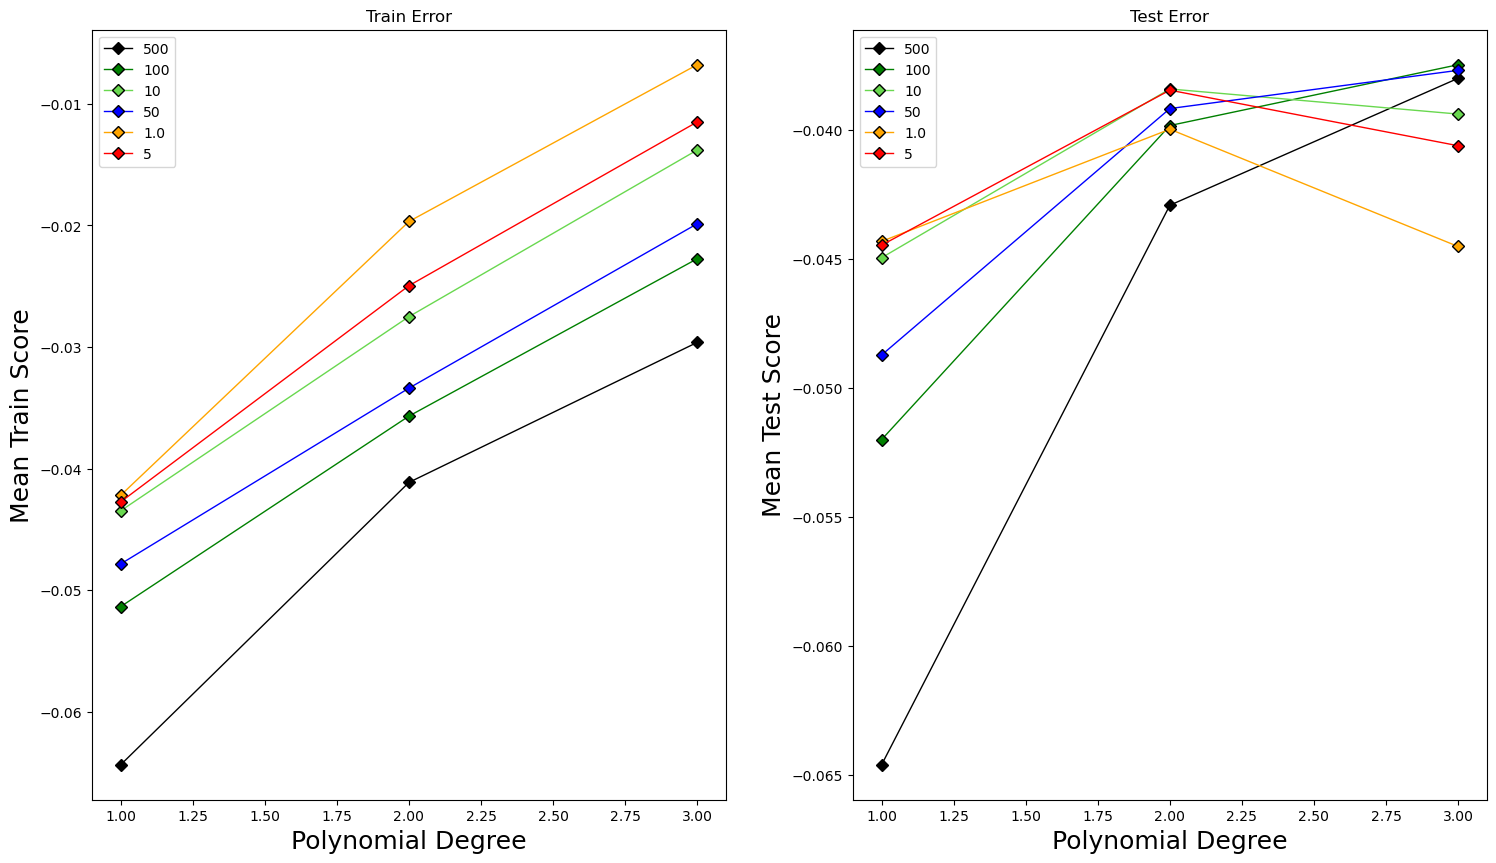

In [39]:
#Plot

#Make Color
lotsa_colors = colors.get_named_colors_mapping()
colors_chosen = ['black' , 'green' , 'xkcd:fresh green' , 'blue' , 'orange' , 'red' , 'brown' , 'purple' , 'xkcd:dark yellow' ,
                'xkcd:dark blue' , 'pink' , 'xkcd:dark red' , 'xkcd:dark orange']
colors_plot = []
for cname in colors_chosen:
    colors_plot.append(lotsa_colors[cname])

#Figure 1
plt.figure(num=1, figsize=(18,10))


#Train Plot 

plt.subplot(1, 2, 1)

j = 0;
for i in alpha_ridge:
    ind = Ridge_Results_RF_rfecv.loc[Ridge_Results_RF_rfecv['param_ridge__alpha'] ==i]
    plt.plot(ind['param_poly__degree'],ind['mean_train_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label=i, linewidth=1)
    j = j + 1
    
 
plt.legend()
plt.xlabel('Polynomial Degree' , fontsize = 18)
plt.ylabel('Mean Train Score' , fontsize = 18)
plt.title('Train Error')


#Test Plot

plt.subplot(1, 2, 2)

j = 0;
for i in alpha_ridge:
    ind = Ridge_Results_RF_rfecv.loc[Ridge_Results_RF_rfecv['param_ridge__alpha'] == i]
    plt.plot(ind['param_poly__degree'],ind['mean_test_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label=i, linewidth=1)
    j = j + 1


plt.legend()
plt.xlabel('Polynomial Degree' ,  fontsize = 18)
plt.ylabel('Mean Test Score' ,  fontsize = 18)
plt.title('Test Error')


#Save And Show
#plt.savefig('Ridge_Regression_Parameters.png')
plt.show()


#### Lasso Coef

In [40]:
Ridge_Optimized_lasso_coef = GridSearchCV(pipe_poly_Lridge , param_grid_linear_reg, cv=kfold, verbose=3, return_train_score=True, scoring='neg_root_mean_squared_error')
Ridge_Optimized_lasso_coef.fit(x_train_lasso,y_train_lasso)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END poly__degree=1, ridge__alpha=500;, score=(train=-0.066, test=-0.066) total time=   0.0s
[CV 2/5] END poly__degree=1, ridge__alpha=500;, score=(train=-0.066, test=-0.067) total time=   0.0s
[CV 3/5] END poly__degree=1, ridge__alpha=500;, score=(train=-0.065, test=-0.071) total time=   0.0s
[CV 4/5] END poly__degree=1, ridge__alpha=500;, score=(train=-0.066, test=-0.068) total time=   0.0s
[CV 5/5] END poly__degree=1, ridge__alpha=500;, score=(train=-0.067, test=-0.060) total time=   0.0s
[CV 1/5] END poly__degree=1, ridge__alpha=100;, score=(train=-0.048, test=-0.047) total time=   0.0s
[CV 2/5] END poly__degree=1, ridge__alpha=100;, score=(train=-0.047, test=-0.050) total time=   0.0s
[CV 3/5] END poly__degree=1, ridge__alpha=100;, score=(train=-0.047, test=-0.054) total time=   0.0s
[CV 4/5] END poly__degree=1, ridge__alpha=100;, score=(train=-0.048, test=-0.049) total time=   0.0s
[CV 5/5] END poly__degree=1, r

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('ridge', Ridge(tol=1e-05))]),
             param_grid={'poly__degree': [1, 2, 3],
                         'ridge__alpha': [500, 100, 10, 50, 1.0, 5]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=3)

In [41]:
Ridge_Results_lasso_coef = pd.DataFrame(Ridge_Optimized_lasso_coef.cv_results_)
Best_Val_Score_Ridge_lasso_coef = Ridge_Optimized_lasso_coef.best_score_
print(Best_Val_Score_Ridge_lasso_coef)
Best_Params_Ridge_lasso_coef  = Ridge_Optimized_lasso_coef.best_params_
print(Best_Params_Ridge_lasso_coef)

-0.03647135661383914
{'poly__degree': 3, 'ridge__alpha': 100}


In [42]:
Best_Estimator_Ridge_lasso_coef = Ridge_Optimized_lasso_coef.best_estimator_
RMSE_Ridge_lasso_coef = root_mean_squared_error(y_test_lasso,Best_Estimator_Ridge_lasso_coef.predict(x_test_lasso))
print('Ridge RMSE for Lasso_Coef Data: ', RMSE_Ridge_lasso_coef)

Ridge RMSE for Lasso_Coef Data:  0.034621914106201475


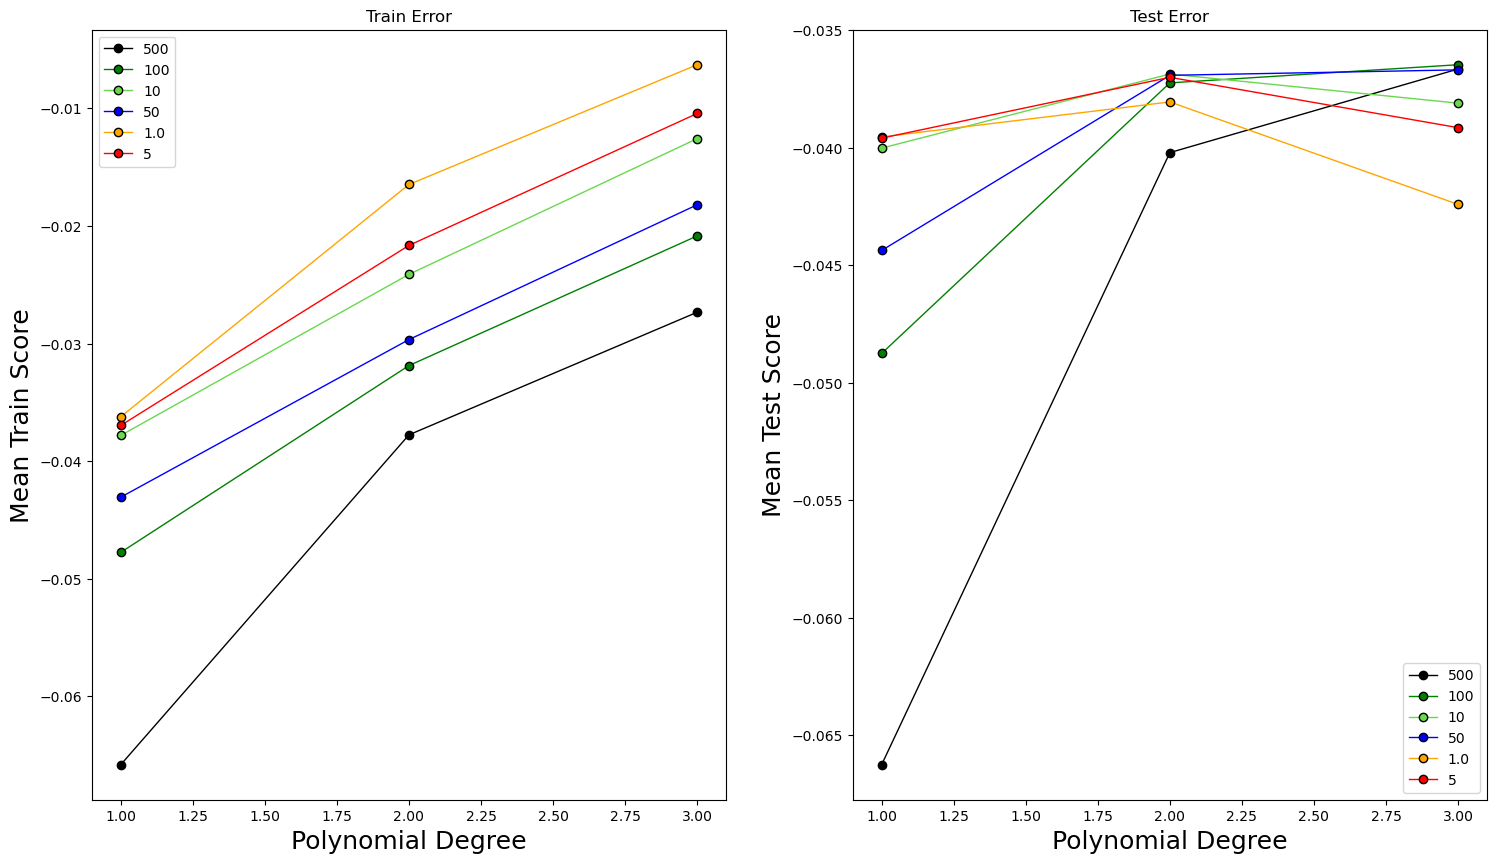

In [43]:
#Plot

#Make Color
lotsa_colors = colors.get_named_colors_mapping()
colors_chosen = ['black' , 'green' , 'xkcd:fresh green' , 'blue' , 'orange' , 'red' , 'brown' , 'purple' , 'xkcd:dark yellow' ,
                'xkcd:dark blue' , 'pink' , 'xkcd:dark red' , 'xkcd:dark orange']
colors_plot = []
for cname in colors_chosen:
    colors_plot.append(lotsa_colors[cname])

#Figure 1
plt.figure(num=1, figsize=(18,10))


#Train Plot 

plt.subplot(1, 2, 1)

j = 0;
for i in alpha_ridge:
    ind = Ridge_Results_lasso_coef.loc[Ridge_Results_lasso_coef['param_ridge__alpha'] ==i]
    plt.plot(ind['param_poly__degree'],ind['mean_train_score'], color = colors_plot[j] , marker = 'o', mec = 'k', 
         label=i, linewidth=1)
    j = j + 1
    
 
plt.legend()
plt.xlabel('Polynomial Degree' , fontsize = 18)
plt.ylabel('Mean Train Score' , fontsize = 18)
plt.title('Train Error')


#Test Plot

plt.subplot(1, 2, 2)

j = 0;
for i in alpha_ridge:
    ind = Ridge_Results_lasso_coef.loc[Ridge_Results_lasso_coef['param_ridge__alpha'] == i]
    plt.plot(ind['param_poly__degree'],ind['mean_test_score'], color = colors_plot[j] , marker = 'o', mec = 'k', 
         label=i, linewidth=1)
    j = j + 1


plt.legend()
plt.xlabel('Polynomial Degree' ,  fontsize = 18)
plt.ylabel('Mean Test Score' ,  fontsize = 18)
plt.title('Test Error')


#Save And Show
#plt.savefig('Ridge_Regression_Parameters.png')
plt.show()


#### sfs svr

In [44]:
Ridge_Optimized_sfs_svr = GridSearchCV(pipe_poly_Lridge , param_grid_linear_reg, cv=kfold, verbose=3, return_train_score=True, scoring='neg_root_mean_squared_error')
Ridge_Optimized_sfs_svr.fit(x_train_sfs_svr,y_train_sfs_svr)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END poly__degree=1, ridge__alpha=500;, score=(train=-0.079, test=-0.082) total time=   0.0s
[CV 2/5] END poly__degree=1, ridge__alpha=500;, score=(train=-0.079, test=-0.079) total time=   0.0s
[CV 3/5] END poly__degree=1, ridge__alpha=500;, score=(train=-0.078, test=-0.082) total time=   0.0s
[CV 4/5] END poly__degree=1, ridge__alpha=500;, score=(train=-0.079, test=-0.080) total time=   0.0s
[CV 5/5] END poly__degree=1, ridge__alpha=500;, score=(train=-0.080, test=-0.072) total time=   0.0s
[CV 1/5] END poly__degree=1, ridge__alpha=100;, score=(train=-0.059, test=-0.060) total time=   0.0s
[CV 2/5] END poly__degree=1, ridge__alpha=100;, score=(train=-0.059, test=-0.060) total time=   0.0s
[CV 3/5] END poly__degree=1, ridge__alpha=100;, score=(train=-0.058, test=-0.063) total time=   0.0s
[CV 4/5] END poly__degree=1, ridge__alpha=100;, score=(train=-0.059, test=-0.060) total time=   0.0s
[CV 5/5] END poly__degree=1, r

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('ridge', Ridge(tol=1e-05))]),
             param_grid={'poly__degree': [1, 2, 3],
                         'ridge__alpha': [500, 100, 10, 50, 1.0, 5]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=3)

In [45]:
Ridge_Results_sfs_svr = pd.DataFrame(Ridge_Optimized_sfs_svr.cv_results_)
Best_Val_Score_Ridge_sfs_svr = Ridge_Optimized_sfs_svr.best_score_
print(Best_Val_Score_Ridge_sfs_svr)
Best_Params_Ridge_sfs_svr  = Ridge_Optimized_sfs_svr.best_params_
print(Best_Params_Ridge_sfs_svr)

-0.033071630434623536
{'poly__degree': 3, 'ridge__alpha': 1.0}


In [46]:
Best_Estimator_Ridge_sfs_svr = Ridge_Optimized_sfs_svr.best_estimator_
RMSE_Ridge_sfs_svr = root_mean_squared_error(y_test_sfs_svr,Best_Estimator_Ridge_sfs_svr.predict(x_test_sfs_svr))
print('Ridge RMSE for SFS SVR Data: ', RMSE_Ridge_sfs_svr)

Ridge RMSE for SFS SVR Data:  0.03134654079772349


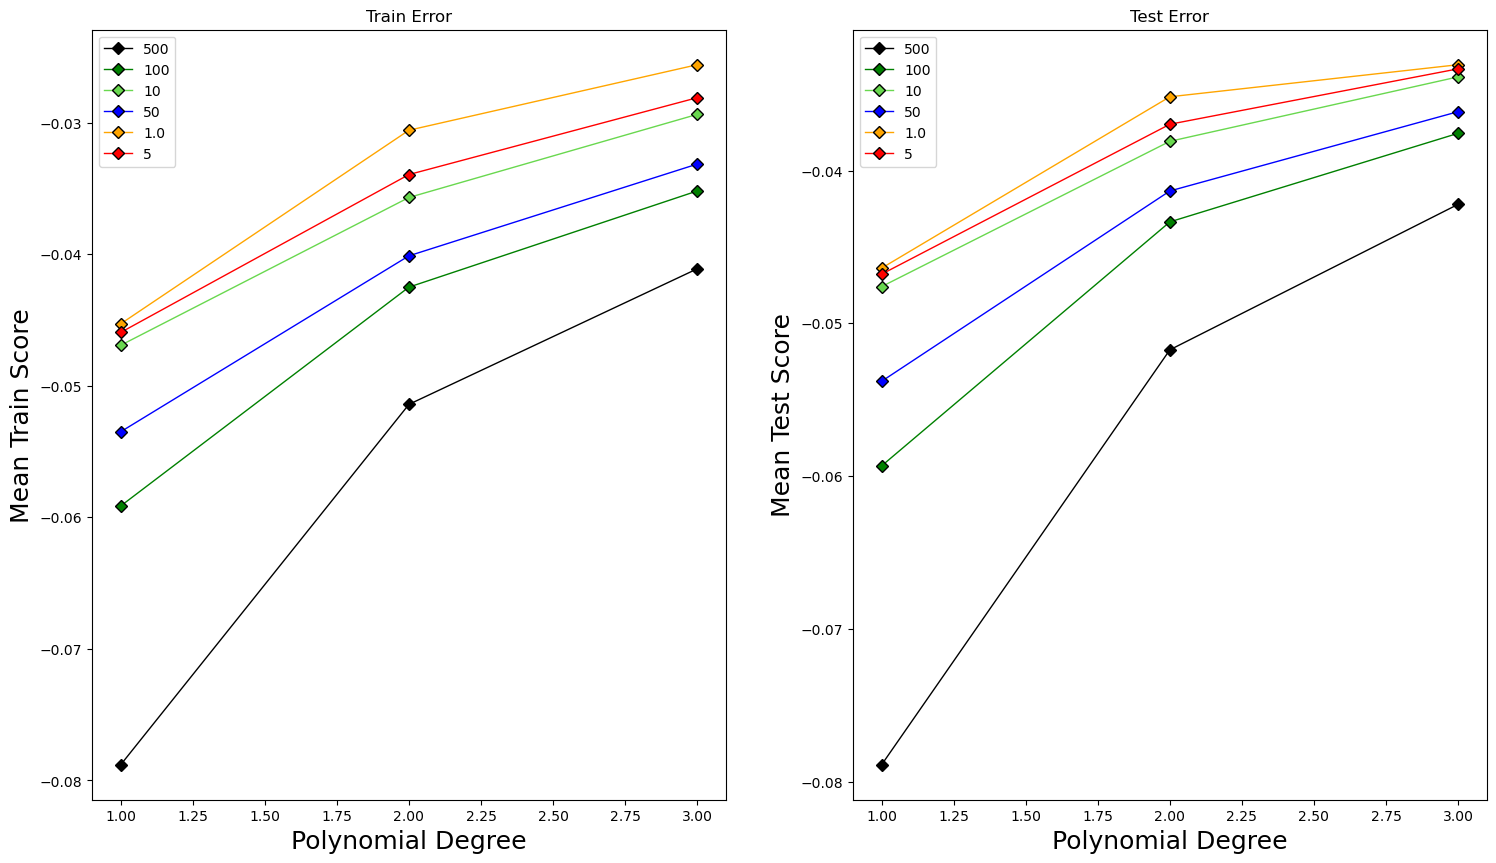

In [47]:
#Plot

#Make Color
lotsa_colors = colors.get_named_colors_mapping()
colors_chosen = ['black' , 'green' , 'xkcd:fresh green' , 'blue' , 'orange' , 'red' , 'brown' , 'purple' , 'xkcd:dark yellow' ,
                'xkcd:dark blue' , 'pink' , 'xkcd:dark red' , 'xkcd:dark orange']
colors_plot = []
for cname in colors_chosen:
    colors_plot.append(lotsa_colors[cname])

#Figure 1
plt.figure(num=1, figsize=(18,10))


#Train Plot 

plt.subplot(1, 2, 1)

j = 0;
for i in alpha_ridge:
    ind = Ridge_Results_sfs_svr.loc[Ridge_Results_sfs_svr['param_ridge__alpha'] ==i]
    plt.plot(ind['param_poly__degree'],ind['mean_train_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label=i, linewidth=1)
    j = j + 1
    
 
plt.legend()
plt.xlabel('Polynomial Degree' , fontsize = 18)
plt.ylabel('Mean Train Score' , fontsize = 18)
plt.title('Train Error')


#Test Plot

plt.subplot(1, 2, 2)

j = 0;
for i in alpha_ridge:
    ind = Ridge_Results_sfs_svr.loc[Ridge_Results_sfs_svr['param_ridge__alpha'] == i]
    plt.plot(ind['param_poly__degree'],ind['mean_test_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label=i, linewidth=1)
    j = j + 1


plt.legend()
plt.xlabel('Polynomial Degree' ,  fontsize = 18)
plt.ylabel('Mean Test Score' ,  fontsize = 18)
plt.title('Test Error')


#Save And Show
#plt.savefig('Ridge_Regression_Parameters.png')
plt.show()


#### rf feature impor

In [48]:
Ridge_Optimized_RF_FI = GridSearchCV(pipe_poly_Lridge , param_grid_linear_reg, cv=kfold, verbose=3, return_train_score=True, scoring='neg_root_mean_squared_error')
Ridge_Optimized_RF_FI.fit(x_train_rf_feature_impor,y_train_rf_feature_impor)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END poly__degree=1, ridge__alpha=500;, score=(train=-0.082, test=-0.085) total time=   0.0s
[CV 2/5] END poly__degree=1, ridge__alpha=500;, score=(train=-0.082, test=-0.083) total time=   0.0s
[CV 3/5] END poly__degree=1, ridge__alpha=500;, score=(train=-0.082, test=-0.085) total time=   0.0s
[CV 4/5] END poly__degree=1, ridge__alpha=500;, score=(train=-0.082, test=-0.084) total time=   0.0s
[CV 5/5] END poly__degree=1, ridge__alpha=500;, score=(train=-0.084, test=-0.076) total time=   0.0s
[CV 1/5] END poly__degree=1, ridge__alpha=100;, score=(train=-0.060, test=-0.060) total time=   0.0s
[CV 2/5] END poly__degree=1, ridge__alpha=100;, score=(train=-0.060, test=-0.060) total time=   0.0s
[CV 3/5] END poly__degree=1, ridge__alpha=100;, score=(train=-0.059, test=-0.064) total time=   0.0s
[CV 4/5] END poly__degree=1, ridge__alpha=100;, score=(train=-0.059, test=-0.062) total time=   0.0s
[CV 5/5] END poly__degree=1, r

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('ridge', Ridge(tol=1e-05))]),
             param_grid={'poly__degree': [1, 2, 3],
                         'ridge__alpha': [500, 100, 10, 50, 1.0, 5]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=3)

In [49]:
Ridge_Results_RF_FI = pd.DataFrame(Ridge_Optimized_RF_FI.cv_results_)
Best_Val_Score_Ridge_RF_FI = Ridge_Optimized_RF_FI.best_score_
print(Best_Val_Score_Ridge_RF_FI)
Best_Params_Ridge_RF_FI  = Ridge_Optimized_RF_FI.best_params_
print(Best_Params_Ridge_RF_FI)

-0.03852638914968789
{'poly__degree': 3, 'ridge__alpha': 1.0}


In [50]:
Best_Estimator_Ridge_RF_FI = Ridge_Optimized_RF_FI.best_estimator_
RMSE_Ridge_RF_FI = root_mean_squared_error(y_test_rf_feature_impor,Best_Estimator_Ridge_RF_FI.predict(x_test_rf_feature_impor))
print('Ridge RMSE for RF_FI Data: ', RMSE_Ridge_RF_FI)

Ridge RMSE for RF_FI Data:  0.03998886098567836


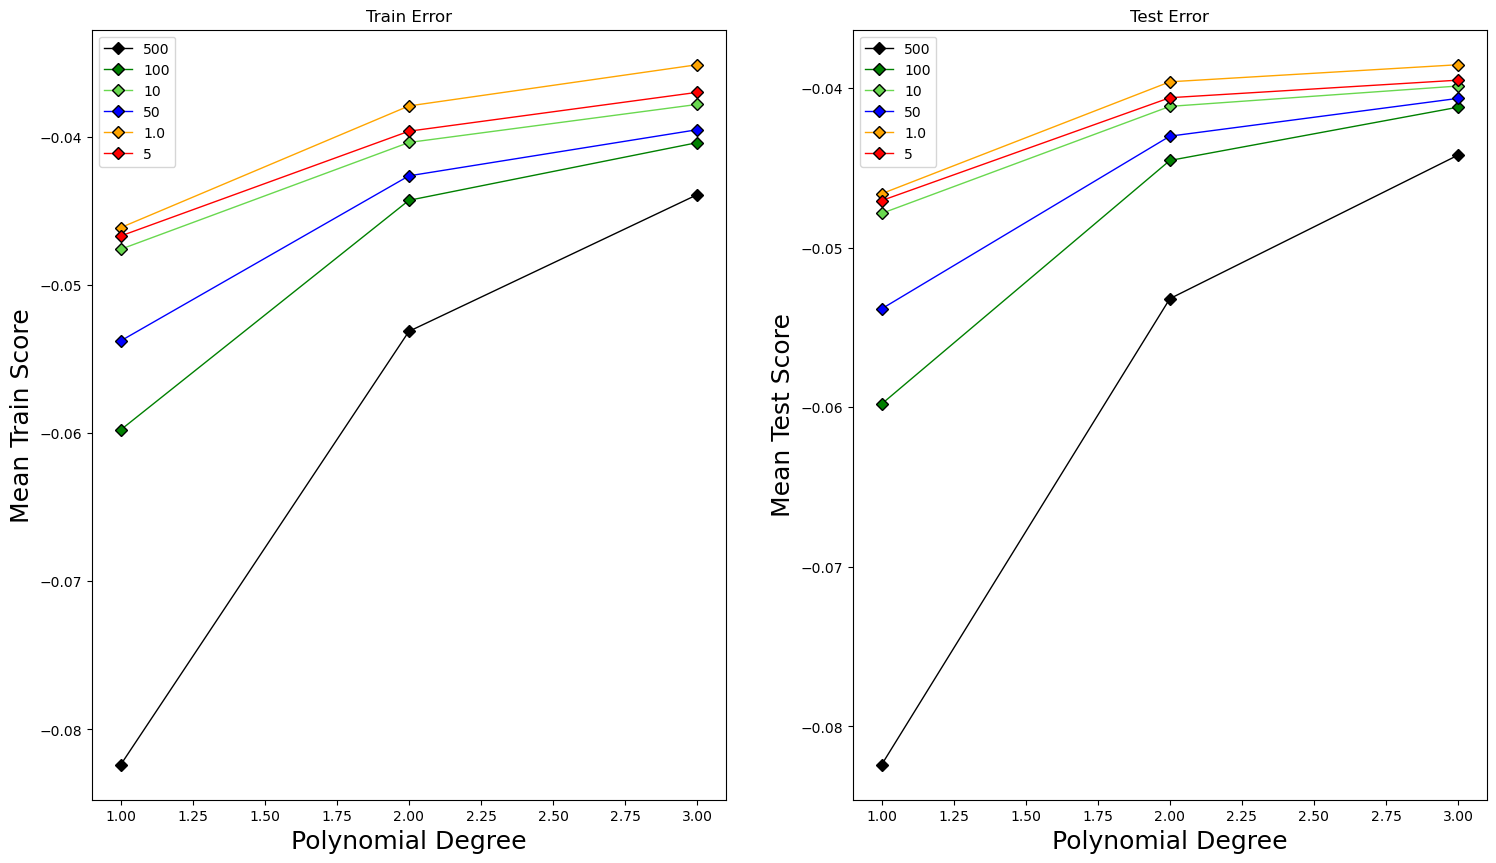

In [51]:
#Plot

#Make Color
lotsa_colors = colors.get_named_colors_mapping()
colors_chosen = ['black' , 'green' , 'xkcd:fresh green' , 'blue' , 'orange' , 'red' , 'brown' , 'purple' , 'xkcd:dark yellow' ,
                'xkcd:dark blue' , 'pink' , 'xkcd:dark red' , 'xkcd:dark orange']
colors_plot = []
for cname in colors_chosen:
    colors_plot.append(lotsa_colors[cname])

#Figure 1
plt.figure(num=1, figsize=(18,10))


#Train Plot 

plt.subplot(1, 2, 1)

j = 0;
for i in alpha_ridge:
    ind = Ridge_Results_RF_FI.loc[Ridge_Results_RF_FI['param_ridge__alpha'] ==i]
    plt.plot(ind['param_poly__degree'],ind['mean_train_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label=i, linewidth=1)
    j = j + 1
    
 
plt.legend()
plt.xlabel('Polynomial Degree' , fontsize = 18)
plt.ylabel('Mean Train Score' , fontsize = 18)
plt.title('Train Error')


#Test Plot

plt.subplot(1, 2, 2)

j = 0;
for i in alpha_ridge:
    ind = Ridge_Results_RF_FI.loc[Ridge_Results_RF_FI['param_ridge__alpha'] == i]
    plt.plot(ind['param_poly__degree'],ind['mean_test_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label=i, linewidth=1)
    j = j + 1


plt.legend()
plt.xlabel('Polynomial Degree' ,  fontsize = 18)
plt.ylabel('Mean Test Score' ,  fontsize = 18)
plt.title('Test Error')


#Save And Show
#plt.savefig('Ridge_Regression_Parameters.png')
plt.show()


#### Original_Data

In [52]:
Ridge_Optimized_Original_Data = GridSearchCV(pipe_poly_Lridge , param_grid_linear_reg, cv=kfold, verbose=3, return_train_score=True, scoring='neg_root_mean_squared_error')
Ridge_Optimized_Original_Data.fit(x_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END poly__degree=1, ridge__alpha=500;, score=(train=-0.059, test=-0.059) total time=   0.0s
[CV 2/5] END poly__degree=1, ridge__alpha=500;, score=(train=-0.059, test=-0.061) total time=   0.0s
[CV 3/5] END poly__degree=1, ridge__alpha=500;, score=(train=-0.058, test=-0.065) total time=   0.0s
[CV 4/5] END poly__degree=1, ridge__alpha=500;, score=(train=-0.059, test=-0.060) total time=   0.0s
[CV 5/5] END poly__degree=1, ridge__alpha=500;, score=(train=-0.060, test=-0.055) total time=   0.0s
[CV 1/5] END poly__degree=1, ridge__alpha=100;, score=(train=-0.047, test=-0.045) total time=   0.0s
[CV 2/5] END poly__degree=1, ridge__alpha=100;, score=(train=-0.045, test=-0.050) total time=   0.0s
[CV 3/5] END poly__degree=1, ridge__alpha=100;, score=(train=-0.045, test=-0.053) total time=   0.0s
[CV 4/5] END poly__degree=1, ridge__alpha=100;, score=(train=-0.046, test=-0.047) total time=   0.0s
[CV 5/5] END poly__degree=1, r

c:\Users\sinas\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\sinas\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\sinas\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sinas\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 469, in fit
    Xt = self._fit(X, y, route

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('ridge', Ridge(tol=1e-05))]),
             param_grid={'poly__degree': [1, 2, 3],
                         'ridge__alpha': [500, 100, 10, 50, 1.0, 5]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=3)

In [53]:
Ridge_Results_Original_Data = pd.DataFrame(Ridge_Optimized_Original_Data.cv_results_)
Best_Val_Score_Ridge_Original_Data = Ridge_Optimized_Original_Data.best_score_
print(Best_Val_Score_Ridge_Original_Data)
Best_Params_Ridge_Original_Data  = Ridge_Optimized_Original_Data.best_params_
print(Best_Params_Ridge_Original_Data)

-0.03732911160842621
{'poly__degree': 2, 'ridge__alpha': 50}


In [54]:
Best_Estimator_Ridge_Original_Data = Ridge_Optimized_Original_Data.best_estimator_
RMSE_Ridge_Original_Data = root_mean_squared_error(y_test,Best_Estimator_Ridge_Original_Data.predict(x_test))
print('Ridge RMSE for Original Data: ', RMSE_Ridge_Original_Data)

Ridge RMSE for Original Data:  0.0338779062425238


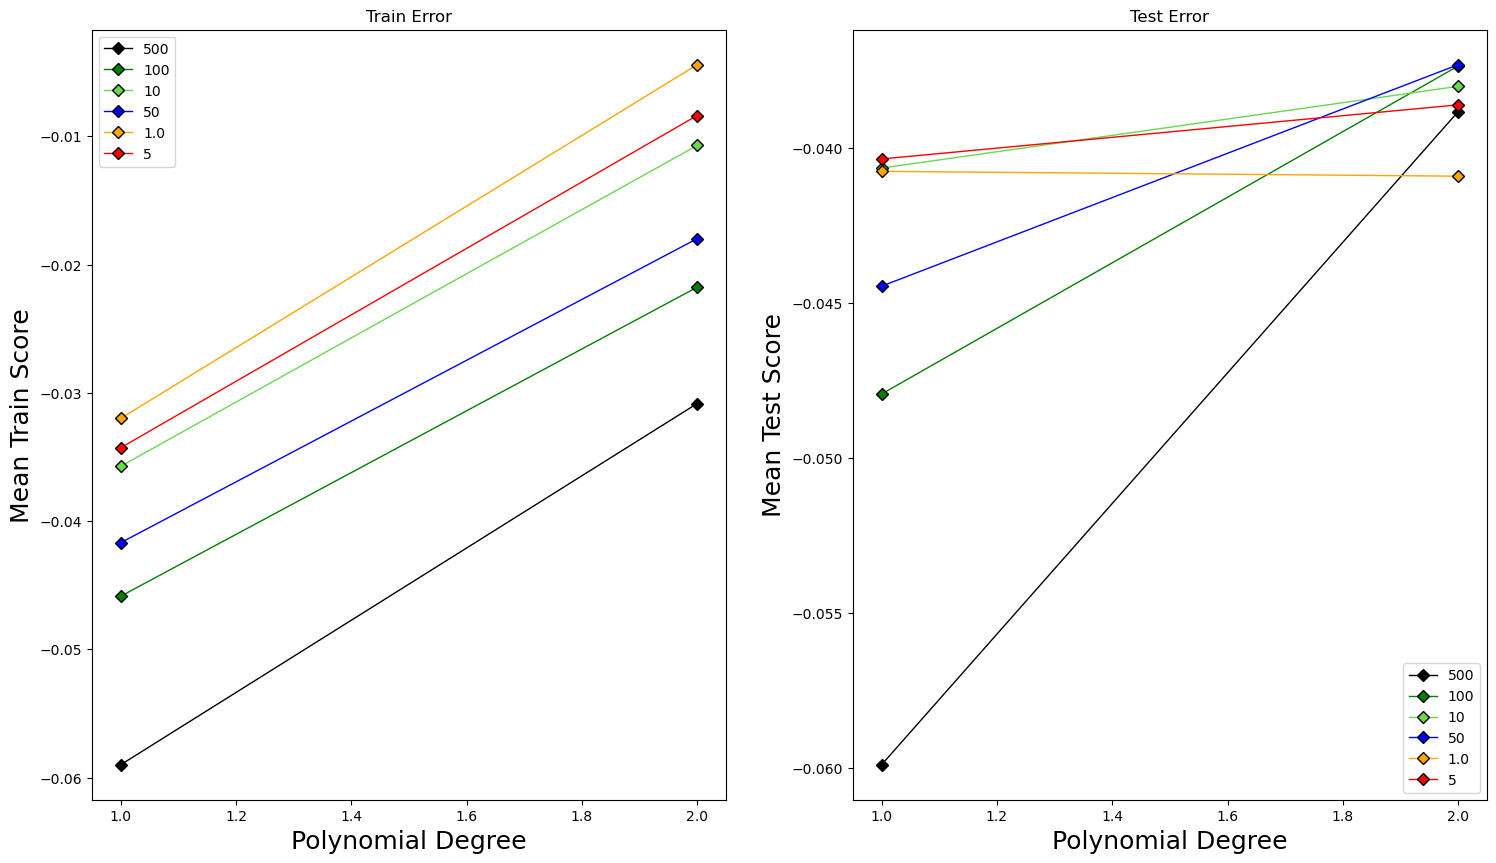

In [55]:
#Plot

#Make Color
lotsa_colors = colors.get_named_colors_mapping()
colors_chosen = ['black' , 'green' , 'xkcd:fresh green' , 'blue' , 'orange' , 'red' , 'brown' , 'purple' , 'xkcd:dark yellow' ,
                'xkcd:dark blue' , 'pink' , 'xkcd:dark red' , 'xkcd:dark orange']
colors_plot = []
for cname in colors_chosen:
    colors_plot.append(lotsa_colors[cname])

#Figure 1
plt.figure(num=1, figsize=(18,10))


#Train Plot 

plt.subplot(1, 2, 1)

j = 0;
for i in alpha_ridge:
    ind = Ridge_Results_Original_Data.loc[Ridge_Results_Original_Data['param_ridge__alpha'] ==i]
    plt.plot(ind['param_poly__degree'],ind['mean_train_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label=i, linewidth=1)
    j = j + 1
    
 
plt.legend()
plt.xlabel('Polynomial Degree' , fontsize = 18)
plt.ylabel('Mean Train Score' , fontsize = 18)
plt.title('Train Error')


#Test Plot

plt.subplot(1, 2, 2)

j = 0;
for i in alpha_ridge:
    ind = Ridge_Results_Original_Data.loc[Ridge_Results_Original_Data['param_ridge__alpha'] == i]
    plt.plot(ind['param_poly__degree'],ind['mean_test_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label=i, linewidth=1)
    j = j + 1


plt.legend()
plt.xlabel('Polynomial Degree' ,  fontsize = 18)
plt.ylabel('Mean Test Score' ,  fontsize = 18)
plt.title('Test Error')


#Save And Show
#plt.savefig('Ridge_Regression_Parameters.png')
plt.show()


In [56]:
Information_df = pd.DataFrame({'Name':['RF RFECV', 'Lasso Coef', 'SFS SVR', 'RF Feature Importance', 'Original Data'],   
                         'Features':[[x_RF_rfecv.columns],[x_lasso.columns],[x_sfs_svr.columns],[x_rf_feature_impor.columns],[x.columns]],   
                         'Num Of Features':[len(x_RF_rfecv.columns),len(x_lasso.columns),len(x_sfs_svr.columns),len(x_rf_feature_impor.columns),len(x.columns)],    
                         'Alpha_Ridge':[Best_Params_Ridge_RF_rfecv['ridge__alpha'],Best_Params_Ridge_lasso_coef['ridge__alpha'],Best_Params_Ridge_sfs_svr['ridge__alpha'],Best_Params_Ridge_RF_FI['ridge__alpha'],Best_Params_Ridge_Original_Data['ridge__alpha']],
                         'Degree_Ridge':[Best_Params_Ridge_RF_rfecv['poly__degree'], Best_Params_Ridge_lasso_coef['poly__degree'], Best_Params_Ridge_sfs_svr['poly__degree'],Best_Params_Ridge_RF_FI['poly__degree'],Best_Params_Ridge_Original_Data['poly__degree']],
                         'Best Val Score Ridge': [Best_Val_Score_Ridge_RF_rfecv,Best_Val_Score_Ridge_lasso_coef,Best_Val_Score_Ridge_sfs_svr,Best_Val_Score_Ridge_RF_FI,Best_Val_Score_Ridge_Original_Data],    
                         'Test RMSE Ridge': [RMSE_Ridge_RF_rfecv,RMSE_Ridge_lasso_coef,RMSE_Ridge_sfs_svr,RMSE_Ridge_RF_FI,RMSE_Ridge_Original_Data] 
                        })
Information_df

Name                                           Features  \
0               RF RFECV  [[Overall Qual, Overall Cond, House Age, Resto...   
1             Lasso Coef  [[Overall Qual, Overall Cond, Bsmt Full Bath, ...   
2                SFS SVR  [[Overall Qual, Overall Cond, Bsmt Full Bath, ...   
3  RF Feature Importance  [[Overall Qual, House Age, Full Bath, Garage C...   
4          Original Data  [[Overall Qual, Overall Cond, House Age, Resto...   

   Num Of Features  Alpha_Ridge  Degree_Ridge  Best Val Score Ridge  \
0               55        100.0             3             -0.037490   
1               62        100.0             3             -0.036471   
2               31          1.0             3             -0.033072   
3               11          1.0             3             -0.038526   
4              258         50.0             2             -0.037329   

   Test RMSE Ridge  
0         0.032138  
1         0.034622  
2         0.031347  
3         0.039989  
4         0.033878

In [57]:
Model_Final_Results = pd.DataFrame({'Name':['RF RFECV', 'Lasso Coef', 'SFS SVR', 'RF Feature Importance', 'Original Data'],      
                         'Num Of Features':[len(x_RF_rfecv.columns),len(x_lasso.columns),len(x_sfs_svr.columns),len(x_rf_feature_impor.columns),len(x.columns)],    
                         'Best Val Score Ridge': [Best_Val_Score_Ridge_RF_rfecv,Best_Val_Score_Ridge_lasso_coef,Best_Val_Score_Ridge_sfs_svr,Best_Val_Score_Ridge_RF_FI,Best_Val_Score_Ridge_Original_Data],    
                         'Test RMSE Ridge': [RMSE_Ridge_RF_rfecv,RMSE_Ridge_lasso_coef,RMSE_Ridge_sfs_svr,RMSE_Ridge_RF_FI,RMSE_Ridge_Original_Data] 
                        })
Model_Final_Results

Name  Num Of Features  Best Val Score Ridge  \
0               RF RFECV               55             -0.037490   
1             Lasso Coef               62             -0.036471   
2                SFS SVR               31             -0.033072   
3  RF Feature Importance               11             -0.038526   
4          Original Data              258             -0.037329   

   Test RMSE Ridge  
0         0.032138  
1         0.034622  
2         0.031347  
3         0.039989  
4         0.033878

# Support Vector Regression

## SVR Poly

In [58]:
svr_poly = SVR(kernel='poly',max_iter=-1)

poly_degree = [1,2,3,4,5]
C_svr_rbf = [5*10**-3, 10**-2, 5*10**-2, 10**-1, 5*10**-1, 1.0]

param_grid_svr_poly ={
        'degree' : poly_degree,
        'C':  C_svr_rbf,
}

#### RF rfecv

In [59]:
svr_poly_Optimized_RF_rfecv = GridSearchCV(svr_poly , param_grid_svr_poly, cv=kfold, verbose=3, return_train_score=True, scoring='neg_root_mean_squared_error')
svr_poly_Optimized_RF_rfecv.fit(x_train_RF_rfecv,column_or_1d(y_train_RF_rfecv))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END C=0.005, degree=1;, score=(train=-0.076, test=-0.074) total time=   0.0s
[CV 2/5] END C=0.005, degree=1;, score=(train=-0.075, test=-0.077) total time=   0.0s
[CV 3/5] END C=0.005, degree=1;, score=(train=-0.074, test=-0.080) total time=   0.0s
[CV 4/5] END C=0.005, degree=1;, score=(train=-0.075, test=-0.075) total time=   0.0s
[CV 5/5] END C=0.005, degree=1;, score=(train=-0.076, test=-0.070) total time=   0.0s
[CV 1/5] END C=0.005, degree=2;, score=(train=-0.064, test=-0.060) total time=   0.0s
[CV 2/5] END C=0.005, degree=2;, score=(train=-0.064, test=-0.068) total time=   0.0s
[CV 3/5] END C=0.005, degree=2;, score=(train=-0.062, test=-0.068) total time=   0.0s
[CV 4/5] END C=0.005, degree=2;, score=(train=-0.063, test=-0.064) total time=   0.0s
[CV 5/5] END C=0.005, degree=2;, score=(train=-0.065, test=-0.062) total time=   0.0s
[CV 1/5] END C=0.005, degree=3;, score=(train=-0.057, test=-0.053) total time=

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVR(kernel='poly'),
             param_grid={'C': [0.005, 0.01, 0.05, 0.1, 0.5, 1.0],
                         'degree': [1, 2, 3, 4, 5]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=3)

In [60]:
svr_poly_Results_RF_rfecv = pd.DataFrame(svr_poly_Optimized_RF_rfecv.cv_results_)
Best_Val_Score_svr_poly_RF_rfecv = svr_poly_Optimized_RF_rfecv.best_score_
print(Best_Val_Score_svr_poly_RF_rfecv)
Best_Params_svr_poly_RF_rfecv  = svr_poly_Optimized_RF_rfecv.best_params_
print(Best_Params_svr_poly_RF_rfecv)

-0.049421385197682355
{'C': 0.05, 'degree': 4}


In [61]:
Best_Estimator_svr_poly_RF_rfecv = svr_poly_Optimized_RF_rfecv.best_estimator_
RMSE_svr_poly_RF_rfecv = root_mean_squared_error(column_or_1d(y_test_RF_rfecv),Best_Estimator_svr_poly_RF_rfecv.predict(x_test_RF_rfecv))
print('SVR Poly RMSE for RF_rfecv: ', RMSE_svr_poly_RF_rfecv)

SVR Poly RMSE for RF_rfecv:  0.04445661056569454


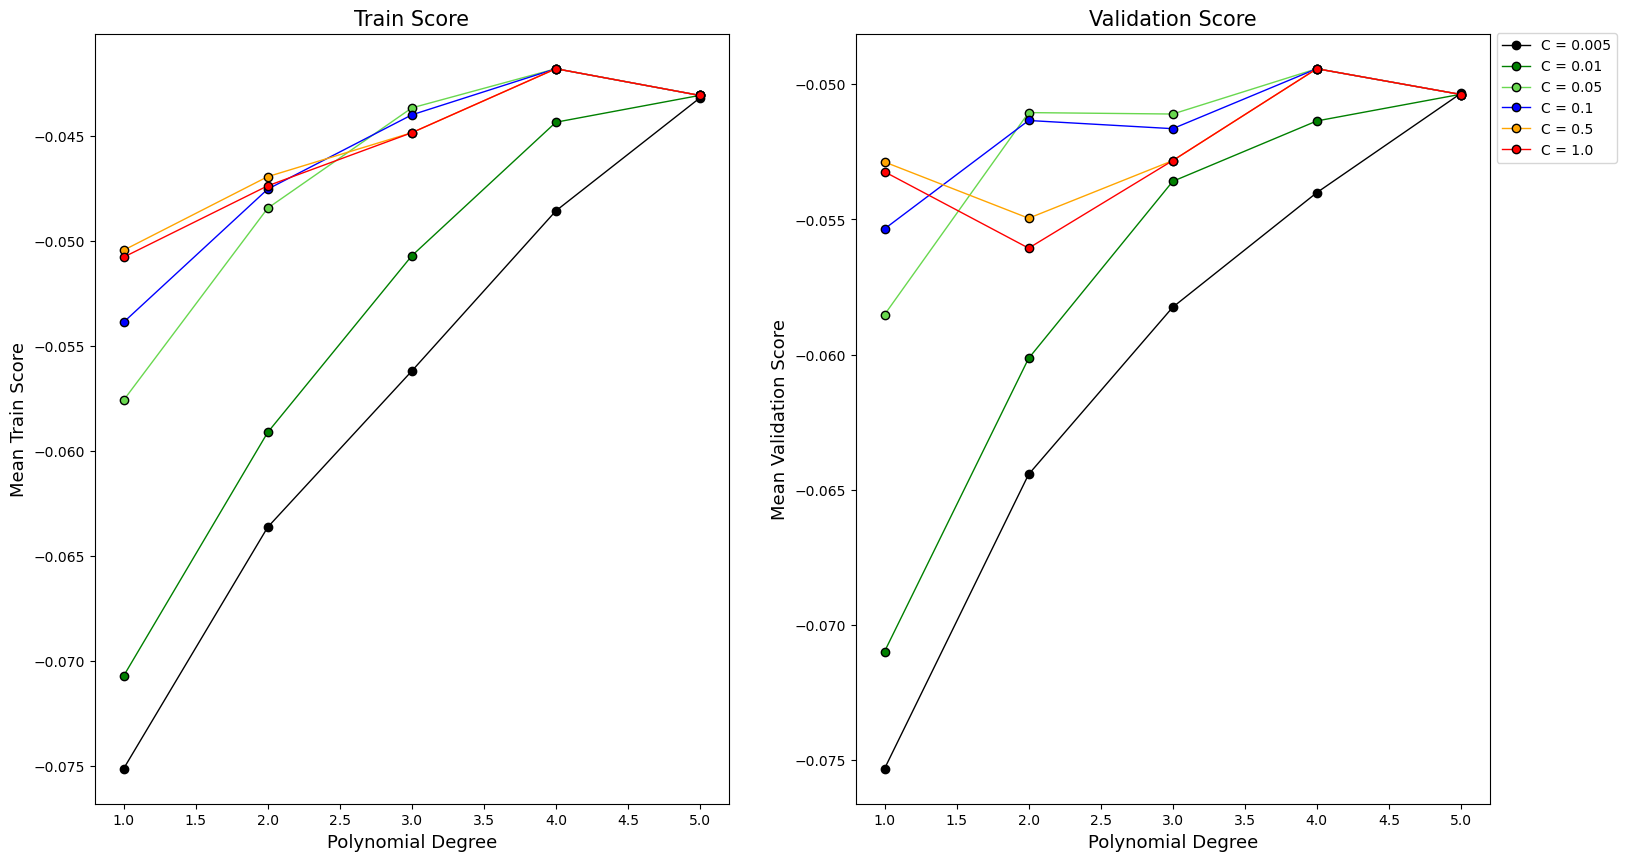

In [62]:
##Plot

C = C_svr_rbf
polynomial_degree = poly_degree

#Make Color
lotsa_colors = colors.get_named_colors_mapping()
colors_chosen = ['black' , 'green' , 'xkcd:fresh green' , 'blue' , 'orange' , 'red' , 'brown' , 'purple' , 'xkcd:dark yellow' ,
                'xkcd:dark blue' , 'pink' , 'xkcd:dark red']
colors_plot = []
for cname in colors_chosen:
    colors_plot.append(lotsa_colors[cname])
    
#Figure 4
fig4 , axs = plt.subplots(1, 2, figsize=(18,10) , dpi=100)

axs[0].set_title('Train Score' ,  fontsize = 15)
axs[1].set_title('Validation Score' ,  fontsize = 15)

axs[0].set_xlabel('Polynomial Degree' ,  fontsize = 13)
axs[0].set_ylabel('Mean Train Score' ,  fontsize = 13)


axs[1].set_xlabel('Polynomial Degree' ,  fontsize = 13)
axs[1].set_ylabel('Mean Validation Score' ,  fontsize = 13)

#Train Plot 

j = 0;
for i in C:
    ind = svr_poly_Results_RF_rfecv.loc[svr_poly_Results_RF_rfecv['param_C'] == i]
    axs[0].plot(ind['param_degree'],ind['mean_train_score'], color = colors_plot[j] , marker = 'o', mec = 'k', 
         label='C = '+str(i), linewidth= 1)
    j = j + 1
    
 
#Test Plot

j = 0;
for i in C:
    ind = svr_poly_Results_RF_rfecv.loc[svr_poly_Results_RF_rfecv['param_C'] == i]
    axs[1].plot(ind['param_degree'],ind['mean_test_score'], color = colors_plot[j] , marker = 'o', mec = 'k', 
         label='C = '+str(i), linewidth= 1)
    j = j + 1


   
axs[1].legend(bbox_to_anchor = (1, 1.01))
plt.rcParams.update({'font.size': 13})
#Save And Show
#plt.savefig('E:\\Machine_Learning_Paper\\SVM_P_Parameters_F1_Score_5Kfold.png')
plt.show()

#### Lasso Coef

In [63]:
svr_poly_Optimized_lasso_coef = GridSearchCV(svr_poly , param_grid_svr_poly, cv=kfold, verbose=3, return_train_score=True, scoring='neg_root_mean_squared_error')
svr_poly_Optimized_lasso_coef.fit(x_train_lasso,column_or_1d(y_train_lasso))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END C=0.005, degree=1;, score=(train=-0.077, test=-0.074) total time=   0.0s
[CV 2/5] END C=0.005, degree=1;, score=(train=-0.075, test=-0.078) total time=   0.0s
[CV 3/5] END C=0.005, degree=1;, score=(train=-0.074, test=-0.079) total time=   0.0s
[CV 4/5] END C=0.005, degree=1;, score=(train=-0.075, test=-0.075) total time=   0.0s
[CV 5/5] END C=0.005, degree=1;, score=(train=-0.076, test=-0.071) total time=   0.0s
[CV 1/5] END C=0.005, degree=2;, score=(train=-0.065, test=-0.061) total time=   0.0s
[CV 2/5] END C=0.005, degree=2;, score=(train=-0.063, test=-0.068) total time=   0.0s
[CV 3/5] END C=0.005, degree=2;, score=(train=-0.062, test=-0.069) total time=   0.0s
[CV 4/5] END C=0.005, degree=2;, score=(train=-0.063, test=-0.062) total time=   0.0s
[CV 5/5] END C=0.005, degree=2;, score=(train=-0.064, test=-0.062) total time=   0.0s
[CV 1/5] END C=0.005, degree=3;, score=(train=-0.059, test=-0.056) total time=

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVR(kernel='poly'),
             param_grid={'C': [0.005, 0.01, 0.05, 0.1, 0.5, 1.0],
                         'degree': [1, 2, 3, 4, 5]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=3)

In [64]:
svr_poly_Results_lasso_coef = pd.DataFrame(svr_poly_Optimized_lasso_coef.cv_results_)
Best_Val_Score_svr_poly_lasso_coef = svr_poly_Optimized_lasso_coef.best_score_
print(Best_Val_Score_svr_poly_lasso_coef)
Best_Params_svr_poly_lasso_coef = svr_poly_Optimized_lasso_coef.best_params_
print(Best_Params_svr_poly_lasso_coef)

-0.04831866192810934
{'C': 0.5, 'degree': 1}


In [65]:
Best_Estimator_svr_poly_lasso_coef = svr_poly_Optimized_lasso_coef.best_estimator_
RMSE_svr_poly_lasso_coef = root_mean_squared_error(column_or_1d(y_test_lasso),Best_Estimator_svr_poly_lasso_coef.predict(x_test_lasso))
print('SVR Poly RMSE for lasso_coef: ', RMSE_svr_poly_lasso_coef)

SVR Poly RMSE for lasso_coef:  0.04835829922451541


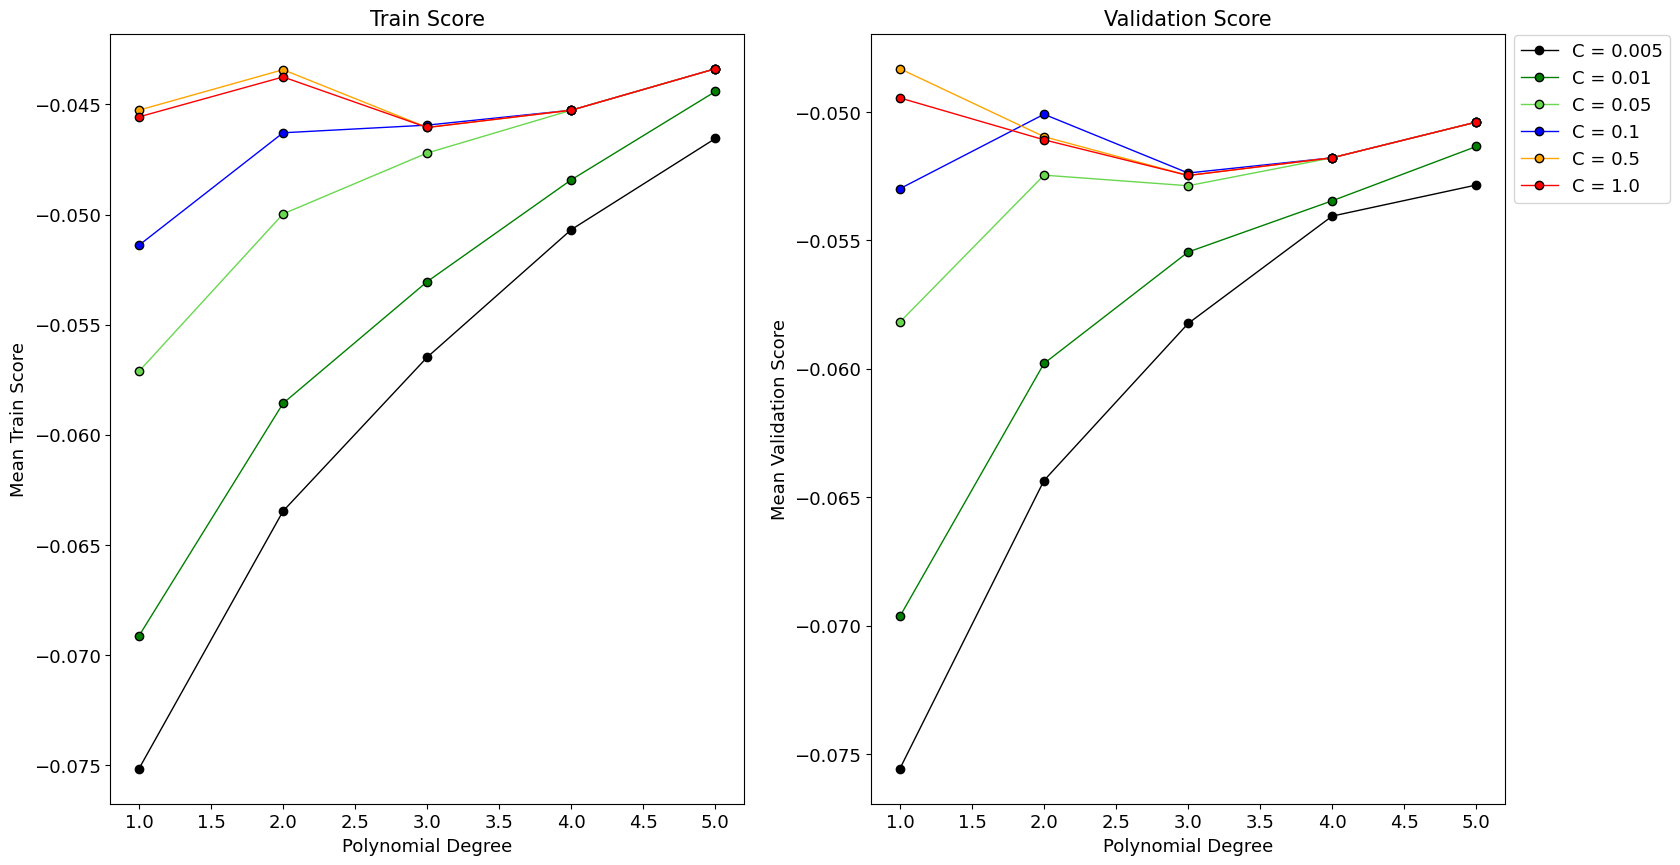

In [66]:
##Plot

C = C_svr_rbf
polynomial_degree = poly_degree

#Make Color
lotsa_colors = colors.get_named_colors_mapping()
colors_chosen = ['black' , 'green' , 'xkcd:fresh green' , 'blue' , 'orange' , 'red' , 'brown' , 'purple' , 'xkcd:dark yellow' ,
                'xkcd:dark blue' , 'pink' , 'xkcd:dark red']
colors_plot = []
for cname in colors_chosen:
    colors_plot.append(lotsa_colors[cname])
    
#Figure 4
fig4 , axs = plt.subplots(1, 2, figsize=(18,10) , dpi=100)

axs[0].set_title('Train Score' ,  fontsize = 15)
axs[1].set_title('Validation Score' ,  fontsize = 15)

axs[0].set_xlabel('Polynomial Degree' ,  fontsize = 13)
axs[0].set_ylabel('Mean Train Score' ,  fontsize = 13)


axs[1].set_xlabel('Polynomial Degree' ,  fontsize = 13)
axs[1].set_ylabel('Mean Validation Score' ,  fontsize = 13)

#Train Plot 

j = 0;
for i in C:
    ind = svr_poly_Results_lasso_coef.loc[svr_poly_Results_lasso_coef['param_C'] == i]
    axs[0].plot(ind['param_degree'],ind['mean_train_score'], color = colors_plot[j] , marker = 'o', mec = 'k', 
         label='C = '+str(i), linewidth= 1)
    j = j + 1
    
 
#Test Plot

j = 0;
for i in C:
    ind = svr_poly_Results_lasso_coef.loc[svr_poly_Results_lasso_coef['param_C'] == i]
    axs[1].plot(ind['param_degree'],ind['mean_test_score'], color = colors_plot[j] , marker = 'o', mec = 'k', 
         label='C = '+str(i), linewidth= 1)
    j = j + 1


   
axs[1].legend(bbox_to_anchor = (1, 1.01))
plt.rcParams.update({'font.size': 13})
#Save And Show
#plt.savefig('E:\\Machine_Learning_Paper\\SVM_P_Parameters_F1_Score_5Kfold.png')
plt.show()

#### sfs svr

In [67]:
svr_poly_Optimized_sfs_svr = GridSearchCV(svr_poly , param_grid_svr_poly, cv=kfold, verbose=3, return_train_score=True, scoring='neg_root_mean_squared_error')
svr_poly_Optimized_sfs_svr.fit(x_train_sfs_svr,column_or_1d(y_train_sfs_svr))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END C=0.005, degree=1;, score=(train=-0.075, test=-0.074) total time=   0.0s
[CV 2/5] END C=0.005, degree=1;, score=(train=-0.075, test=-0.076) total time=   0.0s
[CV 3/5] END C=0.005, degree=1;, score=(train=-0.074, test=-0.078) total time=   0.0s
[CV 4/5] END C=0.005, degree=1;, score=(train=-0.075, test=-0.075) total time=   0.0s
[CV 5/5] END C=0.005, degree=1;, score=(train=-0.076, test=-0.070) total time=   0.0s
[CV 1/5] END C=0.005, degree=2;, score=(train=-0.062, test=-0.059) total time=   0.0s
[CV 2/5] END C=0.005, degree=2;, score=(train=-0.061, test=-0.062) total time=   0.0s
[CV 3/5] END C=0.005, degree=2;, score=(train=-0.060, test=-0.065) total time=   0.0s
[CV 4/5] END C=0.005, degree=2;, score=(train=-0.061, test=-0.061) total time=   0.0s
[CV 5/5] END C=0.005, degree=2;, score=(train=-0.061, test=-0.057) total time=   0.0s
[CV 1/5] END C=0.005, degree=3;, score=(train=-0.053, test=-0.050) total time=

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVR(kernel='poly'),
             param_grid={'C': [0.005, 0.01, 0.05, 0.1, 0.5, 1.0],
                         'degree': [1, 2, 3, 4, 5]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=3)

In [68]:
svr_poly_Results_sfs_svr = pd.DataFrame(svr_poly_Optimized_sfs_svr.cv_results_)
Best_Val_Score_svr_poly_sfs_svr = svr_poly_Optimized_sfs_svr.best_score_
print(Best_Val_Score_svr_poly_sfs_svr)
Best_Params_svr_poly_sfs_svr = svr_poly_Optimized_sfs_svr.best_params_
print(Best_Params_svr_poly_sfs_svr)

-0.04044305639057167
{'C': 0.1, 'degree': 4}


In [69]:
Best_Estimator_svr_poly_sfs_svr = svr_poly_Optimized_sfs_svr.best_estimator_
RMSE_svr_poly_sfs_svr = root_mean_squared_error(column_or_1d(y_test_sfs_svr),Best_Estimator_svr_poly_sfs_svr.predict(x_test_sfs_svr))
print('SVR Poly RMSE for sfs_svr: ', RMSE_svr_poly_sfs_svr)

SVR Poly RMSE for sfs_svr:  0.03694823729242778


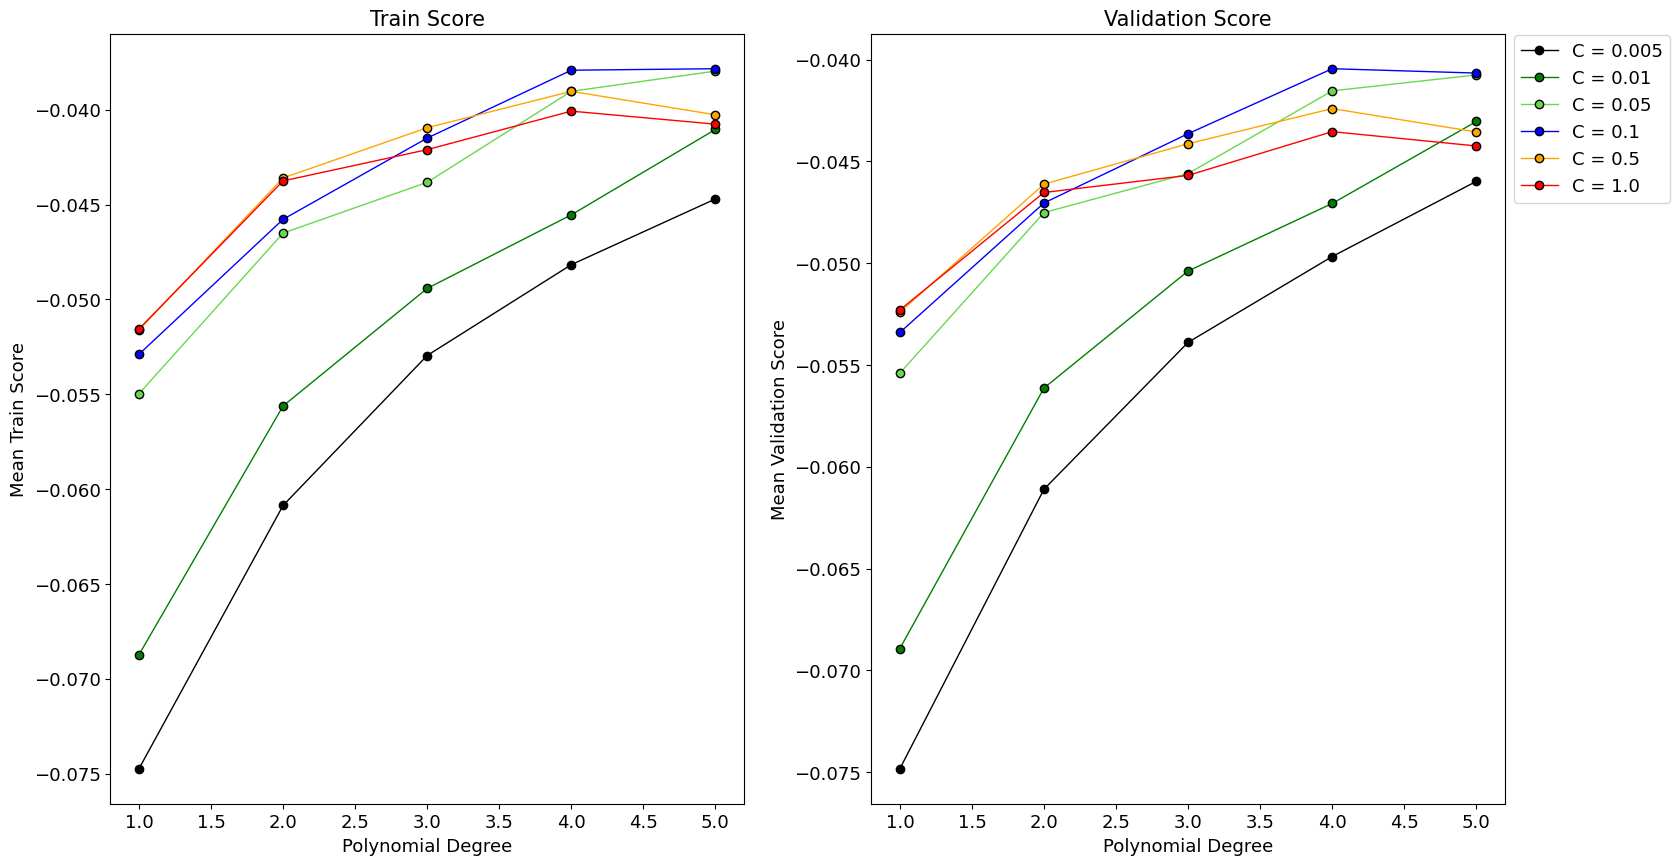

In [70]:
##Plot

C = C_svr_rbf
polynomial_degree = poly_degree

#Make Color
lotsa_colors = colors.get_named_colors_mapping()
colors_chosen = ['black' , 'green' , 'xkcd:fresh green' , 'blue' , 'orange' , 'red' , 'brown' , 'purple' , 'xkcd:dark yellow' ,
                'xkcd:dark blue' , 'pink' , 'xkcd:dark red']
colors_plot = []
for cname in colors_chosen:
    colors_plot.append(lotsa_colors[cname])
    
#Figure 4
fig4 , axs = plt.subplots(1, 2, figsize=(18,10) , dpi=100)

axs[0].set_title('Train Score' ,  fontsize = 15)
axs[1].set_title('Validation Score' ,  fontsize = 15)

axs[0].set_xlabel('Polynomial Degree' ,  fontsize = 13)
axs[0].set_ylabel('Mean Train Score' ,  fontsize = 13)


axs[1].set_xlabel('Polynomial Degree' ,  fontsize = 13)
axs[1].set_ylabel('Mean Validation Score' ,  fontsize = 13)

#Train Plot 

j = 0;
for i in C:
    ind = svr_poly_Results_sfs_svr.loc[svr_poly_Results_sfs_svr['param_C'] == i]
    axs[0].plot(ind['param_degree'],ind['mean_train_score'], color = colors_plot[j] , marker = 'o', mec = 'k', 
         label='C = '+str(i), linewidth= 1)
    j = j + 1
    
 
#Test Plot

j = 0;
for i in C:
    ind = svr_poly_Results_sfs_svr.loc[svr_poly_Results_sfs_svr['param_C'] == i]
    axs[1].plot(ind['param_degree'],ind['mean_test_score'], color = colors_plot[j] , marker = 'o', mec = 'k', 
         label='C = '+str(i), linewidth= 1)
    j = j + 1


   
axs[1].legend(bbox_to_anchor = (1, 1.01))
plt.rcParams.update({'font.size': 13})
#Save And Show
#plt.savefig('E:\\Machine_Learning_Paper\\SVM_P_Parameters_F1_Score_5Kfold.png')
plt.show()

#### RF feature importance

In [71]:
svr_poly_Optimized_RF_FI = GridSearchCV(svr_poly , param_grid_svr_poly, cv=kfold, verbose=3, return_train_score=True, scoring='neg_root_mean_squared_error')
svr_poly_Optimized_RF_FI.fit(x_train_rf_feature_impor,column_or_1d(y_train_rf_feature_impor))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END C=0.005, degree=1;, score=(train=-0.063, test=-0.060) total time=   0.0s
[CV 2/5] END C=0.005, degree=1;, score=(train=-0.062, test=-0.063) total time=   0.0s
[CV 3/5] END C=0.005, degree=1;, score=(train=-0.061, test=-0.065) total time=   0.0s
[CV 4/5] END C=0.005, degree=1;, score=(train=-0.061, test=-0.063) total time=   0.0s
[CV 5/5] END C=0.005, degree=1;, score=(train=-0.064, test=-0.060) total time=   0.0s
[CV 1/5] END C=0.005, degree=2;, score=(train=-0.047, test=-0.042) total time=   0.0s
[CV 2/5] END C=0.005, degree=2;, score=(train=-0.045, test=-0.049) total time=   0.0s
[CV 3/5] END C=0.005, degree=2;, score=(train=-0.045, test=-0.047) total time=   0.0s
[CV 4/5] END C=0.005, degree=2;, score=(train=-0.045, test=-0.044) total time=   0.0s
[CV 5/5] END C=0.005, degree=2;, score=(train=-0.045, test=-0.049) total time=   0.0s
[CV 1/5] END C=0.005, degree=3;, score=(train=-0.044, test=-0.039) total time=

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVR(kernel='poly'),
             param_grid={'C': [0.005, 0.01, 0.05, 0.1, 0.5, 1.0],
                         'degree': [1, 2, 3, 4, 5]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=3)

In [72]:
svr_poly_Results_RF_FI = pd.DataFrame(svr_poly_Optimized_RF_FI.cv_results_)
Best_Val_Score_svr_poly_RF_FI = svr_poly_Optimized_RF_FI.best_score_
print(Best_Val_Score_svr_poly_RF_FI)
Best_Params_svr_poly_RF_FI = svr_poly_Optimized_RF_FI.best_params_
print(Best_Params_svr_poly_RF_FI)

-0.04507902636310636
{'C': 0.005, 'degree': 4}


In [73]:
Best_Estimator_svr_poly_RF_FI = svr_poly_Optimized_RF_FI.best_estimator_
RMSE_svr_poly_RF_FI = root_mean_squared_error(column_or_1d(y_test_rf_feature_impor),Best_Estimator_svr_poly_RF_FI.predict(x_test_rf_feature_impor))
print('SVR Poly RMSE for RF_FI: ', RMSE_svr_poly_RF_FI)

SVR Poly RMSE for RF_FI:  0.047379400558330016


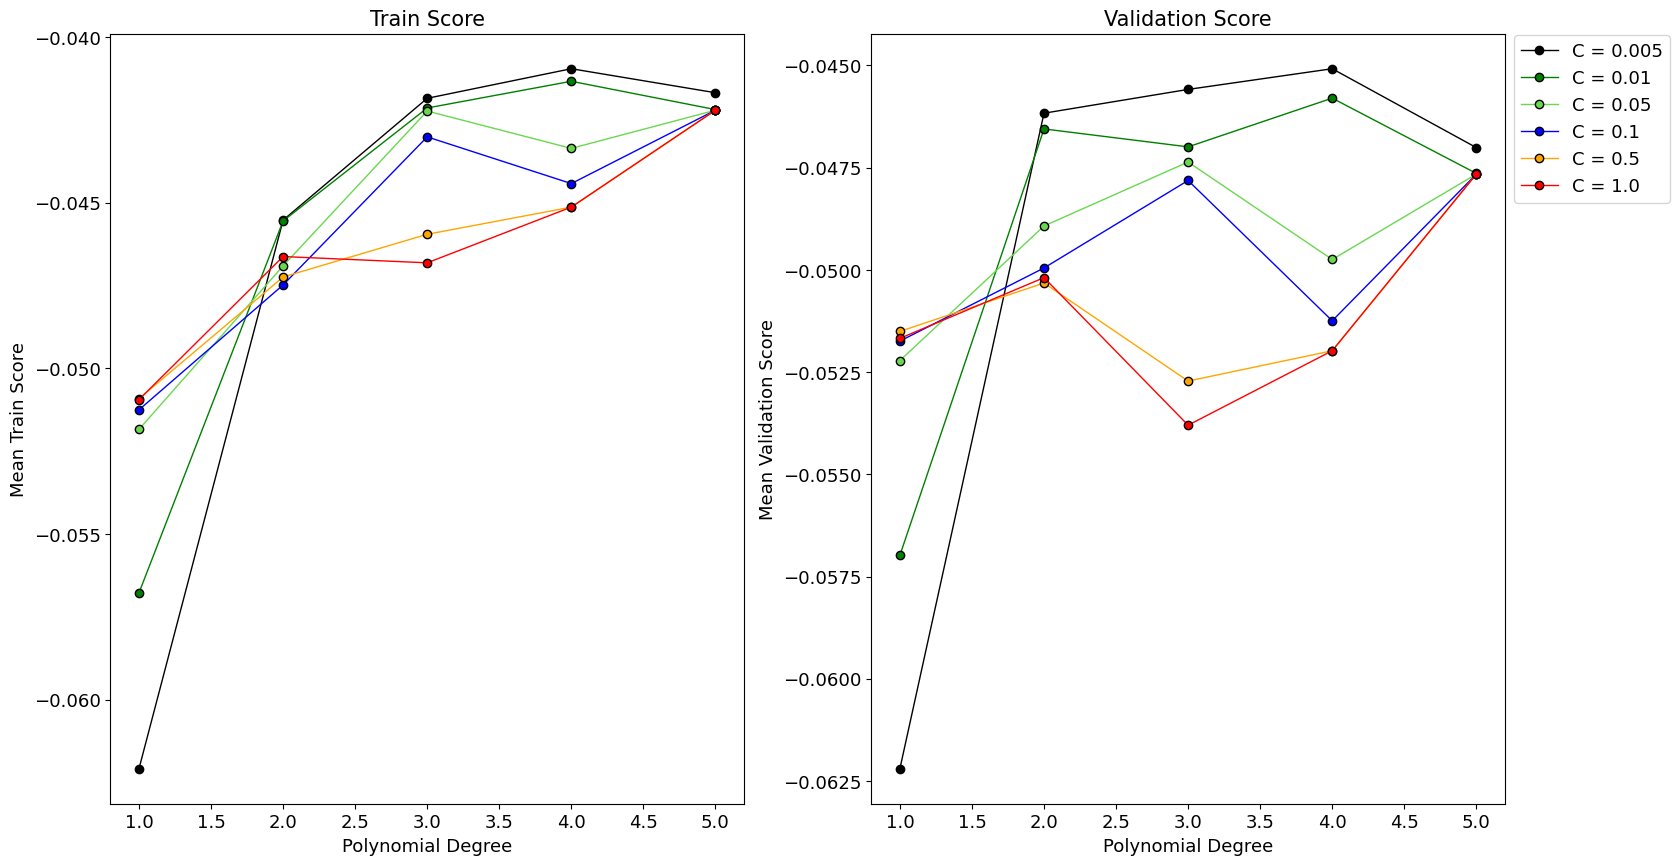

In [74]:
##Plot

C = C_svr_rbf
polynomial_degree = poly_degree

#Make Color
lotsa_colors = colors.get_named_colors_mapping()
colors_chosen = ['black' , 'green' , 'xkcd:fresh green' , 'blue' , 'orange' , 'red' , 'brown' , 'purple' , 'xkcd:dark yellow' ,
                'xkcd:dark blue' , 'pink' , 'xkcd:dark red']
colors_plot = []
for cname in colors_chosen:
    colors_plot.append(lotsa_colors[cname])
    
#Figure 4
fig4 , axs = plt.subplots(1, 2, figsize=(18,10) , dpi=100)

axs[0].set_title('Train Score' ,  fontsize = 15)
axs[1].set_title('Validation Score' ,  fontsize = 15)

axs[0].set_xlabel('Polynomial Degree' ,  fontsize = 13)
axs[0].set_ylabel('Mean Train Score' ,  fontsize = 13)


axs[1].set_xlabel('Polynomial Degree' ,  fontsize = 13)
axs[1].set_ylabel('Mean Validation Score' ,  fontsize = 13)

#Train Plot 

j = 0;
for i in C:
    ind = svr_poly_Results_RF_FI.loc[svr_poly_Results_RF_FI['param_C'] == i]
    axs[0].plot(ind['param_degree'],ind['mean_train_score'], color = colors_plot[j] , marker = 'o', mec = 'k', 
         label='C = '+str(i), linewidth= 1)
    j = j + 1
    
 
#Test Plot

j = 0;
for i in C:
    ind = svr_poly_Results_RF_FI.loc[svr_poly_Results_RF_FI['param_C'] == i]
    axs[1].plot(ind['param_degree'],ind['mean_test_score'], color = colors_plot[j] , marker = 'o', mec = 'k', 
         label='C = '+str(i), linewidth= 1)
    j = j + 1


   
axs[1].legend(bbox_to_anchor = (1, 1.01))
plt.rcParams.update({'font.size': 13})
#Save And Show
#plt.savefig('E:\\Machine_Learning_Paper\\SVM_P_Parameters_F1_Score_5Kfold.png')
plt.show()

#### Original_Data

In [75]:
svr_poly_Optimized_Original_Data = GridSearchCV(svr_poly , param_grid_svr_poly, cv=kfold, verbose=3, return_train_score=True, scoring='neg_root_mean_squared_error')
svr_poly_Optimized_Original_Data.fit(x_train,column_or_1d(y_train))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END C=0.005, degree=1;, score=(train=-0.082, test=-0.081) total time=   0.0s
[CV 2/5] END C=0.005, degree=1;, score=(train=-0.082, test=-0.085) total time=   0.0s
[CV 3/5] END C=0.005, degree=1;, score=(train=-0.080, test=-0.086) total time=   0.0s
[CV 4/5] END C=0.005, degree=1;, score=(train=-0.082, test=-0.081) total time=   0.0s
[CV 5/5] END C=0.005, degree=1;, score=(train=-0.083, test=-0.077) total time=   0.0s
[CV 1/5] END C=0.005, degree=2;, score=(train=-0.077, test=-0.075) total time=   0.0s
[CV 2/5] END C=0.005, degree=2;, score=(train=-0.074, test=-0.078) total time=   0.0s
[CV 3/5] END C=0.005, degree=2;, score=(train=-0.074, test=-0.080) total time=   0.0s
[CV 4/5] END C=0.005, degree=2;, score=(train=-0.075, test=-0.075) total time=   0.0s
[CV 5/5] END C=0.005, degree=2;, score=(train=-0.076, test=-0.072) total time=   0.0s
[CV 1/5] END C=0.005, degree=3;, score=(train=-0.073, test=-0.070) total time=

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVR(kernel='poly'),
             param_grid={'C': [0.005, 0.01, 0.05, 0.1, 0.5, 1.0],
                         'degree': [1, 2, 3, 4, 5]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=3)

In [76]:
svr_poly_Results_Original_Data = pd.DataFrame(svr_poly_Optimized_Original_Data.cv_results_)
Best_Val_Score_svr_poly_Original_Data = svr_poly_Optimized_Original_Data.best_score_
print(Best_Val_Score_svr_poly_Original_Data)
Best_Params_svr_poly_Original_Data = svr_poly_Optimized_Original_Data.best_params_
print(Best_Params_svr_poly_Original_Data)

-0.05209832819732376
{'C': 1.0, 'degree': 2}


In [77]:
Best_Estimator_svr_poly_Original_Data = svr_poly_Optimized_Original_Data.best_estimator_
RMSE_svr_poly_Original_Data = root_mean_squared_error(column_or_1d(y_test),Best_Estimator_svr_poly_Original_Data.predict(x_test))
print('SVR Poly RMSE for Original Data: ', RMSE_svr_poly_Original_Data)

SVR Poly RMSE for Original Data:  0.05109544408468202


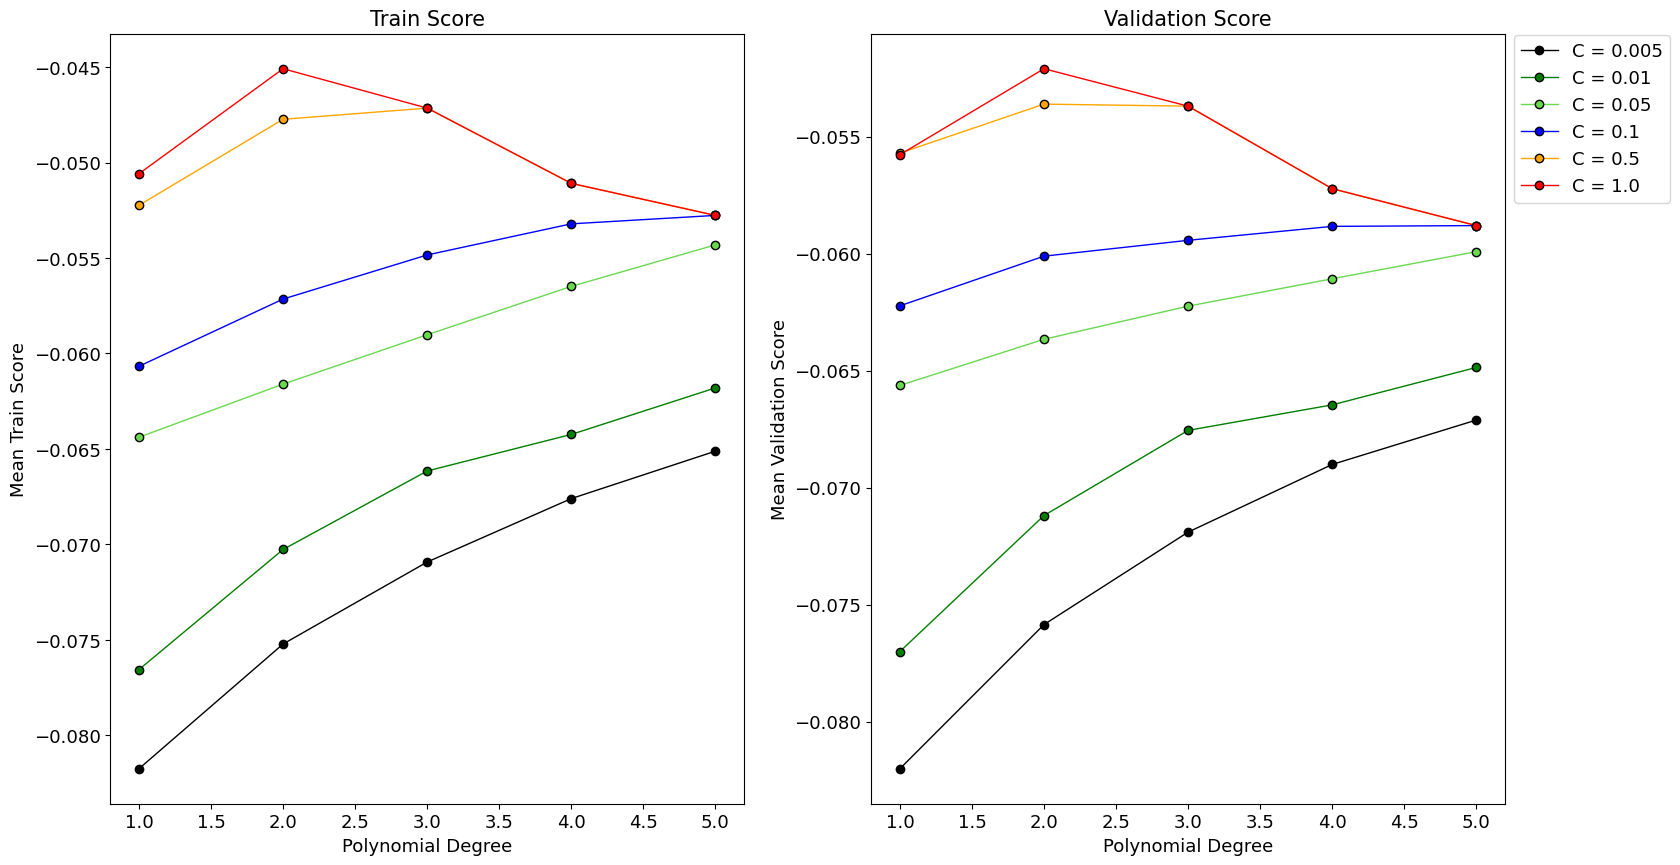

In [78]:
##Plot

C = C_svr_rbf
polynomial_degree = poly_degree

#Make Color
lotsa_colors = colors.get_named_colors_mapping()
colors_chosen = ['black' , 'green' , 'xkcd:fresh green' , 'blue' , 'orange' , 'red' , 'brown' , 'purple' , 'xkcd:dark yellow' ,
                'xkcd:dark blue' , 'pink' , 'xkcd:dark red']
colors_plot = []
for cname in colors_chosen:
    colors_plot.append(lotsa_colors[cname])
    
#Figure 4
fig4 , axs = plt.subplots(1, 2, figsize=(18,10) , dpi=100)

axs[0].set_title('Train Score' ,  fontsize = 15)
axs[1].set_title('Validation Score' ,  fontsize = 15)

axs[0].set_xlabel('Polynomial Degree' ,  fontsize = 13)
axs[0].set_ylabel('Mean Train Score' ,  fontsize = 13)


axs[1].set_xlabel('Polynomial Degree' ,  fontsize = 13)
axs[1].set_ylabel('Mean Validation Score' ,  fontsize = 13)

#Train Plot 

j = 0;
for i in C:
    ind = svr_poly_Results_Original_Data.loc[svr_poly_Results_Original_Data['param_C'] == i]
    axs[0].plot(ind['param_degree'],ind['mean_train_score'], color = colors_plot[j] , marker = 'o', mec = 'k', 
         label='C = '+str(i), linewidth= 1)
    j = j + 1
    
 
#Test Plot

j = 0;
for i in C:
    ind = svr_poly_Results_Original_Data.loc[svr_poly_Results_Original_Data['param_C'] == i]
    axs[1].plot(ind['param_degree'],ind['mean_test_score'], color = colors_plot[j] , marker = 'o', mec = 'k', 
         label='C = '+str(i), linewidth= 1)
    j = j + 1


   
axs[1].legend(bbox_to_anchor = (1, 1.01))
plt.rcParams.update({'font.size': 13})
#Save And Show
#plt.savefig('E:\\Machine_Learning_Paper\\SVM_P_Parameters_F1_Score_5Kfold.png')
plt.show()

In [79]:
Information_df['C_SVM_Poly'] = [Best_Params_svr_poly_RF_rfecv['C'],Best_Params_svr_poly_lasso_coef['C'],Best_Params_svr_poly_sfs_svr['C'],Best_Params_svr_poly_RF_FI['C'],Best_Params_svr_poly_Original_Data['C']]
Information_df['Degree_SVM_Poly'] = [Best_Params_svr_poly_RF_rfecv['degree'],Best_Params_svr_poly_lasso_coef['degree'],Best_Params_svr_poly_sfs_svr['degree'],Best_Params_svr_poly_RF_FI['degree'],Best_Params_svr_poly_Original_Data['degree']]
Information_df['Best Val Score SVM Poly'] = [Best_Val_Score_svr_poly_RF_rfecv,Best_Val_Score_svr_poly_lasso_coef,Best_Val_Score_svr_poly_sfs_svr,Best_Val_Score_svr_poly_RF_FI,Best_Val_Score_svr_poly_Original_Data]
Information_df['Test RMSE SVM Poly'] = [RMSE_svr_poly_RF_rfecv, RMSE_svr_poly_lasso_coef, RMSE_svr_poly_sfs_svr, RMSE_svr_poly_RF_FI, RMSE_svr_poly_Original_Data]
Information_df

Name                                           Features  \
0               RF RFECV  [[Overall Qual, Overall Cond, House Age, Resto...   
1             Lasso Coef  [[Overall Qual, Overall Cond, Bsmt Full Bath, ...   
2                SFS SVR  [[Overall Qual, Overall Cond, Bsmt Full Bath, ...   
3  RF Feature Importance  [[Overall Qual, House Age, Full Bath, Garage C...   
4          Original Data  [[Overall Qual, Overall Cond, House Age, Resto...   

   Num Of Features  Alpha_Ridge  Degree_Ridge  Best Val Score Ridge  \
0               55        100.0             3             -0.037490   
1               62        100.0             3             -0.036471   
2               31          1.0             3             -0.033072   
3               11          1.0             3             -0.038526   
4              258         50.0             2             -0.037329   

   Test RMSE Ridge  C_SVM_Poly  Degree_SVM_Poly  Best Val Score SVM Poly  \
0         0.032138       0.050                4                -0.049421   
1         0.034622       0.500                1                -0.048319   
2         0.031347       0.100                4                -0.040443   
3         0.039989       0.005                4                -0.045079   
4         0.033878       1.000                2                -0.052098   

   Test RMSE SVM Poly  
0            0.044457  
1            0.048358  
2            0.036948  
3            0.047379  
4            0.051095

In [80]:
Model_Final_Results['Best Val Score SVM Poly'] = [Best_Val_Score_svr_poly_RF_rfecv,Best_Val_Score_svr_poly_lasso_coef,Best_Val_Score_svr_poly_sfs_svr,Best_Val_Score_svr_poly_RF_FI,Best_Val_Score_svr_poly_Original_Data]
Model_Final_Results['Test RMSE SVM Poly'] = [RMSE_svr_poly_RF_rfecv, RMSE_svr_poly_lasso_coef, RMSE_svr_poly_sfs_svr, RMSE_svr_poly_RF_FI, RMSE_svr_poly_Original_Data]
Model_Final_Results


Name  Num Of Features  Best Val Score Ridge  \
0               RF RFECV               55             -0.037490   
1             Lasso Coef               62             -0.036471   
2                SFS SVR               31             -0.033072   
3  RF Feature Importance               11             -0.038526   
4          Original Data              258             -0.037329   

   Test RMSE Ridge  Best Val Score SVM Poly  Test RMSE SVM Poly  
0         0.032138                -0.049421            0.044457  
1         0.034622                -0.048319            0.048358  
2         0.031347                -0.040443            0.036948  
3         0.039989                -0.045079            0.047379  
4         0.033878                -0.052098            0.051095

# SVR RBF

In [81]:
svr_rbf = SVR(kernel='rbf',max_iter=-1)

C_svr_rbf = [5*10**-3, 10**-2, 5*10**-2, 10**-1, 5*10**-1, 1.0]
gamma_svr_rbf = ['auto', 'scale', 0.5 , 1, 2 , 5]

param_grid_svr_rbf ={
        'C':  C_svr_rbf,
        'gamma': gamma_svr_rbf,
}

#### RF rfecv

In [82]:
svr_rbf_Optimized_RF_rfecv = GridSearchCV(svr_rbf , param_grid_svr_rbf, cv=kfold, verbose=3, return_train_score=True, scoring='neg_root_mean_squared_error')
svr_rbf_Optimized_RF_rfecv.fit(x_train_RF_rfecv,column_or_1d(y_train_RF_rfecv))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END C=0.005, gamma=auto;, score=(train=-0.086, test=-0.087) total time=   0.0s
[CV 2/5] END C=0.005, gamma=auto;, score=(train=-0.086, test=-0.089) total time=   0.0s
[CV 3/5] END C=0.005, gamma=auto;, score=(train=-0.085, test=-0.089) total time=   0.0s
[CV 4/5] END C=0.005, gamma=auto;, score=(train=-0.086, test=-0.087) total time=   0.0s
[CV 5/5] END C=0.005, gamma=auto;, score=(train=-0.087, test=-0.081) total time=   0.0s
[CV 1/5] END C=0.005, gamma=scale;, score=(train=-0.079, test=-0.078) total time=   0.0s
[CV 2/5] END C=0.005, gamma=scale;, score=(train=-0.078, test=-0.082) total time=   0.0s
[CV 3/5] END C=0.005, gamma=scale;, score=(train=-0.077, test=-0.082) total time=   0.0s
[CV 4/5] END C=0.005, gamma=scale;, score=(train=-0.078, test=-0.079) total time=   0.0s
[CV 5/5] END C=0.005, gamma=scale;, score=(train=-0.079, test=-0.072) total time=   0.0s
[CV 1/5] END C=0.005, gamma=0.5;, score=(train=-0.087

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVR(),
             param_grid={'C': [0.005, 0.01, 0.05, 0.1, 0.5, 1.0],
                         'gamma': ['auto', 'scale', 0.5, 1, 2, 5]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=3)

In [83]:
svr_rbf_Results_RF_rfecv = pd.DataFrame(svr_rbf_Optimized_RF_rfecv.cv_results_)
Best_Val_Score_svr_rbf_RF_rfecv = svr_rbf_Optimized_RF_rfecv.best_score_
print(Best_Val_Score_svr_rbf_RF_rfecv)
Best_Params_svr_rbf_RF_rfecv = svr_rbf_Optimized_RF_rfecv.best_params_
print(Best_Params_svr_rbf_RF_rfecv)

-0.051588109910500904
{'C': 1.0, 'gamma': 'auto'}


In [84]:
Best_Estimator_svr_rbf_RF_rfecv = svr_rbf_Optimized_RF_rfecv.best_estimator_
RMSE_svr_rbf_RF_rfecv = root_mean_squared_error(column_or_1d(y_test_RF_rfecv),Best_Estimator_svr_rbf_RF_rfecv.predict(x_test_RF_rfecv))
print('SVR RBF RMSE for RF_rfecv: ', RMSE_svr_rbf_RF_rfecv)

SVR RBF RMSE for RF_rfecv:  0.05082114079144178


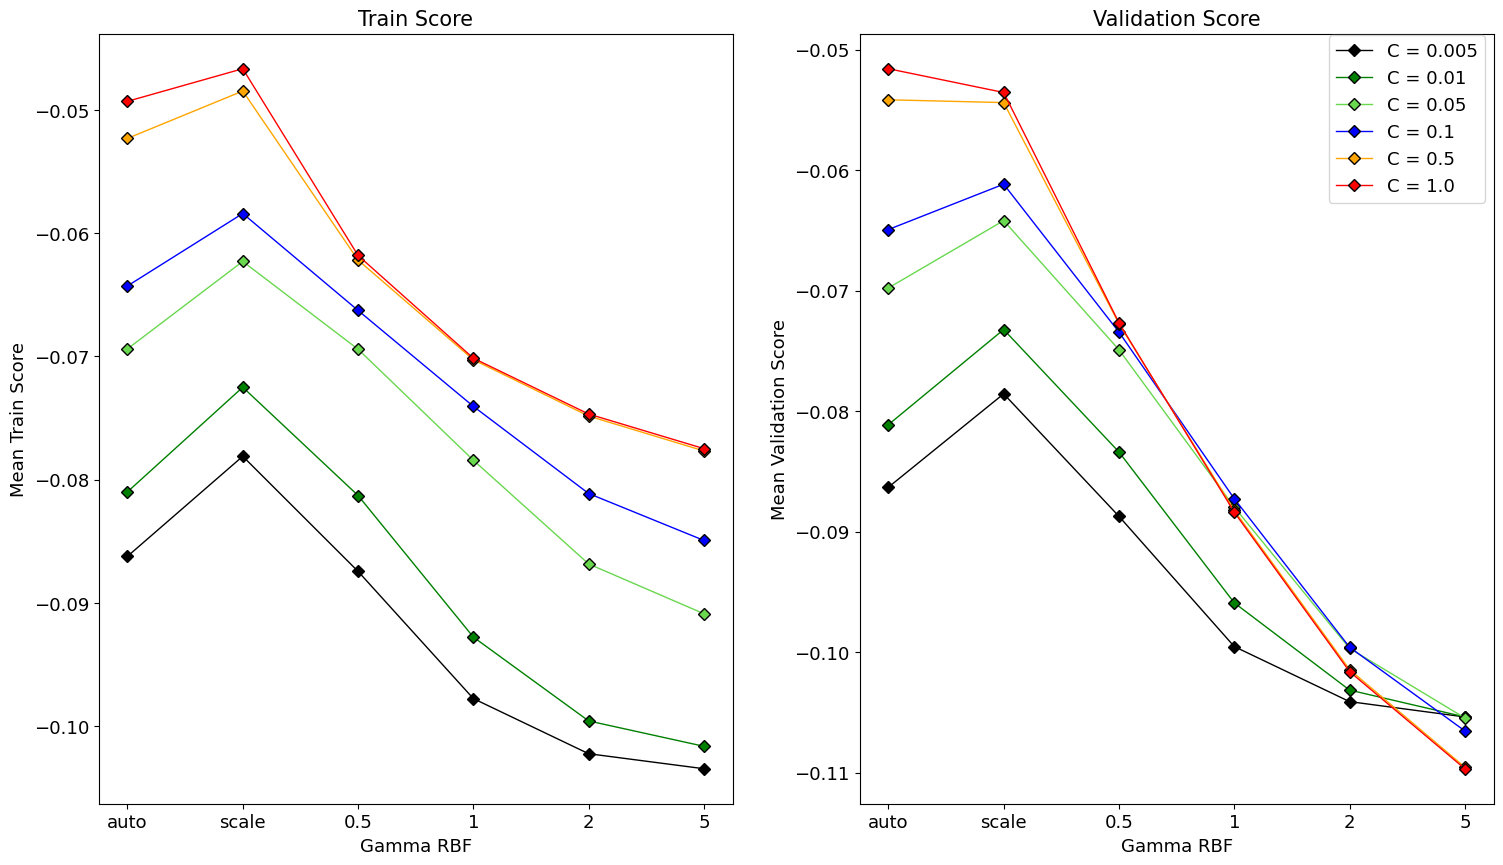

In [85]:
##Plot

#Make Color
lotsa_colors = colors.get_named_colors_mapping()
colors_chosen = ['black' , 'green' , 'xkcd:fresh green' , 'blue' , 'orange' , 'red' , 'brown' , 'purple' , 'xkcd:dark yellow' ,
                'xkcd:dark blue' , 'pink' , 'xkcd:dark red']
colors_plot = []
for cname in colors_chosen:
    colors_plot.append(lotsa_colors[cname])
    
#Figure 12
fig12 , axs = plt.subplots(1, 2, figsize=(18,10) , dpi=100)

axs[0].set_title('Train Score' ,  fontsize = 15)
axs[1].set_title('Validation Score' ,  fontsize = 15)

axs[0].set_xlabel('Gamma RBF' ,  fontsize = 13)
axs[0].set_ylabel('Mean Train Score' ,  fontsize = 13)


axs[1].set_xlabel('Gamma RBF' ,  fontsize = 13)
axs[1].set_ylabel('Mean Validation Score' ,  fontsize = 13)

#Train Plot 

j = 0;
for i in C_svr_rbf:
    ind = svr_rbf_Results_RF_rfecv.loc[svr_rbf_Results_RF_rfecv['param_C'] == i]
    axs[0].plot([str(s_g) for s_g in ind['param_gamma']],ind['mean_train_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label='C = '+str(i), linewidth= 1)
    j = j + 1
    
 
#Test Plot

j = 0;
for i in C_svr_rbf:
    ind = svr_rbf_Results_RF_rfecv.loc[svr_rbf_Results_RF_rfecv['param_C'] == i]
    axs[1].plot([str(s_g) for s_g in ind['param_gamma']],ind['mean_test_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label='C = '+str(i), linewidth= 1)
    j = j + 1


   
axs[1].legend(bbox_to_anchor = (1, 1.01))
plt.rcParams.update({'font.size': 13})

#Save And Show
#plt.savefig('E:\\Machine_Learning_Paper\\SVM_P_Parameters_F1_Score_5Kfold.png')
plt.show()

#### Lasso Coef

In [86]:
svr_rbf_Optimized_lasso_coef = GridSearchCV(svr_rbf , param_grid_svr_rbf, cv=kfold, verbose=3, return_train_score=True, scoring='neg_root_mean_squared_error')
svr_rbf_Optimized_lasso_coef.fit(x_train_lasso,column_or_1d(y_train_lasso))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END C=0.005, gamma=auto;, score=(train=-0.089, test=-0.089) total time=   0.0s
[CV 2/5] END C=0.005, gamma=auto;, score=(train=-0.088, test=-0.091) total time=   0.0s
[CV 3/5] END C=0.005, gamma=auto;, score=(train=-0.088, test=-0.092) total time=   0.0s
[CV 4/5] END C=0.005, gamma=auto;, score=(train=-0.088, test=-0.089) total time=   0.0s
[CV 5/5] END C=0.005, gamma=auto;, score=(train=-0.090, test=-0.083) total time=   0.0s
[CV 1/5] END C=0.005, gamma=scale;, score=(train=-0.079, test=-0.078) total time=   0.0s
[CV 2/5] END C=0.005, gamma=scale;, score=(train=-0.078, test=-0.082) total time=   0.0s
[CV 3/5] END C=0.005, gamma=scale;, score=(train=-0.077, test=-0.083) total time=   0.0s
[CV 4/5] END C=0.005, gamma=scale;, score=(train=-0.078, test=-0.079) total time=   0.0s
[CV 5/5] END C=0.005, gamma=scale;, score=(train=-0.080, test=-0.074) total time=   0.0s
[CV 1/5] END C=0.005, gamma=0.5;, score=(train=-0.092

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVR(),
             param_grid={'C': [0.005, 0.01, 0.05, 0.1, 0.5, 1.0],
                         'gamma': ['auto', 'scale', 0.5, 1, 2, 5]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=3)

In [87]:
svr_rbf_Results_lasso_coef = pd.DataFrame(svr_rbf_Optimized_lasso_coef.cv_results_)
Best_Val_Score_svr_rbf_lasso_coef = svr_rbf_Optimized_RF_rfecv.best_score_
print(Best_Val_Score_svr_rbf_lasso_coef)
Best_Params_svr_rbf_lasso_coef = svr_rbf_Optimized_lasso_coef.best_params_
print(Best_Params_svr_rbf_lasso_coef)

-0.051588109910500904
{'C': 1.0, 'gamma': 'auto'}


In [88]:
Best_Estimator_svr_rbf_lasso_coef = svr_rbf_Optimized_lasso_coef.best_estimator_
RMSE_svr_rbf_lasso_coef = root_mean_squared_error(column_or_1d(y_test_lasso),Best_Estimator_svr_rbf_lasso_coef.predict(x_test_lasso))
print('SVR RBF RMSE for lasso_coef: ', RMSE_svr_rbf_lasso_coef)

SVR RBF RMSE for lasso_coef:  0.0484077287783433


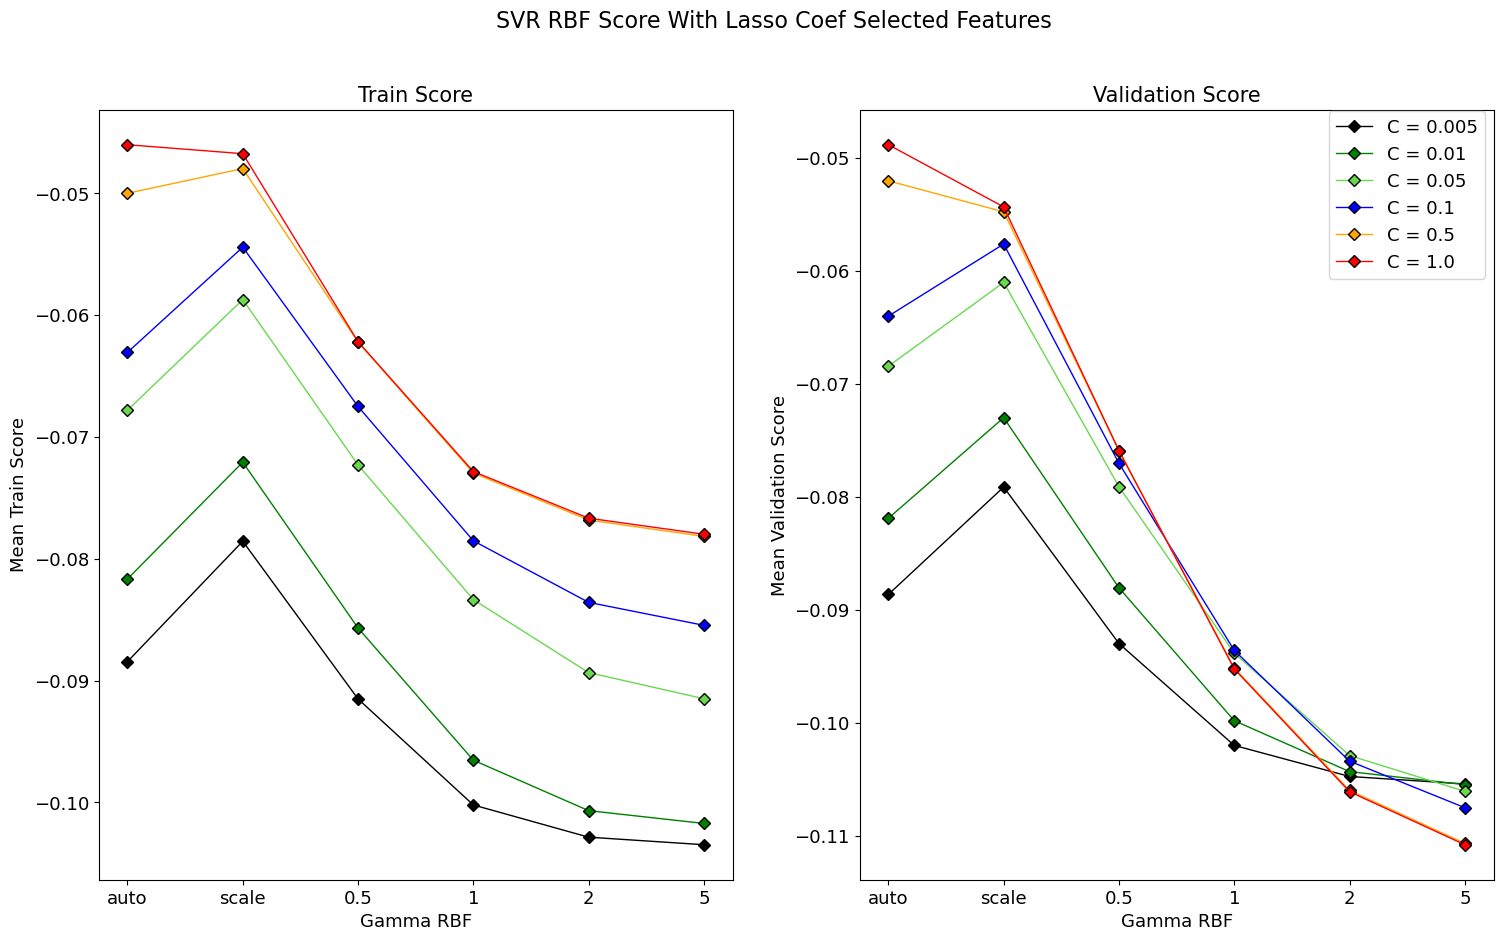

In [89]:
##Plot

#Make Color
lotsa_colors = colors.get_named_colors_mapping()
colors_chosen = ['black' , 'green' , 'xkcd:fresh green' , 'blue' , 'orange' , 'red' , 'brown' , 'purple' , 'xkcd:dark yellow' ,
                'xkcd:dark blue' , 'pink' , 'xkcd:dark red']
colors_plot = []
for cname in colors_chosen:
    colors_plot.append(lotsa_colors[cname])
    
#Figure 12
fig12 , axs = plt.subplots(1, 2, figsize=(18,10) , dpi=100)
fig12.suptitle('SVR RBF Score With Lasso Coef Selected Features', fontsize=16)

axs[0].set_title('Train Score' ,  fontsize = 15)
axs[1].set_title('Validation Score' ,  fontsize = 15)

axs[0].set_xlabel('Gamma RBF' ,  fontsize = 13)
axs[0].set_ylabel('Mean Train Score' ,  fontsize = 13)


axs[1].set_xlabel('Gamma RBF' ,  fontsize = 13)
axs[1].set_ylabel('Mean Validation Score' ,  fontsize = 13)

#Train Plot 

j = 0;
for i in C_svr_rbf:
    ind = svr_rbf_Results_lasso_coef.loc[svr_rbf_Results_lasso_coef['param_C'] == i]
    axs[0].plot([str(s_g) for s_g in ind['param_gamma']],ind['mean_train_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label='C = '+str(i), linewidth= 1)
    j = j + 1
    
 
#Test Plot

j = 0;
for i in C_svr_rbf:
    ind = svr_rbf_Results_lasso_coef.loc[svr_rbf_Results_lasso_coef['param_C'] == i]
    axs[1].plot([str(s_g) for s_g in ind['param_gamma']],ind['mean_test_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label='C = '+str(i), linewidth= 1)
    j = j + 1


   
axs[1].legend(bbox_to_anchor = (1, 1.01))
plt.rcParams.update({'font.size': 13})

#Save And Show
#plt.savefig('E:\\Machine_Learning_Paper\\SVM_P_Parameters_F1_Score_5Kfold.png')
plt.show()

#### SVR SFS

In [90]:
svr_rbf_Optimized_sfs_svr = GridSearchCV(svr_rbf , param_grid_svr_rbf, cv=kfold, verbose=3, return_train_score=True, scoring='neg_root_mean_squared_error')
svr_rbf_Optimized_sfs_svr.fit(x_train_sfs_svr,column_or_1d(y_train_sfs_svr))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END C=0.005, gamma=auto;, score=(train=-0.089, test=-0.090) total time=   0.0s
[CV 2/5] END C=0.005, gamma=auto;, score=(train=-0.089, test=-0.091) total time=   0.0s
[CV 3/5] END C=0.005, gamma=auto;, score=(train=-0.088, test=-0.091) total time=   0.0s
[CV 4/5] END C=0.005, gamma=auto;, score=(train=-0.089, test=-0.090) total time=   0.0s
[CV 5/5] END C=0.005, gamma=auto;, score=(train=-0.090, test=-0.083) total time=   0.0s
[CV 1/5] END C=0.005, gamma=scale;, score=(train=-0.074, test=-0.073) total time=   0.0s
[CV 2/5] END C=0.005, gamma=scale;, score=(train=-0.073, test=-0.076) total time=   0.0s
[CV 3/5] END C=0.005, gamma=scale;, score=(train=-0.072, test=-0.077) total time=   0.0s
[CV 4/5] END C=0.005, gamma=scale;, score=(train=-0.074, test=-0.074) total time=   0.0s
[CV 5/5] END C=0.005, gamma=scale;, score=(train=-0.074, test=-0.068) total time=   0.0s
[CV 1/5] END C=0.005, gamma=0.5;, score=(train=-0.073

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVR(),
             param_grid={'C': [0.005, 0.01, 0.05, 0.1, 0.5, 1.0],
                         'gamma': ['auto', 'scale', 0.5, 1, 2, 5]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=3)

In [91]:
svr_rbf_Results_sfs_svr = pd.DataFrame(svr_rbf_Optimized_sfs_svr.cv_results_)
Best_Val_Score_svr_rbf_sfs_svr = svr_rbf_Optimized_sfs_svr.best_score_
print(Best_Val_Score_svr_rbf_sfs_svr)
Best_Params_svr_rbf_sfs_svr = svr_rbf_Optimized_sfs_svr.best_params_
print(Best_Params_svr_rbf_sfs_svr)

-0.04251595398244426
{'C': 1.0, 'gamma': 'scale'}


In [92]:
Best_Estimator_svr_rbf_sfs_svr = svr_rbf_Optimized_sfs_svr.best_estimator_
RMSE_svr_rbf_sfs_svr = root_mean_squared_error(column_or_1d(y_test_sfs_svr),Best_Estimator_svr_rbf_sfs_svr.predict(x_test_sfs_svr))
print('SVR RBF RMSE for sfs_svr: ', RMSE_svr_rbf_sfs_svr)

SVR RBF RMSE for sfs_svr:  0.041376157241838366


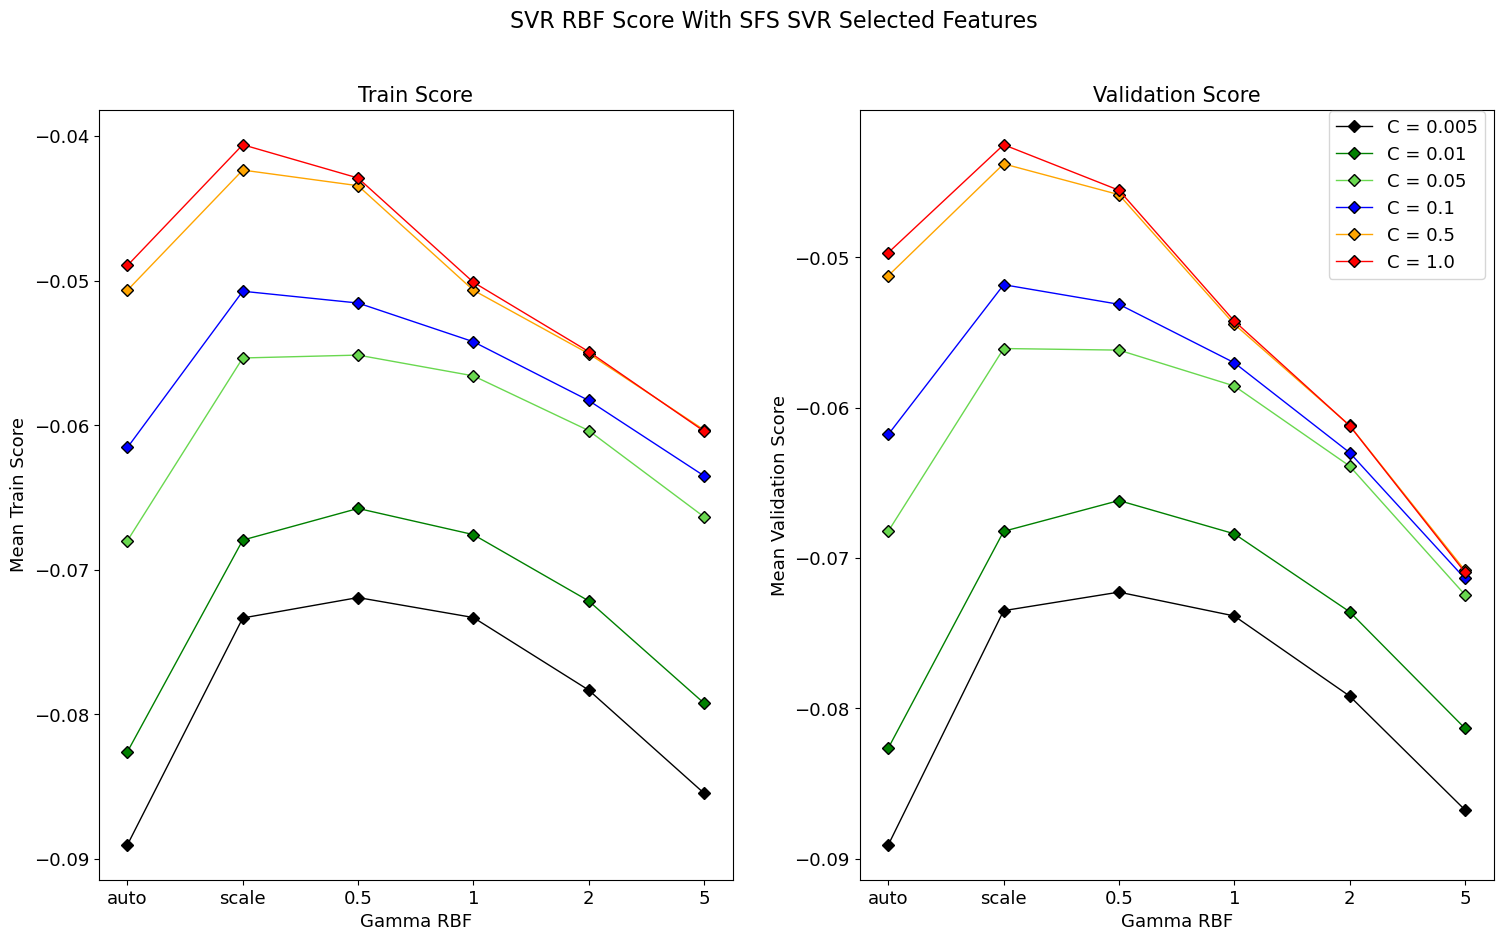

In [93]:
##Plot

#Make Color
lotsa_colors = colors.get_named_colors_mapping()
colors_chosen = ['black' , 'green' , 'xkcd:fresh green' , 'blue' , 'orange' , 'red' , 'brown' , 'purple' , 'xkcd:dark yellow' ,
                'xkcd:dark blue' , 'pink' , 'xkcd:dark red']
colors_plot = []
for cname in colors_chosen:
    colors_plot.append(lotsa_colors[cname])
    
#Figure 12
fig12 , axs = plt.subplots(1, 2, figsize=(18,10) , dpi=100)
fig12.suptitle('SVR RBF Score With SFS SVR Selected Features', fontsize=16)

axs[0].set_title('Train Score' ,  fontsize = 15)
axs[1].set_title('Validation Score' ,  fontsize = 15)

axs[0].set_xlabel('Gamma RBF' ,  fontsize = 13)
axs[0].set_ylabel('Mean Train Score' ,  fontsize = 13)


axs[1].set_xlabel('Gamma RBF' ,  fontsize = 13)
axs[1].set_ylabel('Mean Validation Score' ,  fontsize = 13)

#Train Plot 

j = 0;
for i in C_svr_rbf:
    ind = svr_rbf_Results_sfs_svr.loc[svr_rbf_Results_sfs_svr['param_C'] == i]
    axs[0].plot([str(s_g) for s_g in ind['param_gamma']],ind['mean_train_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label='C = '+str(i), linewidth= 1)
    j = j + 1
    
 
#Test Plot

j = 0;
for i in C_svr_rbf:
    ind = svr_rbf_Results_sfs_svr.loc[svr_rbf_Results_sfs_svr['param_C'] == i]
    axs[1].plot([str(s_g) for s_g in ind['param_gamma']],ind['mean_test_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label='C = '+str(i), linewidth= 1)
    j = j + 1


   
axs[1].legend(bbox_to_anchor = (1, 1.01))
plt.rcParams.update({'font.size': 13})

#Save And Show
#plt.savefig('E:\\Machine_Learning_Paper\\SVM_P_Parameters_F1_Score_5Kfold.png')
plt.show()

#### RF feature importance

In [94]:
svr_rbf_Optimized_RF_FI = GridSearchCV(svr_rbf , param_grid_svr_rbf, cv=kfold, verbose=3, return_train_score=True, scoring='neg_root_mean_squared_error')
svr_rbf_Optimized_RF_FI.fit(x_train_rf_feature_impor,column_or_1d(y_train_rf_feature_impor))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END C=0.005, gamma=auto;, score=(train=-0.082, test=-0.082) total time=   0.0s
[CV 2/5] END C=0.005, gamma=auto;, score=(train=-0.083, test=-0.085) total time=   0.0s
[CV 3/5] END C=0.005, gamma=auto;, score=(train=-0.082, test=-0.085) total time=   0.0s
[CV 4/5] END C=0.005, gamma=auto;, score=(train=-0.083, test=-0.084) total time=   0.0s
[CV 5/5] END C=0.005, gamma=auto;, score=(train=-0.084, test=-0.078) total time=   0.0s
[CV 1/5] END C=0.005, gamma=scale;, score=(train=-0.070, test=-0.065) total time=   0.0s
[CV 2/5] END C=0.005, gamma=scale;, score=(train=-0.068, test=-0.071) total time=   0.0s
[CV 3/5] END C=0.005, gamma=scale;, score=(train=-0.067, test=-0.072) total time=   0.0s
[CV 4/5] END C=0.005, gamma=scale;, score=(train=-0.068, test=-0.070) total time=   0.0s
[CV 5/5] END C=0.005, gamma=scale;, score=(train=-0.069, test=-0.065) total time=   0.0s
[CV 1/5] END C=0.005, gamma=0.5;, score=(train=-0.071

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVR(),
             param_grid={'C': [0.005, 0.01, 0.05, 0.1, 0.5, 1.0],
                         'gamma': ['auto', 'scale', 0.5, 1, 2, 5]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=3)

In [95]:
svr_rbf_Results_RF_FI = pd.DataFrame(svr_rbf_Optimized_RF_FI.cv_results_)
Best_Val_Score_svr_rbf_RF_FI = svr_rbf_Optimized_RF_FI.best_score_
print(Best_Val_Score_svr_rbf_RF_FI)
Best_Params_svr_rbf_RF_FI = svr_rbf_Optimized_RF_FI.best_params_
print(Best_Params_svr_rbf_RF_FI)

-0.04636695382386412
{'C': 0.5, 'gamma': 0.5}


In [96]:
Best_Estimator_svr_rbf_RF_FI = svr_rbf_Optimized_RF_FI.best_estimator_
RMSE_svr_rbf_RF_FI = root_mean_squared_error(column_or_1d(y_test_rf_feature_impor),Best_Estimator_svr_rbf_RF_FI.predict(x_test_rf_feature_impor))
print('SVR RBF RMSE for RF_FI: ', RMSE_svr_rbf_RF_FI)

SVR RBF RMSE for RF_FI:  0.043692625186899904


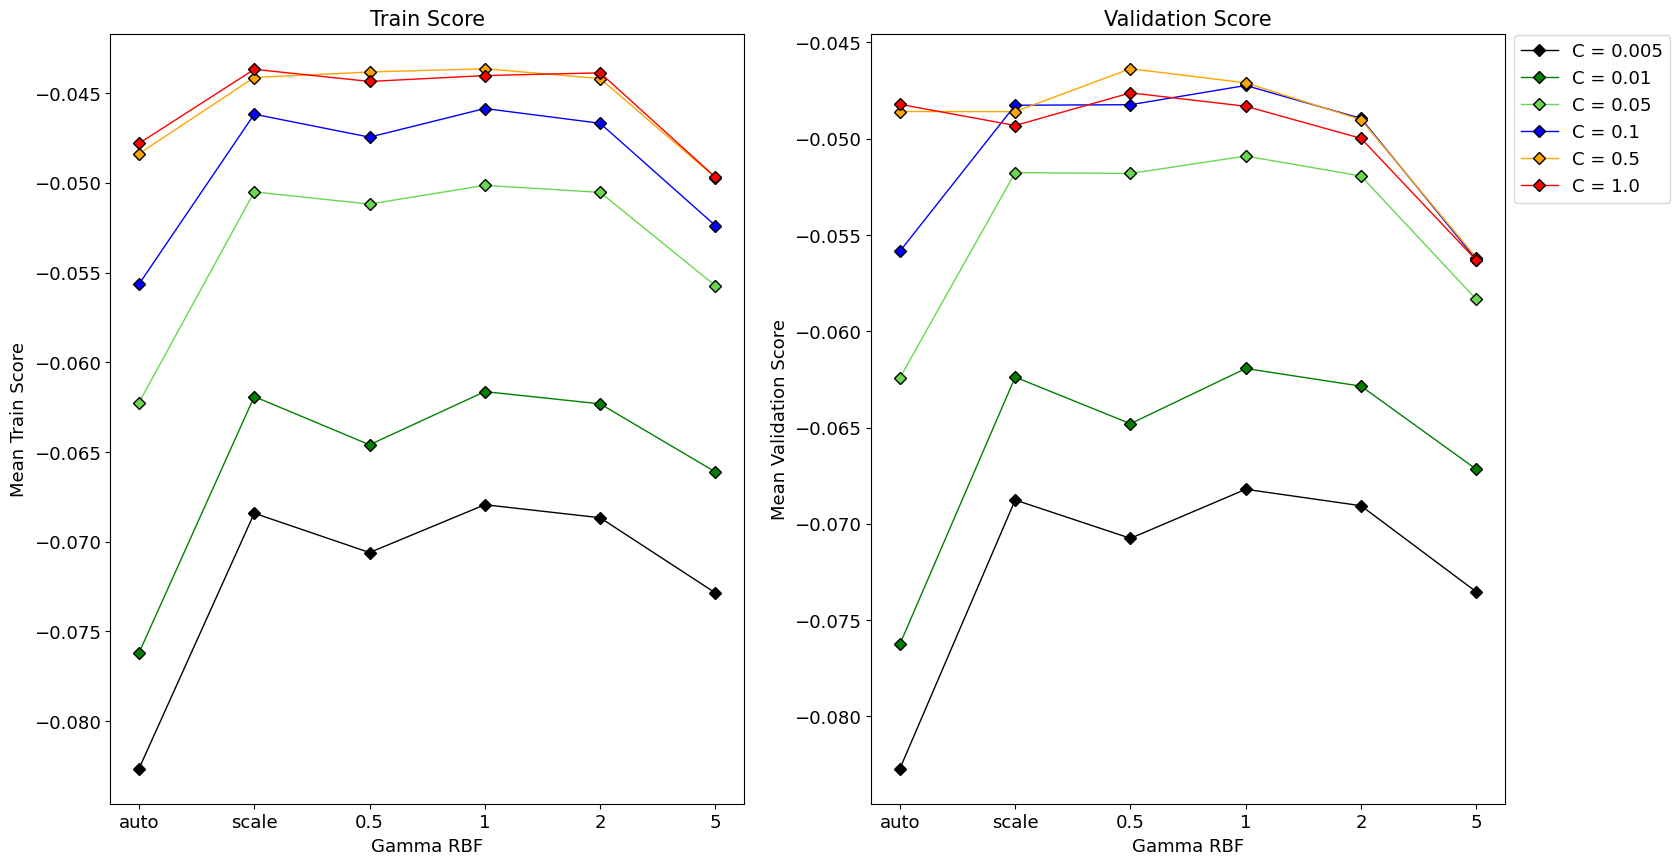

In [97]:
##Plot

#Make Color
lotsa_colors = colors.get_named_colors_mapping()
colors_chosen = ['black' , 'green' , 'xkcd:fresh green' , 'blue' , 'orange' , 'red' , 'brown' , 'purple' , 'xkcd:dark yellow' ,
                'xkcd:dark blue' , 'pink' , 'xkcd:dark red']
colors_plot = []
for cname in colors_chosen:
    colors_plot.append(lotsa_colors[cname])
    
#Figure 12
fig12 , axs = plt.subplots(1, 2, figsize=(18,10) , dpi=100)

axs[0].set_title('Train Score' ,  fontsize = 15)
axs[1].set_title('Validation Score' ,  fontsize = 15)

axs[0].set_xlabel('Gamma RBF' ,  fontsize = 13)
axs[0].set_ylabel('Mean Train Score' ,  fontsize = 13)


axs[1].set_xlabel('Gamma RBF' ,  fontsize = 13)
axs[1].set_ylabel('Mean Validation Score' ,  fontsize = 13)

#Train Plot 

j = 0;
for i in C_svr_rbf:
    ind = svr_rbf_Results_RF_FI.loc[svr_rbf_Results_RF_FI['param_C'] == i]
    axs[0].plot([str(s_g) for s_g in ind['param_gamma']],ind['mean_train_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label='C = '+str(i), linewidth= 1)
    j = j + 1
    
 
#Test Plot

j = 0;
for i in C_svr_rbf:
    ind = svr_rbf_Results_RF_FI.loc[svr_rbf_Results_RF_FI['param_C'] == i]
    axs[1].plot([str(s_g) for s_g in ind['param_gamma']],ind['mean_test_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label='C = '+str(i), linewidth= 1)
    j = j + 1


   
axs[1].legend(bbox_to_anchor = (1, 1.01))
plt.rcParams.update({'font.size': 13})

#Save And Show
#plt.savefig('E:\\Machine_Learning_Paper\\SVM_P_Parameters_F1_Score_5Kfold.png')
plt.show()

#### Original Data

In [98]:
svr_rbf_Optimized_Original_Data = GridSearchCV(svr_rbf , param_grid_svr_rbf, cv=kfold, verbose=3, return_train_score=True, scoring='neg_root_mean_squared_error')
svr_rbf_Optimized_Original_Data.fit(x_train,column_or_1d(y_train))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END C=0.005, gamma=auto;, score=(train=-0.093, test=-0.095) total time=   0.1s
[CV 2/5] END C=0.005, gamma=auto;, score=(train=-0.093, test=-0.096) total time=   0.1s
[CV 3/5] END C=0.005, gamma=auto;, score=(train=-0.092, test=-0.096) total time=   0.1s
[CV 4/5] END C=0.005, gamma=auto;, score=(train=-0.093, test=-0.093) total time=   0.1s
[CV 5/5] END C=0.005, gamma=auto;, score=(train=-0.095, test=-0.088) total time=   0.1s
[CV 1/5] END C=0.005, gamma=scale;, score=(train=-0.083, test=-0.082) total time=   0.0s
[CV 2/5] END C=0.005, gamma=scale;, score=(train=-0.082, test=-0.085) total time=   0.0s
[CV 3/5] END C=0.005, gamma=scale;, score=(train=-0.081, test=-0.086) total time=   0.0s
[CV 4/5] END C=0.005, gamma=scale;, score=(train=-0.082, test=-0.082) total time=   0.0s
[CV 5/5] END C=0.005, gamma=scale;, score=(train=-0.083, test=-0.077) total time=   0.0s
[CV 1/5] END C=0.005, gamma=0.5;, score=(train=-0.102

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVR(),
             param_grid={'C': [0.005, 0.01, 0.05, 0.1, 0.5, 1.0],
                         'gamma': ['auto', 'scale', 0.5, 1, 2, 5]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=3)

In [99]:
svr_rbf_Results_Original_Data = pd.DataFrame(svr_rbf_Optimized_Original_Data.cv_results_)
Best_Val_Score_svr_rbf_Original_Data = svr_rbf_Optimized_Original_Data.best_score_
print(Best_Val_Score_svr_rbf_Original_Data)
Best_Params_svr_rbf_Original_Data = svr_rbf_Optimized_Original_Data.best_params_
print(Best_Params_svr_rbf_Original_Data)

-0.05737981670072434
{'C': 1.0, 'gamma': 'scale'}


In [100]:
Best_Estimator_svr_rbf_Original_Data = svr_rbf_Optimized_Original_Data.best_estimator_
RMSE_svr_rbf_Original_Data = root_mean_squared_error(column_or_1d(y_test),Best_Estimator_svr_rbf_Original_Data.predict(x_test))
print('SVR RBF RMSE for Original_Data: ', RMSE_svr_rbf_Original_Data)

SVR RBF RMSE for Original_Data:  0.057622445576264086


In [101]:
Information_df['C_SVM_RBF'] = [Best_Params_svr_rbf_RF_rfecv['C'],Best_Params_svr_rbf_lasso_coef['C'],Best_Params_svr_rbf_sfs_svr['C'], Best_Params_svr_rbf_RF_FI['C'], Best_Params_svr_rbf_Original_Data['C']]
Information_df['Gamma_SVM_RBF'] = [Best_Params_svr_rbf_RF_rfecv['gamma'],Best_Params_svr_rbf_lasso_coef['gamma'],Best_Params_svr_rbf_sfs_svr['gamma'], Best_Params_svr_rbf_RF_FI['gamma'], Best_Params_svr_rbf_Original_Data['gamma']]
Information_df['Best Val Score SVM RBF'] = [Best_Val_Score_svr_rbf_RF_rfecv,Best_Val_Score_svr_rbf_lasso_coef,Best_Val_Score_svr_rbf_sfs_svr,Best_Val_Score_svr_rbf_RF_FI,Best_Val_Score_svr_rbf_Original_Data]
Information_df['Test RMSE SVM RBF'] = [RMSE_svr_rbf_RF_rfecv, RMSE_svr_rbf_lasso_coef, RMSE_svr_rbf_sfs_svr, RMSE_svr_rbf_RF_FI, RMSE_svr_rbf_Original_Data]
Information_df

Name                                           Features  \
0               RF RFECV  [[Overall Qual, Overall Cond, House Age, Resto...   
1             Lasso Coef  [[Overall Qual, Overall Cond, Bsmt Full Bath, ...   
2                SFS SVR  [[Overall Qual, Overall Cond, Bsmt Full Bath, ...   
3  RF Feature Importance  [[Overall Qual, House Age, Full Bath, Garage C...   
4          Original Data  [[Overall Qual, Overall Cond, House Age, Resto...   

   Num Of Features  Alpha_Ridge  Degree_Ridge  Best Val Score Ridge  \
0               55        100.0             3             -0.037490   
1               62        100.0             3             -0.036471   
2               31          1.0             3             -0.033072   
3               11          1.0             3             -0.038526   
4              258         50.0             2             -0.037329   

   Test RMSE Ridge  C_SVM_Poly  Degree_SVM_Poly  Best Val Score SVM Poly  \
0         0.032138       0.050                4                -0.049421   
1         0.034622       0.500                1                -0.048319   
2         0.031347       0.100                4                -0.040443   
3         0.039989       0.005                4                -0.045079   
4         0.033878       1.000                2                -0.052098   

   Test RMSE SVM Poly  C_SVM_RBF Gamma_SVM_RBF  Best Val Score SVM RBF  \
0            0.044457        1.0          auto               -0.051588   
1            0.048358        1.0          auto               -0.051588   
2            0.036948        1.0         scale               -0.042516   
3            0.047379        0.5           0.5               -0.046367   
4            0.051095        1.0         scale               -0.057380   

   Test RMSE SVM RBF  
0           0.050821  
1           0.048408  
2           0.041376  
3           0.043693  
4           0.057622

In [102]:

Model_Final_Results['Best Val Score SVM RBF'] = [Best_Val_Score_svr_rbf_RF_rfecv,Best_Val_Score_svr_rbf_lasso_coef,Best_Val_Score_svr_rbf_sfs_svr,Best_Val_Score_svr_rbf_RF_FI,Best_Val_Score_svr_rbf_Original_Data]
Model_Final_Results['Test RMSE SVM RBF'] = [RMSE_svr_rbf_RF_rfecv, RMSE_svr_rbf_lasso_coef, RMSE_svr_rbf_sfs_svr, RMSE_svr_rbf_RF_FI, RMSE_svr_rbf_Original_Data]
Model_Final_Results

Name  Num Of Features  Best Val Score Ridge  \
0               RF RFECV               55             -0.037490   
1             Lasso Coef               62             -0.036471   
2                SFS SVR               31             -0.033072   
3  RF Feature Importance               11             -0.038526   
4          Original Data              258             -0.037329   

   Test RMSE Ridge  Best Val Score SVM Poly  Test RMSE SVM Poly  \
0         0.032138                -0.049421            0.044457   
1         0.034622                -0.048319            0.048358   
2         0.031347                -0.040443            0.036948   
3         0.039989                -0.045079            0.047379   
4         0.033878                -0.052098            0.051095   

   Best Val Score SVM RBF  Test RMSE SVM RBF  
0               -0.051588           0.050821  
1               -0.051588           0.048408  
2               -0.042516           0.041376  
3               -0.046367           0.043693  
4               -0.057380           0.057622

# KNN Regression

In [103]:
knn_model = KNeighborsRegressor()

num_neighbors = [2,3,4,5,6,7,8,9]

param_grid_knn = {
    'n_neighbors': num_neighbors
}

#### RF rfecv

In [104]:
knn_Optimized_RF_rfecv = GridSearchCV(knn_model , param_grid_knn, cv=kfold, verbose=3, return_train_score=True, scoring='neg_root_mean_squared_error')
knn_Optimized_RF_rfecv.fit(x_train_RF_rfecv,y_train_RF_rfecv)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END n_neighbors=2;, score=(train=-0.035, test=-0.057) total time=   0.2s
[CV 2/5] END n_neighbors=2;, score=(train=-0.033, test=-0.061) total time=   0.0s
[CV 3/5] END n_neighbors=2;, score=(train=-0.032, test=-0.066) total time=   0.0s
[CV 4/5] END n_neighbors=2;, score=(train=-0.033, test=-0.057) total time=   0.0s
[CV 5/5] END n_neighbors=2;, score=(train=-0.034, test=-0.055) total time=   0.0s
[CV 1/5] END n_neighbors=3;, score=(train=-0.040, test=-0.055) total time=   0.0s
[CV 2/5] END n_neighbors=3;, score=(train=-0.040, test=-0.060) total time=   0.0s
[CV 3/5] END n_neighbors=3;, score=(train=-0.038, test=-0.065) total time=   0.0s
[CV 4/5] END n_neighbors=3;, score=(train=-0.041, test=-0.055) total time=   0.0s
[CV 5/5] END n_neighbors=3;, score=(train=-0.041, test=-0.050) total time=   0.0s
[CV 1/5] END n_neighbors=4;, score=(train=-0.044, test=-0.053) total time=   0.0s
[CV 2/5] END n_neighbors=4;, score=(tr

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=3)

In [105]:
knn_Results_RF_rfecv = pd.DataFrame(knn_Optimized_RF_rfecv.cv_results_)
Best_Val_Score_knn_RF_rfecv = knn_Optimized_RF_rfecv.best_score_
print(Best_Val_Score_knn_RF_rfecv)
Best_Params_knn_RF_rfecv = knn_Optimized_RF_rfecv.best_params_
print(Best_Params_knn_RF_rfecv)

-0.05486283618816699
{'n_neighbors': 7}


In [106]:
Best_Estimator_knn_RF_rfecv = knn_Optimized_RF_rfecv.best_estimator_
RMSE_knn_RF_rfecv = root_mean_squared_error(y_test_RF_rfecv,Best_Estimator_knn_RF_rfecv.predict(x_test_RF_rfecv))
print('KNN Regressor RMSE for RF_rfecv: ', RMSE_knn_RF_rfecv)

KNN Regressor RMSE for RF_rfecv:  0.05410956657263625


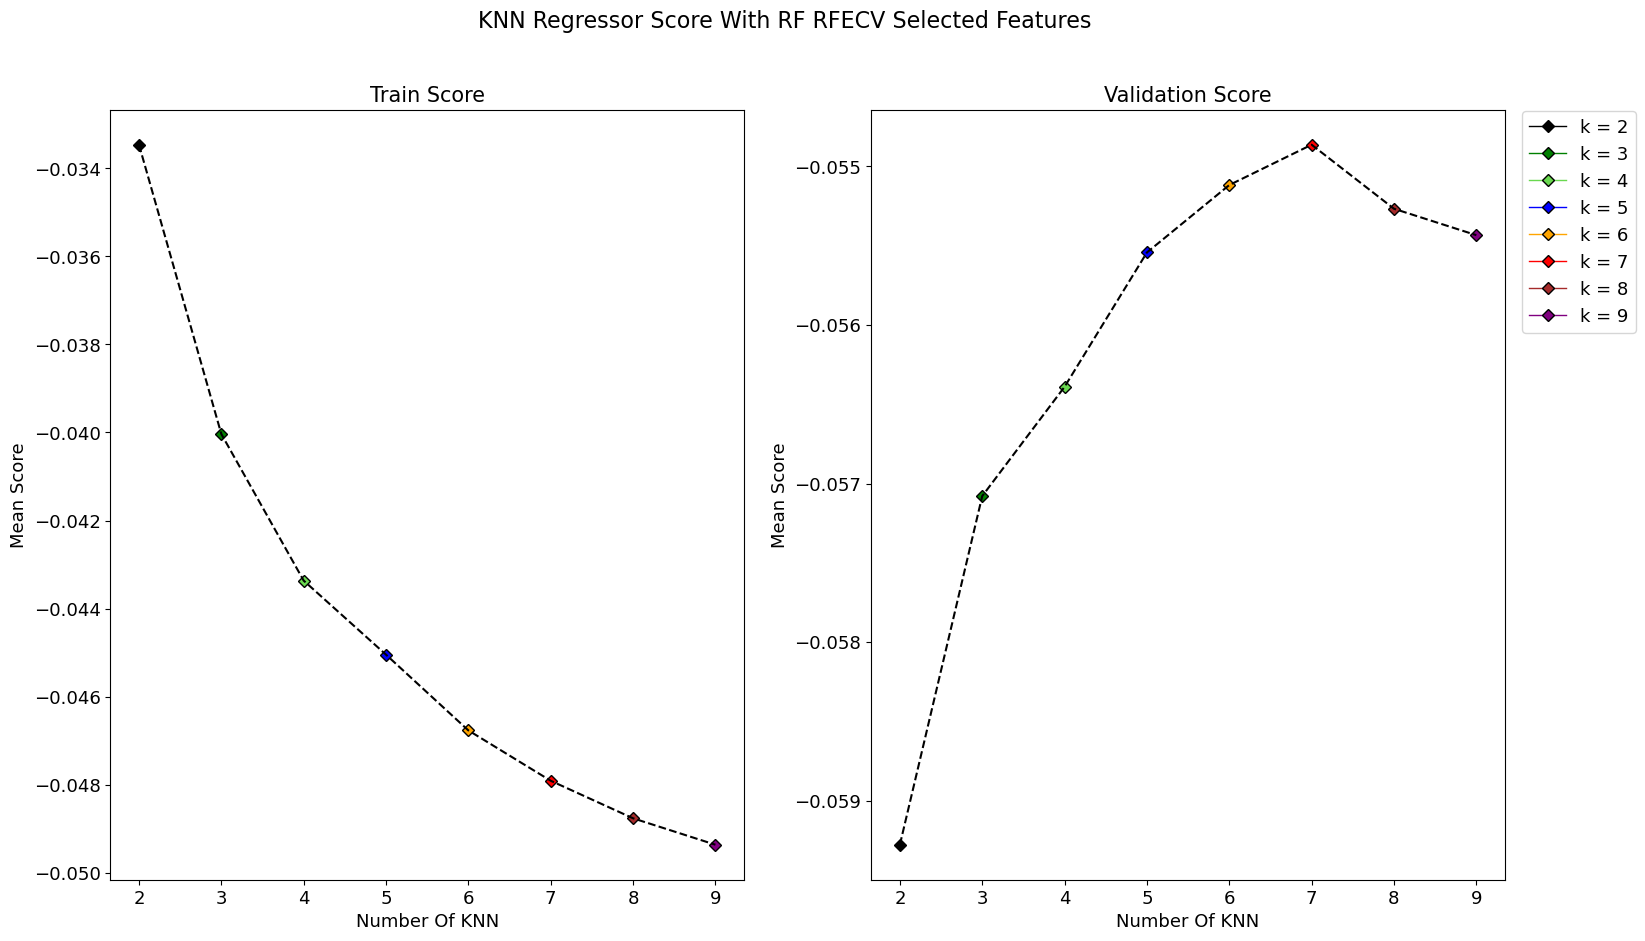

In [107]:
N_neighbors = num_neighbors

#Plot

#Make Color
lotsa_colors = colors.get_named_colors_mapping()
colors_chosen = ['black' , 'green' , 'xkcd:fresh green' , 'blue' , 'orange' , 'red' , 'brown' , 'purple' , 'xkcd:dark yellow' ,
                'xkcd:dark blue' , 'pink' , 'xkcd:dark red']
colors_plot = []
for cname in colors_chosen:
    colors_plot.append(lotsa_colors[cname])

#Figure 2
fig2 , axs = plt.subplots(1, 2, figsize=(18,10) , dpi=100)
fig2.suptitle('KNN Regressor Score With RF RFECV Selected Features', fontsize=16)

axs[0].set_title('Train Score' ,  fontsize = 15)
axs[1].set_title('Validation Score' ,  fontsize = 15)

axs[0].set_xlabel('Number Of KNN' ,  fontsize = 13)
axs[0].set_ylabel('Mean Score' ,  fontsize = 13)


axs[1].set_xlabel('Number Of KNN' ,  fontsize = 13)
axs[1].set_ylabel('Mean Score' ,  fontsize = 13)

#Train Plot 

j = 0;
for i in N_neighbors:
    ind = knn_Results_RF_rfecv.loc[knn_Results_RF_rfecv['param_n_neighbors'] == i]
    axs[0].plot(ind['param_n_neighbors'],ind['mean_train_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label='k = '+str(i), linewidth= 1)
    j = j + 1
    
 
#Test Plot

j = 0;
for i in N_neighbors:
    ind = knn_Results_RF_rfecv.loc[knn_Results_RF_rfecv['param_n_neighbors'] == i]
    axs[1].plot(ind['param_n_neighbors'],ind['mean_test_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label='k = '+str(i), linewidth= 1)
    j = j + 1

plt.setp(axs, xticks=N_neighbors)

axs[0].plot(N_neighbors, knn_Results_RF_rfecv['mean_train_score'], 'k--')
axs[1].plot(N_neighbors, knn_Results_RF_rfecv['mean_test_score'], 'k--')

axs[1].legend(bbox_to_anchor = (1.22, 1.01))
plt.rcParams.update({'font.size': 13})
#Save And Show
#plt.savefig('E:\\Machine_Learning_Paper\\KNN_Parameters_F1_Score_5Kfold.png')
plt.show()


#### Lasso Coef

In [108]:
knn_Optimized_lasso_coef = GridSearchCV(knn_model , param_grid_knn, cv=kfold, verbose=3, return_train_score=True, scoring='neg_root_mean_squared_error')
knn_Optimized_lasso_coef.fit(x_train_lasso,y_train_lasso)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END n_neighbors=2;, score=(train=-0.034, test=-0.055) total time=   0.0s
[CV 2/5] END n_neighbors=2;, score=(train=-0.032, test=-0.059) total time=   0.0s
[CV 3/5] END n_neighbors=2;, score=(train=-0.031, test=-0.066) total time=   0.0s
[CV 4/5] END n_neighbors=2;, score=(train=-0.032, test=-0.057) total time=   0.0s
[CV 5/5] END n_neighbors=2;, score=(train=-0.033, test=-0.056) total time=   0.0s
[CV 1/5] END n_neighbors=3;, score=(train=-0.041, test=-0.053) total time=   0.0s
[CV 2/5] END n_neighbors=3;, score=(train=-0.039, test=-0.058) total time=   0.0s
[CV 3/5] END n_neighbors=3;, score=(train=-0.039, test=-0.067) total time=   0.0s
[CV 4/5] END n_neighbors=3;, score=(train=-0.040, test=-0.056) total time=   0.0s
[CV 5/5] END n_neighbors=3;, score=(train=-0.040, test=-0.054) total time=   0.0s
[CV 1/5] END n_neighbors=4;, score=(train=-0.045, test=-0.053) total time=   0.0s
[CV 2/5] END n_neighbors=4;, score=(tr

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=3)

In [109]:
knn_Results_lasso_coef = pd.DataFrame(knn_Optimized_lasso_coef.cv_results_)
Best_Val_Score_knn_lasso_coef = knn_Optimized_lasso_coef.best_score_
print(Best_Val_Score_knn_lasso_coef)
Best_Params_knn_lasso_coef = knn_Optimized_lasso_coef.best_params_
print(Best_Params_knn_lasso_coef)

-0.05695462582316857
{'n_neighbors': 6}


In [110]:
Best_Estimator_knn_lasso_coef = knn_Optimized_lasso_coef.best_estimator_
RMSE_knn_lasso_coef = root_mean_squared_error(y_test_lasso,Best_Estimator_knn_lasso_coef.predict(x_test_lasso))
print('KNN Regressor RMSE for lasso_coef: ', RMSE_knn_lasso_coef)

KNN Regressor RMSE for lasso_coef:  0.05739312620346095


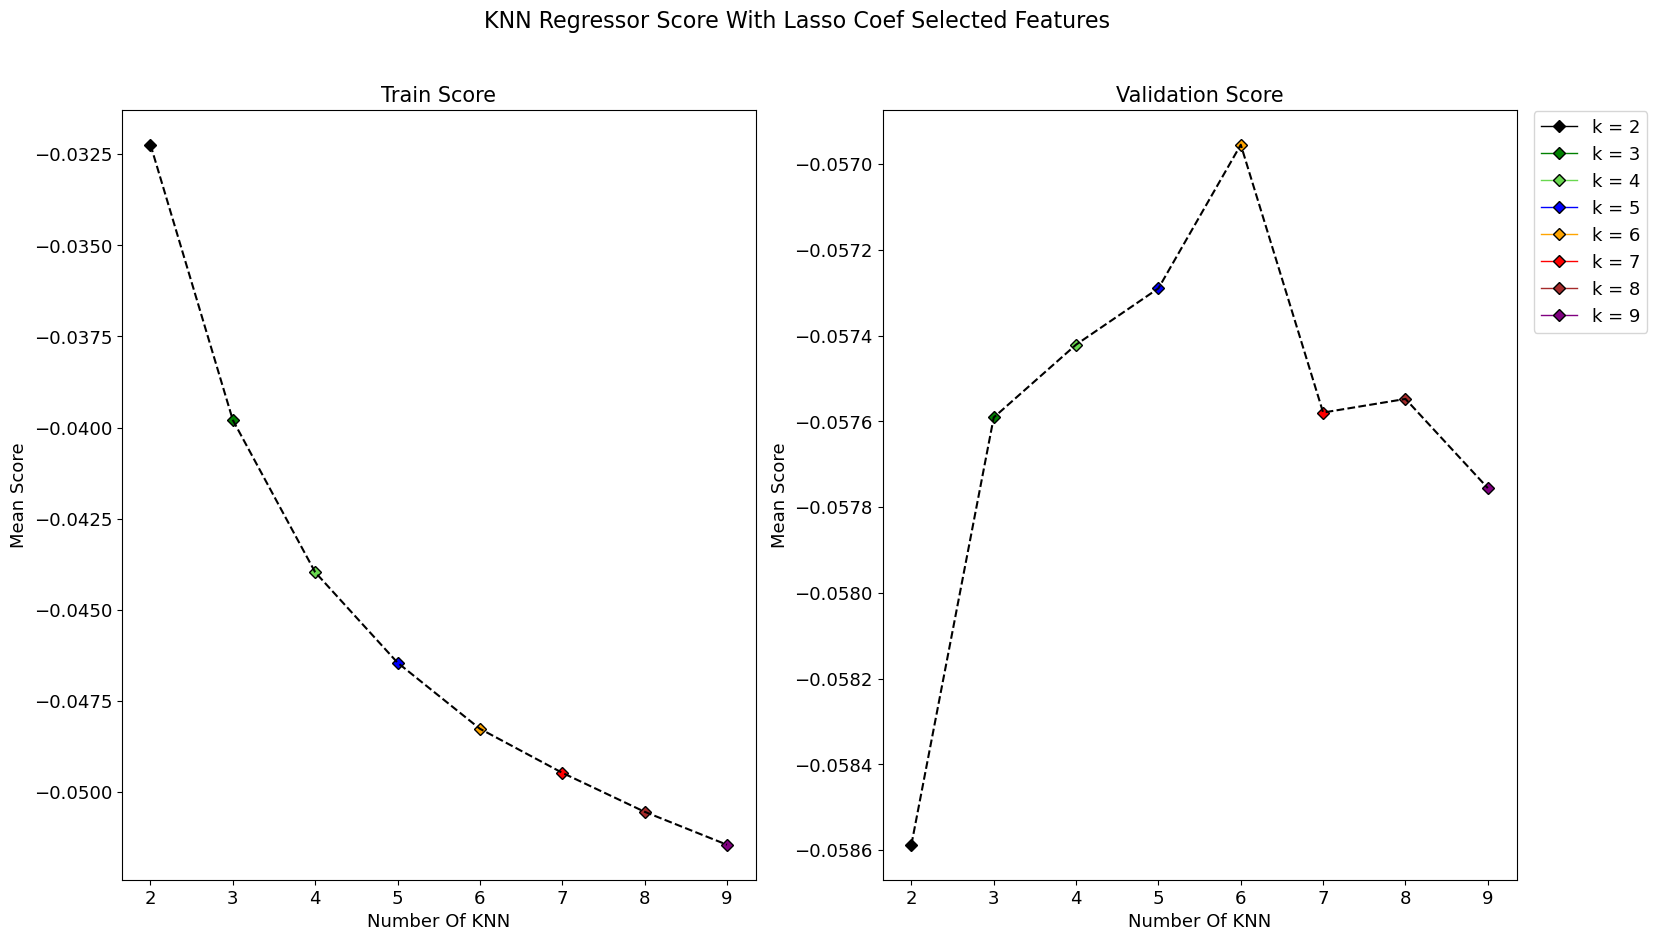

In [111]:
N_neighbors = num_neighbors

#Plot

#Make Color
lotsa_colors = colors.get_named_colors_mapping()
colors_chosen = ['black' , 'green' , 'xkcd:fresh green' , 'blue' , 'orange' , 'red' , 'brown' , 'purple' , 'xkcd:dark yellow' ,
                'xkcd:dark blue' , 'pink' , 'xkcd:dark red']
colors_plot = []
for cname in colors_chosen:
    colors_plot.append(lotsa_colors[cname])

#Figure 2
fig2 , axs = plt.subplots(1, 2, figsize=(18,10) , dpi=100)
fig2.suptitle('KNN Regressor Score With Lasso Coef Selected Features', fontsize=16)

axs[0].set_title('Train Score' ,  fontsize = 15)
axs[1].set_title('Validation Score' ,  fontsize = 15)

axs[0].set_xlabel('Number Of KNN' ,  fontsize = 13)
axs[0].set_ylabel('Mean Score' ,  fontsize = 13)


axs[1].set_xlabel('Number Of KNN' ,  fontsize = 13)
axs[1].set_ylabel('Mean Score' ,  fontsize = 13)

#Train Plot 

j = 0;
for i in N_neighbors:
    ind = knn_Results_lasso_coef.loc[knn_Results_lasso_coef['param_n_neighbors'] == i]
    axs[0].plot(ind['param_n_neighbors'],ind['mean_train_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label='k = '+str(i), linewidth= 1)
    j = j + 1
    
 
#Test Plot

j = 0;
for i in N_neighbors:
    ind = knn_Results_lasso_coef.loc[knn_Results_lasso_coef['param_n_neighbors'] == i]
    axs[1].plot(ind['param_n_neighbors'],ind['mean_test_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label='k = '+str(i), linewidth= 1, )
    j = j + 1

plt.setp(axs, xticks=N_neighbors)

axs[0].plot(N_neighbors, knn_Results_lasso_coef['mean_train_score'], 'k--')
axs[1].plot(N_neighbors, knn_Results_lasso_coef['mean_test_score'], 'k--')

axs[1].legend(bbox_to_anchor = (1.22, 1.01))
plt.rcParams.update({'font.size': 13})

#Save And Show
#plt.savefig('E:\\Machine_Learning_Paper\\KNN_Parameters_F1_Score_5Kfold.png')
plt.show()


#### SFS SVR

In [112]:
knn_Optimized_sfs_svr = GridSearchCV(knn_model , param_grid_knn, cv=kfold, verbose=3, return_train_score=True, scoring='neg_root_mean_squared_error')
knn_Optimized_sfs_svr.fit(x_train_sfs_svr,y_train_sfs_svr)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END n_neighbors=2;, score=(train=-0.026, test=-0.047) total time=   0.0s
[CV 2/5] END n_neighbors=2;, score=(train=-0.026, test=-0.047) total time=   0.0s
[CV 3/5] END n_neighbors=2;, score=(train=-0.026, test=-0.050) total time=   0.0s
[CV 4/5] END n_neighbors=2;, score=(train=-0.026, test=-0.048) total time=   0.0s
[CV 5/5] END n_neighbors=2;, score=(train=-0.026, test=-0.046) total time=   0.0s
[CV 1/5] END n_neighbors=3;, score=(train=-0.032, test=-0.045) total time=   0.0s
[CV 2/5] END n_neighbors=3;, score=(train=-0.032, test=-0.044) total time=   0.0s
[CV 3/5] END n_neighbors=3;, score=(train=-0.031, test=-0.049) total time=   0.0s
[CV 4/5] END n_neighbors=3;, score=(train=-0.031, test=-0.047) total time=   0.0s
[CV 5/5] END n_neighbors=3;, score=(train=-0.031, test=-0.044) total time=   0.0s
[CV 1/5] END n_neighbors=4;, score=(train=-0.036, test=-0.046) total time=   0.0s
[CV 2/5] END n_neighbors=4;, score=(tr

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=3)

In [113]:
knn_Results_sfs_svr = pd.DataFrame(knn_Optimized_sfs_svr.cv_results_)
Best_Val_Score_knn_sfs_svr = knn_Optimized_sfs_svr.best_score_
print(Best_Val_Score_knn_sfs_svr)
Best_Params_knn_sfs_svr = knn_Optimized_sfs_svr.best_params_
print(Best_Params_knn_sfs_svr)

-0.04567448717017153
{'n_neighbors': 4}


In [114]:
Best_Estimator_knn_sfs_svr = knn_Optimized_sfs_svr.best_estimator_
RMSE_knn_sfs_svr = root_mean_squared_error(y_test_sfs_svr,Best_Estimator_knn_sfs_svr.predict(x_test_sfs_svr))
print('KNN Regressor RMSE for SFS SVR: ', RMSE_knn_sfs_svr)

KNN Regressor RMSE for SFS SVR:  0.044043245486460915


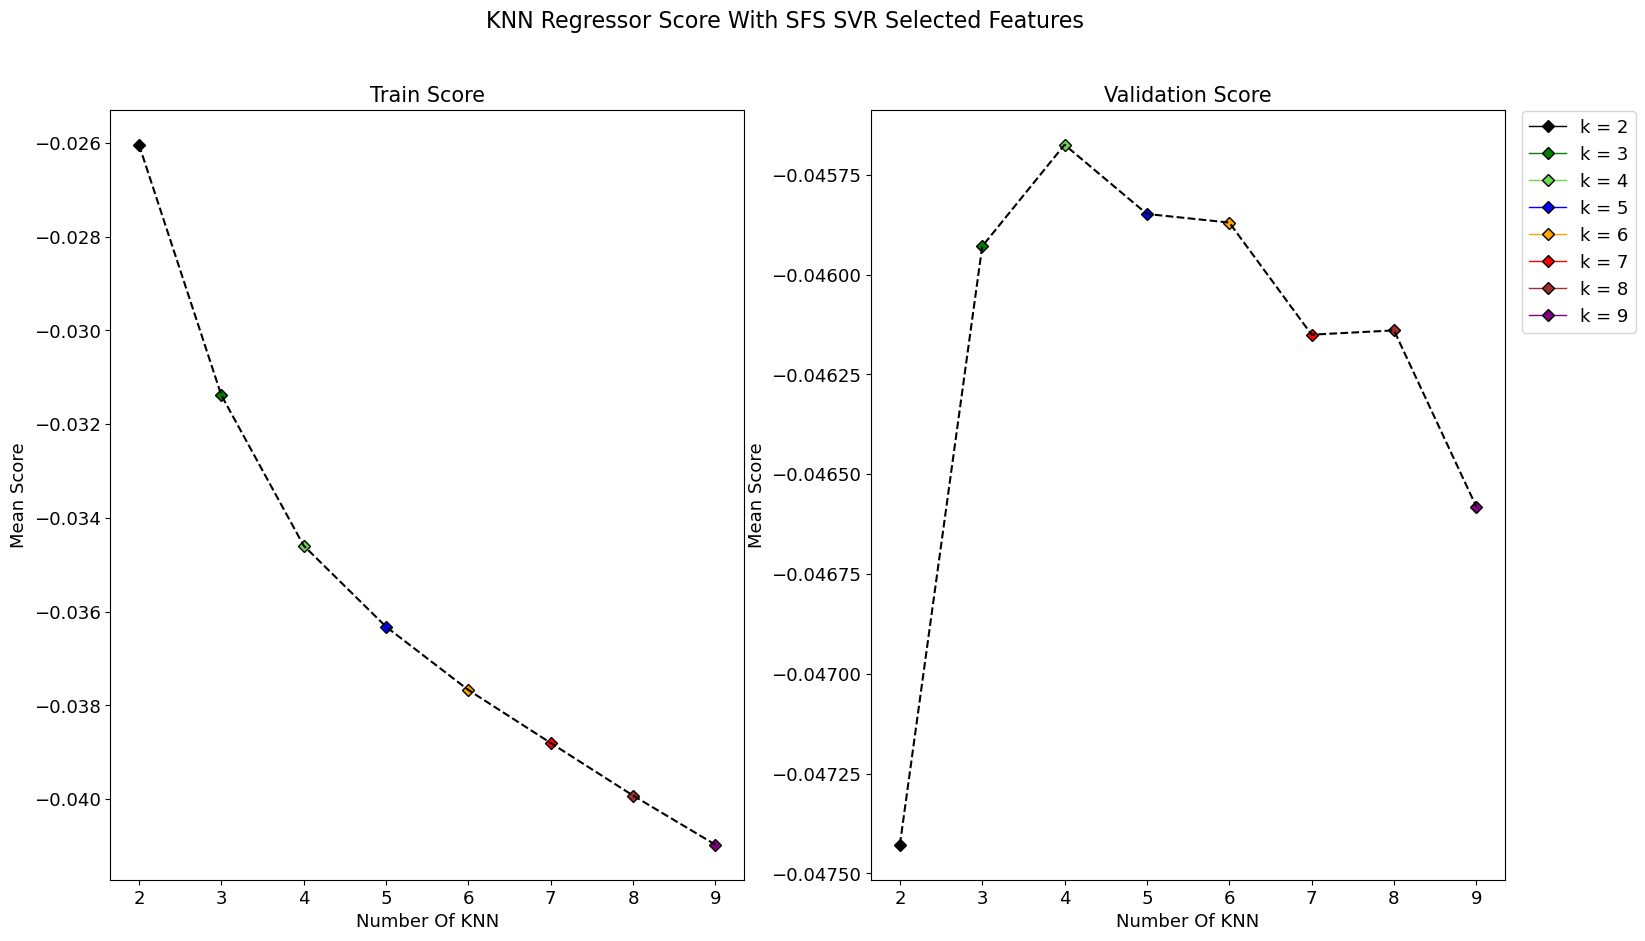

In [115]:
N_neighbors = num_neighbors

#Plot

#Make Color
lotsa_colors = colors.get_named_colors_mapping()
colors_chosen = ['black' , 'green' , 'xkcd:fresh green' , 'blue' , 'orange' , 'red' , 'brown' , 'purple' , 'xkcd:dark yellow' ,
                'xkcd:dark blue' , 'pink' , 'xkcd:dark red']
colors_plot = []
for cname in colors_chosen:
    colors_plot.append(lotsa_colors[cname])

#Figure 2
fig2 , axs = plt.subplots(1, 2, figsize=(18,10) , dpi=100)
fig2.suptitle('KNN Regressor Score With SFS SVR Selected Features', fontsize=16)

axs[0].set_title('Train Score' ,  fontsize = 15)
axs[1].set_title('Validation Score' ,  fontsize = 15)

axs[0].set_xlabel('Number Of KNN' ,  fontsize = 13)
axs[0].set_ylabel('Mean Score' ,  fontsize = 13)


axs[1].set_xlabel('Number Of KNN' ,  fontsize = 13)
axs[1].set_ylabel('Mean Score' ,  fontsize = 13)

#Train Plot 

j = 0;
for i in N_neighbors:
    ind = knn_Results_sfs_svr.loc[knn_Results_sfs_svr['param_n_neighbors'] == i]
    axs[0].plot(ind['param_n_neighbors'],ind['mean_train_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label='k = '+str(i), linewidth= 1)
    j = j + 1
    
 
#Test Plot

j = 0;
for i in N_neighbors:
    ind = knn_Results_sfs_svr.loc[knn_Results_sfs_svr['param_n_neighbors'] == i]
    axs[1].plot(ind['param_n_neighbors'],ind['mean_test_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label='k = '+str(i), linewidth= 1, )
    j = j + 1

plt.setp(axs, xticks=N_neighbors)

axs[0].plot(N_neighbors, knn_Results_sfs_svr['mean_train_score'], 'k--')
axs[1].plot(N_neighbors, knn_Results_sfs_svr['mean_test_score'], 'k--')

axs[1].legend(bbox_to_anchor = (1.22, 1.01))
plt.rcParams.update({'font.size': 13})

#Save And Show
#plt.savefig('E:\\Machine_Learning_Paper\\KNN_Parameters_F1_Score_5Kfold.png')
plt.show()


#### RF feature importance

In [116]:
knn_Optimized_RF_FI = GridSearchCV(knn_model , param_grid_knn, cv=kfold, verbose=3, return_train_score=True, scoring='neg_root_mean_squared_error')
knn_Optimized_RF_FI.fit(x_train_rf_feature_impor,y_train_rf_feature_impor)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END n_neighbors=2;, score=(train=-0.023, test=-0.040) total time=   0.0s
[CV 2/5] END n_neighbors=2;, score=(train=-0.025, test=-0.045) total time=   0.0s
[CV 3/5] END n_neighbors=2;, score=(train=-0.024, test=-0.049) total time=   0.0s
[CV 4/5] END n_neighbors=2;, score=(train=-0.023, test=-0.044) total time=   0.0s
[CV 5/5] END n_neighbors=2;, score=(train=-0.025, test=-0.046) total time=   0.0s
[CV 1/5] END n_neighbors=3;, score=(train=-0.030, test=-0.037) total time=   0.0s
[CV 2/5] END n_neighbors=3;, score=(train=-0.030, test=-0.046) total time=   0.0s
[CV 3/5] END n_neighbors=3;, score=(train=-0.028, test=-0.047) total time=   0.0s
[CV 4/5] END n_neighbors=3;, score=(train=-0.029, test=-0.042) total time=   0.0s
[CV 5/5] END n_neighbors=3;, score=(train=-0.030, test=-0.047) total time=   0.0s
[CV 1/5] END n_neighbors=4;, score=(train=-0.034, test=-0.038) total time=   0.0s
[CV 2/5] END n_neighbors=4;, score=(tr

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=3)

In [117]:
knn_Results_RF_FI = pd.DataFrame(knn_Optimized_RF_FI.cv_results_)
Best_Val_Score_knn_RF_FI = knn_Optimized_RF_FI.best_score_
print(Best_Val_Score_knn_RF_FI)
Best_Params_knn_RF_FI = knn_Optimized_RF_FI.best_params_
print(Best_Params_knn_RF_FI)

-0.042397807407808
{'n_neighbors': 9}


In [118]:
Best_Estimator_knn_RF_FI = knn_Optimized_RF_FI.best_estimator_
RMSE_knn_RF_FI = root_mean_squared_error(y_test_rf_feature_impor,Best_Estimator_knn_RF_FI.predict(x_test_rf_feature_impor))
print('KNN Regressor RMSE for RF_FI: ', RMSE_knn_RF_FI)

KNN Regressor RMSE for RF_FI:  0.04302548159476669


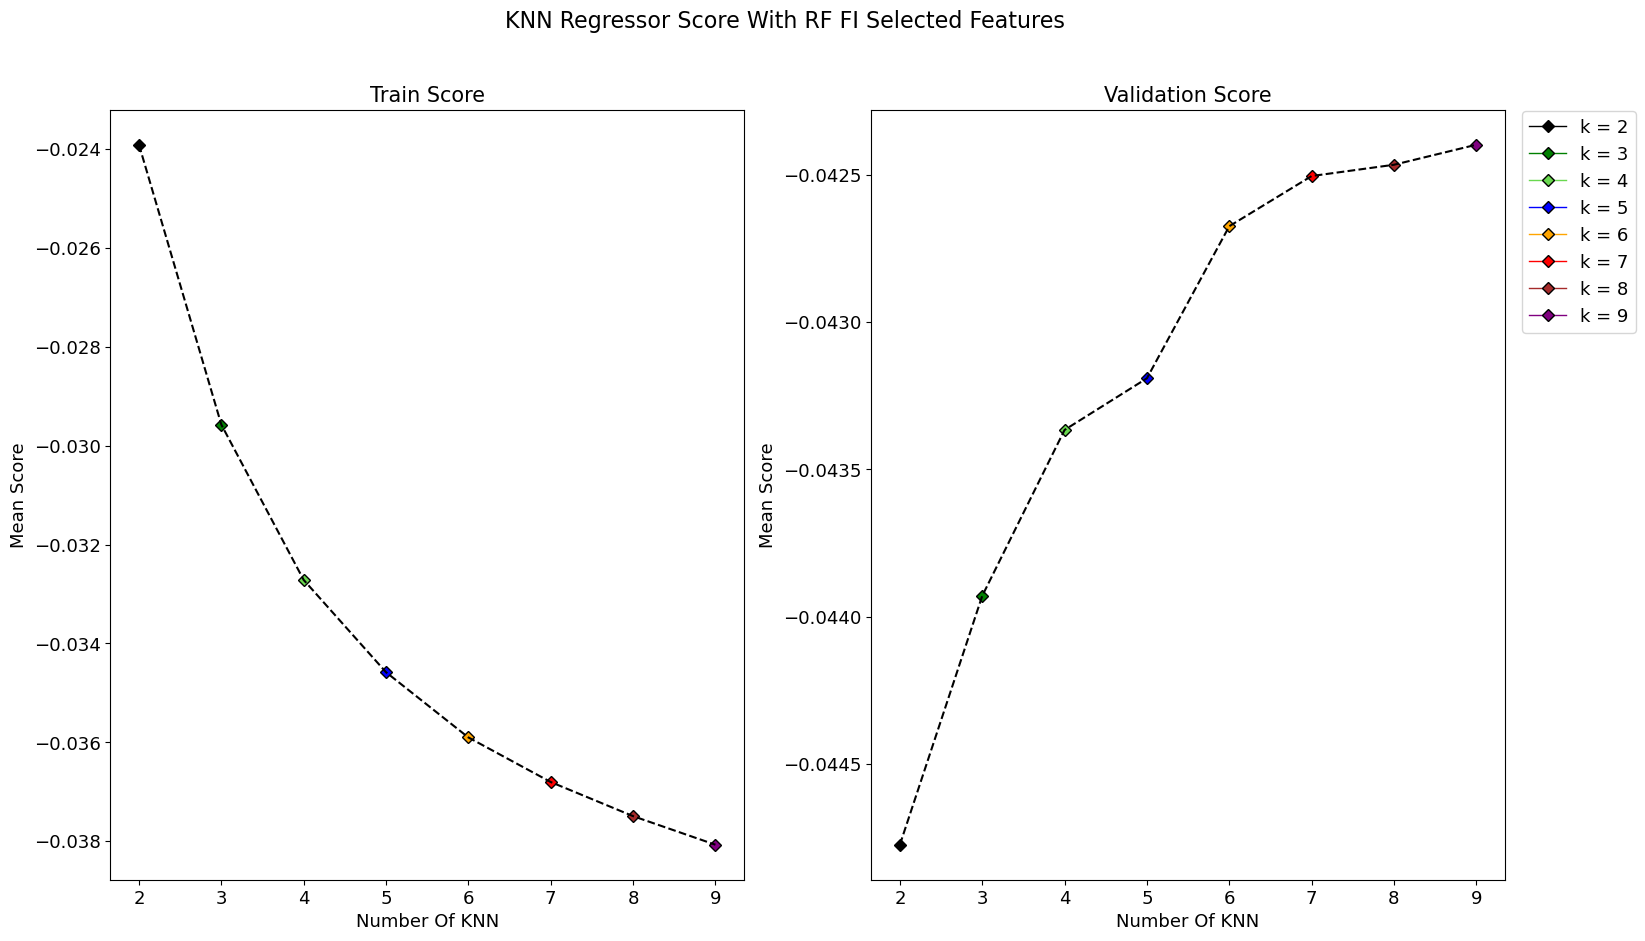

In [119]:
N_neighbors = num_neighbors

#Plot

#Make Color
lotsa_colors = colors.get_named_colors_mapping()
colors_chosen = ['black' , 'green' , 'xkcd:fresh green' , 'blue' , 'orange' , 'red' , 'brown' , 'purple' , 'xkcd:dark yellow' ,
                'xkcd:dark blue' , 'pink' , 'xkcd:dark red']
colors_plot = []
for cname in colors_chosen:
    colors_plot.append(lotsa_colors[cname])

#Figure 2
fig2 , axs = plt.subplots(1, 2, figsize=(18,10) , dpi=100)
fig2.suptitle('KNN Regressor Score With RF FI Selected Features', fontsize=16)

axs[0].set_title('Train Score' ,  fontsize = 15)
axs[1].set_title('Validation Score' ,  fontsize = 15)

axs[0].set_xlabel('Number Of KNN' ,  fontsize = 13)
axs[0].set_ylabel('Mean Score' ,  fontsize = 13)


axs[1].set_xlabel('Number Of KNN' ,  fontsize = 13)
axs[1].set_ylabel('Mean Score' ,  fontsize = 13)

#Train Plot 

j = 0;
for i in N_neighbors:
    ind = knn_Results_RF_FI.loc[knn_Results_RF_FI['param_n_neighbors'] == i]
    axs[0].plot(ind['param_n_neighbors'],ind['mean_train_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label='k = '+str(i), linewidth= 1)
    j = j + 1
    
 
#Test Plot

j = 0;
for i in N_neighbors:
    ind = knn_Results_RF_FI.loc[knn_Results_RF_FI['param_n_neighbors'] == i]
    axs[1].plot(ind['param_n_neighbors'],ind['mean_test_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label='k = '+str(i), linewidth= 1)
    j = j + 1

plt.setp(axs, xticks=N_neighbors)

axs[0].plot(N_neighbors, knn_Results_RF_FI['mean_train_score'], 'k--')
axs[1].plot(N_neighbors, knn_Results_RF_FI['mean_test_score'], 'k--')

axs[1].legend(bbox_to_anchor = (1.22, 1.01))
plt.rcParams.update({'font.size': 13})
#Save And Show
#plt.savefig('E:\\Machine_Learning_Paper\\KNN_Parameters_F1_Score_5Kfold.png')
plt.show()


#### Original Data

In [120]:
knn_Optimized_Original_Data = GridSearchCV(knn_model , param_grid_knn, cv=kfold, verbose=3, return_train_score=True, scoring='neg_root_mean_squared_error')
knn_Optimized_Original_Data.fit(x_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END n_neighbors=2;, score=(train=-0.034, test=-0.055) total time=   0.0s
[CV 2/5] END n_neighbors=2;, score=(train=-0.033, test=-0.060) total time=   0.0s
[CV 3/5] END n_neighbors=2;, score=(train=-0.031, test=-0.068) total time=   0.0s
[CV 4/5] END n_neighbors=2;, score=(train=-0.033, test=-0.054) total time=   0.0s
[CV 5/5] END n_neighbors=2;, score=(train=-0.033, test=-0.058) total time=   0.0s
[CV 1/5] END n_neighbors=3;, score=(train=-0.041, test=-0.055) total time=   0.0s
[CV 2/5] END n_neighbors=3;, score=(train=-0.039, test=-0.059) total time=   0.0s
[CV 3/5] END n_neighbors=3;, score=(train=-0.037, test=-0.066) total time=   0.0s
[CV 4/5] END n_neighbors=3;, score=(train=-0.041, test=-0.052) total time=   0.0s
[CV 5/5] END n_neighbors=3;, score=(train=-0.041, test=-0.054) total time=   0.0s
[CV 1/5] END n_neighbors=4;, score=(train=-0.045, test=-0.054) total time=   0.0s
[CV 2/5] END n_neighbors=4;, score=(tr

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=3)

In [121]:
knn_Results_Original_Data = pd.DataFrame(knn_Optimized_Original_Data.cv_results_)
Best_Val_Score_knn_Original_Data = knn_Optimized_Original_Data.best_score_
print(Best_Val_Score_knn_Original_Data)
Best_Params_knn_Original_Data = knn_Optimized_Original_Data.best_params_
print(Best_Params_knn_Original_Data)

-0.05537096708027913
{'n_neighbors': 7}


In [122]:
Best_Estimator_knn_Original_Data = knn_Optimized_Original_Data.best_estimator_
RMSE_knn_Original_Data = root_mean_squared_error(y_test,Best_Estimator_knn_Original_Data.predict(x_test))
print('KNN Regressor RMSE for Original Data: ', RMSE_knn_Original_Data)

KNN Regressor RMSE for Original Data:  0.056313613598738495


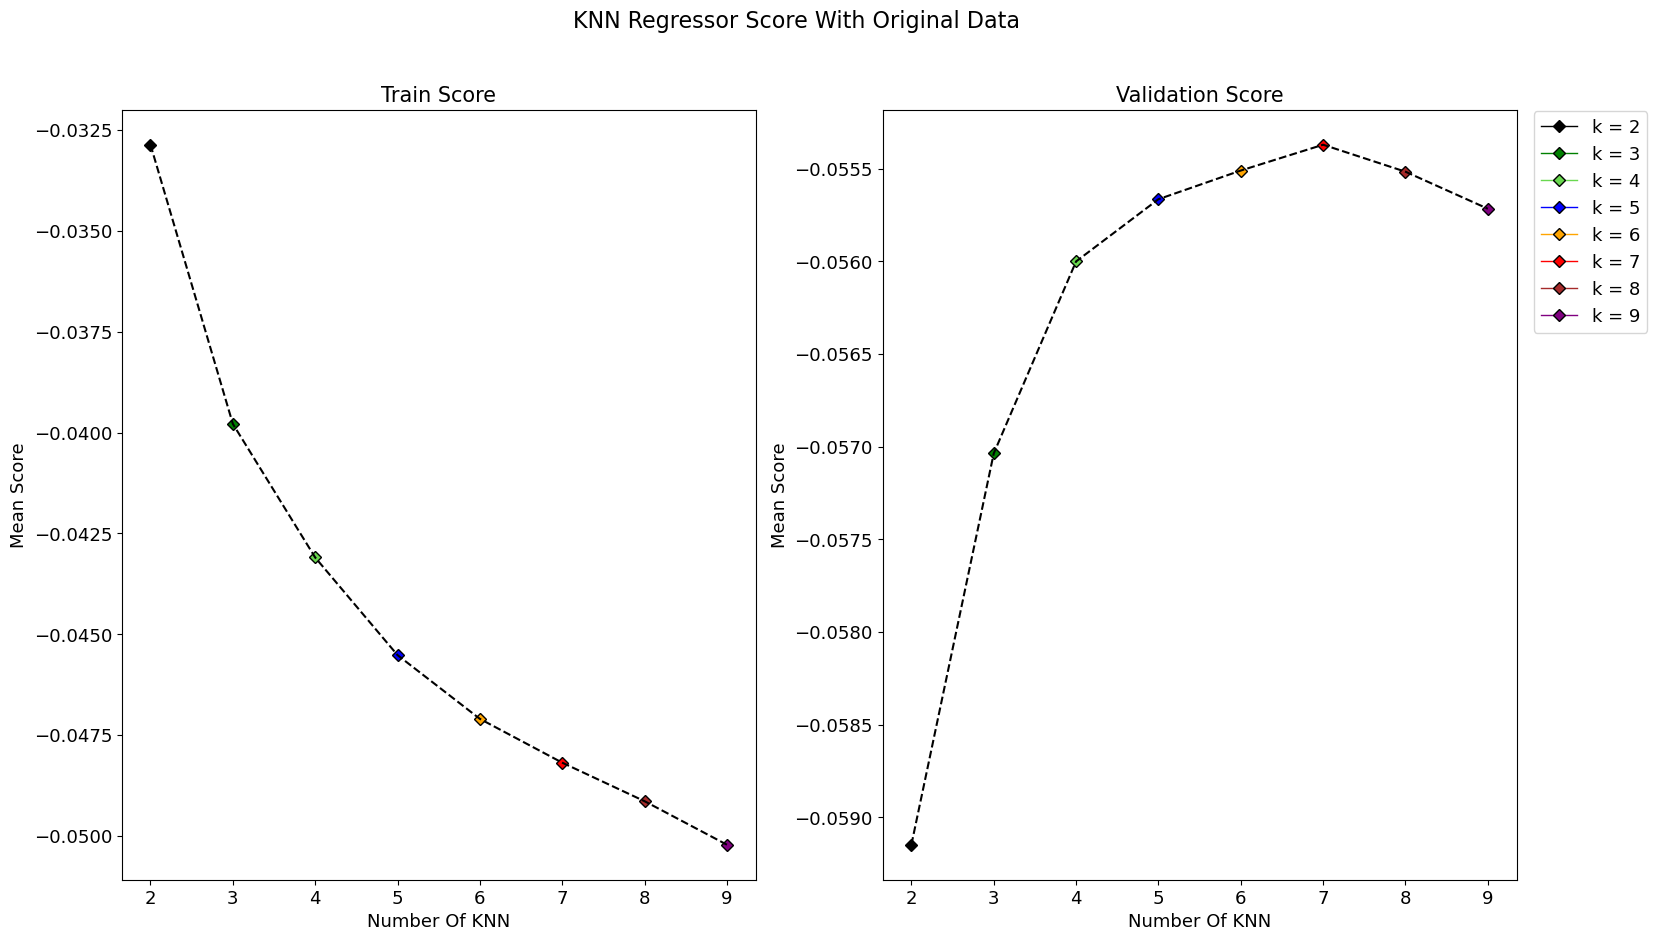

In [123]:
N_neighbors = num_neighbors

#Plot

#Make Color
lotsa_colors = colors.get_named_colors_mapping()
colors_chosen = ['black' , 'green' , 'xkcd:fresh green' , 'blue' , 'orange' , 'red' , 'brown' , 'purple' , 'xkcd:dark yellow' ,
                'xkcd:dark blue' , 'pink' , 'xkcd:dark red']
colors_plot = []
for cname in colors_chosen:
    colors_plot.append(lotsa_colors[cname])

#Figure 2
fig2 , axs = plt.subplots(1, 2, figsize=(18,10) , dpi=100)
fig2.suptitle('KNN Regressor Score With Original Data', fontsize=16)

axs[0].set_title('Train Score' ,  fontsize = 15)
axs[1].set_title('Validation Score' ,  fontsize = 15)

axs[0].set_xlabel('Number Of KNN' ,  fontsize = 13)
axs[0].set_ylabel('Mean Score' ,  fontsize = 13)


axs[1].set_xlabel('Number Of KNN' ,  fontsize = 13)
axs[1].set_ylabel('Mean Score' ,  fontsize = 13)

#Train Plot 

j = 0;
for i in N_neighbors:
    ind = knn_Results_Original_Data.loc[knn_Results_Original_Data['param_n_neighbors'] == i]
    axs[0].plot(ind['param_n_neighbors'],ind['mean_train_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label='k = '+str(i), linewidth= 1)
    j = j + 1
    
 
#Test Plot

j = 0;
for i in N_neighbors:
    ind = knn_Results_Original_Data.loc[knn_Results_Original_Data['param_n_neighbors'] == i]
    axs[1].plot(ind['param_n_neighbors'],ind['mean_test_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label='k = '+str(i), linewidth= 1)
    j = j + 1

plt.setp(axs, xticks=N_neighbors)

axs[0].plot(N_neighbors, knn_Results_Original_Data['mean_train_score'], 'k--')
axs[1].plot(N_neighbors, knn_Results_Original_Data['mean_test_score'], 'k--')

axs[1].legend(bbox_to_anchor = (1.22, 1.01))
plt.rcParams.update({'font.size': 13})
#Save And Show
#plt.savefig('E:\\Machine_Learning_Paper\\KNN_Parameters_F1_Score_5Kfold.png')
plt.show()


In [124]:
Information_df['N Neighbors'] = [Best_Params_knn_RF_rfecv['n_neighbors'],Best_Params_knn_lasso_coef['n_neighbors'],Best_Params_knn_sfs_svr['n_neighbors'], Best_Params_knn_RF_FI['n_neighbors'], Best_Params_knn_Original_Data['n_neighbors']]
Information_df['Best Val Score KNN'] = [Best_Val_Score_knn_RF_rfecv,Best_Val_Score_knn_lasso_coef,Best_Val_Score_knn_sfs_svr,Best_Val_Score_knn_RF_FI,Best_Val_Score_knn_Original_Data]
Information_df['Test RMSE KNN'] = [RMSE_knn_RF_rfecv, RMSE_knn_lasso_coef, RMSE_knn_sfs_svr, RMSE_knn_RF_FI, RMSE_knn_Original_Data]
Information_df

Name                                           Features  \
0               RF RFECV  [[Overall Qual, Overall Cond, House Age, Resto...   
1             Lasso Coef  [[Overall Qual, Overall Cond, Bsmt Full Bath, ...   
2                SFS SVR  [[Overall Qual, Overall Cond, Bsmt Full Bath, ...   
3  RF Feature Importance  [[Overall Qual, House Age, Full Bath, Garage C...   
4          Original Data  [[Overall Qual, Overall Cond, House Age, Resto...   

   Num Of Features  Alpha_Ridge  Degree_Ridge  Best Val Score Ridge  \
0               55        100.0             3             -0.037490   
1               62        100.0             3             -0.036471   
2               31          1.0             3             -0.033072   
3               11          1.0             3             -0.038526   
4              258         50.0             2             -0.037329   

   Test RMSE Ridge  C_SVM_Poly  Degree_SVM_Poly  Best Val Score SVM Poly  \
0         0.032138       0.050                4                -0.049421   
1         0.034622       0.500                1                -0.048319   
2         0.031347       0.100                4                -0.040443   
3         0.039989       0.005                4                -0.045079   
4         0.033878       1.000                2                -0.052098   

   Test RMSE SVM Poly  C_SVM_RBF Gamma_SVM_RBF  Best Val Score SVM RBF  \
0            0.044457        1.0          auto               -0.051588   
1            0.048358        1.0          auto               -0.051588   
2            0.036948        1.0         scale               -0.042516   
3            0.047379        0.5           0.5               -0.046367   
4            0.051095        1.0         scale               -0.057380   

   Test RMSE SVM RBF  N Neighbors  Best Val Score KNN  Test RMSE KNN  
0           0.050821            7           -0.054863       0.054110  
1           0.048408            6           -0.056955       0.057393  
2           0.041376            4           -0.045674       0.044043  
3           0.043693            9           -0.042398       0.043025  
4           0.057622            7           -0.055371       0.056314

In [125]:
Model_Final_Results['Best Val Score KNN'] = [Best_Val_Score_knn_RF_rfecv,Best_Val_Score_knn_lasso_coef,Best_Val_Score_knn_sfs_svr,Best_Val_Score_knn_RF_FI,Best_Val_Score_knn_Original_Data]
Model_Final_Results['Test RMSE KNN'] = [RMSE_knn_RF_rfecv, RMSE_knn_lasso_coef, RMSE_knn_sfs_svr, RMSE_knn_RF_FI, RMSE_knn_Original_Data]
Model_Final_Results

Name  Num Of Features  Best Val Score Ridge  \
0               RF RFECV               55             -0.037490   
1             Lasso Coef               62             -0.036471   
2                SFS SVR               31             -0.033072   
3  RF Feature Importance               11             -0.038526   
4          Original Data              258             -0.037329   

   Test RMSE Ridge  Best Val Score SVM Poly  Test RMSE SVM Poly  \
0         0.032138                -0.049421            0.044457   
1         0.034622                -0.048319            0.048358   
2         0.031347                -0.040443            0.036948   
3         0.039989                -0.045079            0.047379   
4         0.033878                -0.052098            0.051095   

   Best Val Score SVM RBF  Test RMSE SVM RBF  Best Val Score KNN  \
0               -0.051588           0.050821           -0.054863   
1               -0.051588           0.048408           -0.056955   
2               -0.042516           0.041376           -0.045674   
3               -0.046367           0.043693           -0.042398   
4               -0.057380           0.057622           -0.055371   

   Test RMSE KNN  
0       0.054110  
1       0.057393  
2       0.044043  
3       0.043025  
4       0.056314

# Random Forest Regressor

In [128]:
RF_model = RandomForestRegressor(criterion = 'squared_error')

n_estimators_RF = np.arange(start=10, stop=101, step=20)
R_S = np.arange(start=0, stop=50, step=10)

param_grid_RF = {
    'n_estimators':n_estimators_RF,
    'random_state':R_S,
    'min_samples_split':[0.05,0.01],
    'max_depth':[9,12,15]
}

#### RF rfecv

In [129]:
RF_Optimized_RF_rfecv = GridSearchCV(RF_model , param_grid_RF, cv=kfold, verbose=3, return_train_score=True, scoring='neg_root_mean_squared_error')
RF_Optimized_RF_rfecv.fit(x_train_UnNor_RF_rfecv,column_or_1d(y_train_RF_rfecv))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV 1/5] END max_depth=9, min_samples_split=0.05, n_estimators=10, random_state=0;, score=(train=-0.042, test=-0.040) total time=   0.0s
[CV 2/5] END max_depth=9, min_samples_split=0.05, n_estimators=10, random_state=0;, score=(train=-0.042, test=-0.048) total time=   0.0s
[CV 3/5] END max_depth=9, min_samples_split=0.05, n_estimators=10, random_state=0;, score=(train=-0.039, test=-0.052) total time=   0.0s
[CV 4/5] END max_depth=9, min_samples_split=0.05, n_estimators=10, random_state=0;, score=(train=-0.042, test=-0.048) total time=   0.0s
[CV 5/5] END max_depth=9, min_samples_split=0.05, n_estimators=10, random_state=0;, score=(train=-0.041, test=-0.041) total time=   0.0s
[CV 1/5] END max_depth=9, min_samples_split=0.05, n_estimators=10, random_state=10;, score=(train=-0.043, test=-0.040) total time=   0.0s
[CV 2/5] END max_depth=9, min_samples_split=0.05, n_estimators=10, random_state=10;, score=(train=-0.042, test=-0.

c:\Users\sinas\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [9, 12, 15],
                         'min_samples_split': [0.05, 0.01],
                         'n_estimators': array([10, 30, 50, 70, 90]),
                         'random_state': array([ 0, 10, 20, 30, 40])},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=3)

In [130]:
RF_Results_RF_rfecv = pd.DataFrame(RF_Optimized_RF_rfecv.cv_results_)
Best_Val_Score_RF_RF_rfecv = RF_Optimized_RF_rfecv.best_score_
print(Best_Val_Score_RF_RF_rfecv)
Best_Params_RF_RF_rfecv = RF_Optimized_RF_rfecv.best_params_
print(Best_Params_RF_RF_rfecv)

-0.03749359713582288
{'max_depth': 15, 'min_samples_split': 0.01, 'n_estimators': 50, 'random_state': 30}


In [131]:
Best_Estimator_RF_RF_rfecv = RF_Optimized_RF_rfecv.best_estimator_
RMSE_RF_RF_rfecv = root_mean_squared_error(y_test_RF_rfecv,Best_Estimator_RF_RF_rfecv.predict(x_test_UnNor_RF_rfecv))
print('RF Regressor RMSE for RF_rfecv: ', RMSE_RF_RF_rfecv)

RF Regressor RMSE for RF_rfecv:  0.03526333199840155


#### Lasso Coef

In [132]:
RF_Optimized_lasso_coef = GridSearchCV(RF_model , param_grid_RF, cv=kfold, verbose=3, return_train_score=True, scoring='neg_root_mean_squared_error')
RF_Optimized_lasso_coef.fit(x_train_UnNor_lasso,column_or_1d(y_train_lasso))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV 1/5] END max_depth=9, min_samples_split=0.05, n_estimators=10, random_state=0;, score=(train=-0.042, test=-0.040) total time=   0.0s
[CV 2/5] END max_depth=9, min_samples_split=0.05, n_estimators=10, random_state=0;, score=(train=-0.042, test=-0.048) total time=   0.0s
[CV 3/5] END max_depth=9, min_samples_split=0.05, n_estimators=10, random_state=0;, score=(train=-0.040, test=-0.053) total time=   0.0s
[CV 4/5] END max_depth=9, min_samples_split=0.05, n_estimators=10, random_state=0;, score=(train=-0.043, test=-0.048) total time=   0.0s
[CV 5/5] END max_depth=9, min_samples_split=0.05, n_estimators=10, random_state=0;, score=(train=-0.042, test=-0.042) total time=   0.0s
[CV 1/5] END max_depth=9, min_samples_split=0.05, n_estimators=10, random_state=10;, score=(train=-0.044, test=-0.041) total time=   0.0s
[CV 2/5] END max_depth=9, min_samples_split=0.05, n_estimators=10, random_state=10;, score=(train=-0.042, test=-0.

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [9, 12, 15],
                         'min_samples_split': [0.05, 0.01],
                         'n_estimators': array([10, 30, 50, 70, 90]),
                         'random_state': array([ 0, 10, 20, 30, 40])},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=3)

In [133]:
RF_Results_lasso_coef = pd.DataFrame(RF_Optimized_lasso_coef.cv_results_)
Best_Val_Score_RF_lasso_coef = RF_Optimized_lasso_coef.best_score_
print(Best_Val_Score_RF_lasso_coef)
Best_Params_RF_lasso_coef = RF_Optimized_lasso_coef.best_params_
print(Best_Params_RF_lasso_coef)

-0.03775146565135602
{'max_depth': 15, 'min_samples_split': 0.01, 'n_estimators': 70, 'random_state': 40}


In [134]:
Best_Estimator_RF_lasso_coef = RF_Optimized_lasso_coef.best_estimator_
RMSE_RF_lasso_coef = root_mean_squared_error(y_test_lasso,Best_Estimator_RF_lasso_coef.predict(x_test_UnNor_lasso))
print('RF Regressor RMSE for lasso_coef: ', RMSE_RF_lasso_coef)

RF Regressor RMSE for lasso_coef:  0.03517991589030673


#### SFS SVR

In [135]:
RF_Optimized_sfs_svr = GridSearchCV(RF_model , param_grid_RF, cv=kfold, verbose=3, return_train_score=True, scoring='neg_root_mean_squared_error')
RF_Optimized_sfs_svr.fit(x_train_UnNor_sfs_svr,column_or_1d(y_train_sfs_svr))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV 1/5] END max_depth=9, min_samples_split=0.05, n_estimators=10, random_state=0;, score=(train=-0.044, test=-0.042) total time=   0.0s
[CV 2/5] END max_depth=9, min_samples_split=0.05, n_estimators=10, random_state=0;, score=(train=-0.045, test=-0.049) total time=   0.0s
[CV 3/5] END max_depth=9, min_samples_split=0.05, n_estimators=10, random_state=0;, score=(train=-0.041, test=-0.055) total time=   0.0s
[CV 4/5] END max_depth=9, min_samples_split=0.05, n_estimators=10, random_state=0;, score=(train=-0.045, test=-0.048) total time=   0.0s
[CV 5/5] END max_depth=9, min_samples_split=0.05, n_estimators=10, random_state=0;, score=(train=-0.044, test=-0.044) total time=   0.0s
[CV 1/5] END max_depth=9, min_samples_split=0.05, n_estimators=10, random_state=10;, score=(train=-0.044, test=-0.042) total time=   0.0s
[CV 2/5] END max_depth=9, min_samples_split=0.05, n_estimators=10, random_state=10;, score=(train=-0.043, test=-0.

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [9, 12, 15],
                         'min_samples_split': [0.05, 0.01],
                         'n_estimators': array([10, 30, 50, 70, 90]),
                         'random_state': array([ 0, 10, 20, 30, 40])},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=3)

In [136]:
RF_Results_sfs_svr = pd.DataFrame(RF_Optimized_sfs_svr.cv_results_)
Best_Val_Score_RF_sfs_svr = RF_Optimized_sfs_svr.best_score_
print(Best_Val_Score_RF_sfs_svr)
Best_Params_RF_sfs_svr = RF_Optimized_sfs_svr.best_params_
print(Best_Params_RF_sfs_svr)

-0.039086850897066185
{'max_depth': 15, 'min_samples_split': 0.01, 'n_estimators': 90, 'random_state': 0}


In [137]:
Best_Estimator_RF_sfs_svr = RF_Optimized_sfs_svr.best_estimator_
RMSE_RF_sfs_svr = root_mean_squared_error(y_test_sfs_svr,Best_Estimator_RF_sfs_svr.predict(x_test_UnNor_sfs_svr))
print('RF Regressor RMSE for sfs_svr: ', RMSE_RF_sfs_svr)

RF Regressor RMSE for sfs_svr:  0.036651078270374046


#### RF feature importance

In [138]:
RF_Optimized_RF_FI = GridSearchCV(RF_model , param_grid_RF, cv=kfold, verbose=3, return_train_score=True, scoring='neg_root_mean_squared_error')
RF_Optimized_RF_FI.fit(x_train_UnNor_rf_feature_impor,column_or_1d(y_train_rf_feature_impor))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV 1/5] END max_depth=9, min_samples_split=0.05, n_estimators=10, random_state=0;, score=(train=-0.043, test=-0.040) total time=   0.0s
[CV 2/5] END max_depth=9, min_samples_split=0.05, n_estimators=10, random_state=0;, score=(train=-0.044, test=-0.049) total time=   0.0s
[CV 3/5] END max_depth=9, min_samples_split=0.05, n_estimators=10, random_state=0;, score=(train=-0.040, test=-0.053) total time=   0.0s
[CV 4/5] END max_depth=9, min_samples_split=0.05, n_estimators=10, random_state=0;, score=(train=-0.043, test=-0.046) total time=   0.0s
[CV 5/5] END max_depth=9, min_samples_split=0.05, n_estimators=10, random_state=0;, score=(train=-0.042, test=-0.043) total time=   0.0s
[CV 1/5] END max_depth=9, min_samples_split=0.05, n_estimators=10, random_state=10;, score=(train=-0.044, test=-0.040) total time=   0.0s
[CV 2/5] END max_depth=9, min_samples_split=0.05, n_estimators=10, random_state=10;, score=(train=-0.042, test=-0.

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [9, 12, 15],
                         'min_samples_split': [0.05, 0.01],
                         'n_estimators': array([10, 30, 50, 70, 90]),
                         'random_state': array([ 0, 10, 20, 30, 40])},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=3)

In [139]:
RF_Results_RF_FI = pd.DataFrame(RF_Optimized_RF_FI.cv_results_)
Best_Val_Score_RF_RF_FI = RF_Optimized_RF_FI.best_score_
print(Best_Val_Score_RF_RF_FI)
Best_Params_RF_RF_FI = RF_Optimized_RF_FI.best_params_
print(Best_Params_RF_RF_FI)

-0.03897327803543828
{'max_depth': 15, 'min_samples_split': 0.01, 'n_estimators': 90, 'random_state': 0}


In [140]:
Best_Estimator_RF_RF_FI = RF_Optimized_RF_FI.best_estimator_
RMSE_RF_RF_FI = root_mean_squared_error(y_test_rf_feature_impor,Best_Estimator_RF_RF_FI.predict(x_test_UnNor_rf_feature_impor))
print('RF Regressor RMSE for RF_FI: ', RMSE_RF_RF_FI)

RF Regressor RMSE for RF_FI:  0.03735444380325887


#### Original Data

In [141]:
RF_Optimized_Original_Data = GridSearchCV(RF_model , param_grid_RF, cv=kfold, verbose=3, return_train_score=True, scoring='neg_root_mean_squared_error')
RF_Optimized_Original_Data.fit(x_train_UnNor,column_or_1d(y_train))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV 1/5] END max_depth=9, min_samples_split=0.05, n_estimators=10, random_state=0;, score=(train=-0.042, test=-0.039) total time=   0.1s
[CV 2/5] END max_depth=9, min_samples_split=0.05, n_estimators=10, random_state=0;, score=(train=-0.042, test=-0.048) total time=   0.1s
[CV 3/5] END max_depth=9, min_samples_split=0.05, n_estimators=10, random_state=0;, score=(train=-0.039, test=-0.052) total time=   0.1s
[CV 4/5] END max_depth=9, min_samples_split=0.05, n_estimators=10, random_state=0;, score=(train=-0.042, test=-0.048) total time=   0.1s
[CV 5/5] END max_depth=9, min_samples_split=0.05, n_estimators=10, random_state=0;, score=(train=-0.041, test=-0.041) total time=   0.1s
[CV 1/5] END max_depth=9, min_samples_split=0.05, n_estimators=10, random_state=10;, score=(train=-0.043, test=-0.040) total time=   0.1s
[CV 2/5] END max_depth=9, min_samples_split=0.05, n_estimators=10, random_state=10;, score=(train=-0.042, test=-0.

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [9, 12, 15],
                         'min_samples_split': [0.05, 0.01],
                         'n_estimators': array([10, 30, 50, 70, 90]),
                         'random_state': array([ 0, 10, 20, 30, 40])},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=3)

In [142]:
RF_Results_Original_Data = pd.DataFrame(RF_Optimized_Original_Data.cv_results_)
Best_Val_Score_RF_Original_Data = RF_Optimized_Original_Data.best_score_
print(Best_Val_Score_RF_Original_Data)
Best_Params_RF_Original_Data = RF_Optimized_Original_Data.best_params_
print(Best_Params_RF_Original_Data)

-0.03777528741134382
{'max_depth': 12, 'min_samples_split': 0.01, 'n_estimators': 70, 'random_state': 40}


In [143]:
Best_Estimator_RF_Original_Data = RF_Optimized_Original_Data.best_estimator_
RMSE_RF_Original_Data = root_mean_squared_error(y_test,Best_Estimator_RF_Original_Data.predict(x_test_UnNor))
print('RF Regressor RMSE for Original_Data: ', RMSE_RF_Original_Data)

RF Regressor RMSE for Original_Data:  0.03526211665866564


In [144]:
Information_df['N Estimators'] = [Best_Params_RF_RF_rfecv['n_estimators'],Best_Params_RF_lasso_coef['n_estimators'],Best_Params_RF_sfs_svr['n_estimators'], Best_Params_RF_RF_FI['n_estimators'], Best_Params_RF_Original_Data['n_estimators']]
Information_df['Random State'] = [Best_Params_RF_RF_rfecv['random_state'],Best_Params_RF_lasso_coef['random_state'],Best_Params_RF_sfs_svr['random_state'], Best_Params_RF_RF_FI['random_state'], Best_Params_RF_Original_Data['random_state']]
Information_df['min samples split'] = [Best_Params_RF_RF_rfecv['min_samples_split'],Best_Params_RF_lasso_coef['min_samples_split'],Best_Params_RF_sfs_svr['min_samples_split'], Best_Params_RF_RF_FI['min_samples_split'], Best_Params_RF_Original_Data['min_samples_split']]
Information_df['max_depth'] = [Best_Params_RF_RF_rfecv['max_depth'],Best_Params_RF_lasso_coef['max_depth'],Best_Params_RF_sfs_svr['max_depth'], Best_Params_RF_RF_FI['max_depth'], Best_Params_RF_Original_Data['max_depth']]
Information_df['Best Val Score RF'] = [Best_Val_Score_RF_RF_rfecv,Best_Val_Score_RF_lasso_coef,Best_Val_Score_RF_sfs_svr,Best_Val_Score_RF_RF_FI,Best_Val_Score_RF_Original_Data]
Information_df['Test RMSE RF'] = [RMSE_RF_RF_rfecv, RMSE_RF_lasso_coef, RMSE_RF_sfs_svr, RMSE_RF_RF_FI, RMSE_RF_Original_Data]
Information_df

Name                                           Features  \
0               RF RFECV  [[Overall Qual, Overall Cond, House Age, Resto...   
1             Lasso Coef  [[Overall Qual, Overall Cond, Bsmt Full Bath, ...   
2                SFS SVR  [[Overall Qual, Overall Cond, Bsmt Full Bath, ...   
3  RF Feature Importance  [[Overall Qual, House Age, Full Bath, Garage C...   
4          Original Data  [[Overall Qual, Overall Cond, House Age, Resto...   

   Num Of Features  Alpha_Ridge  Degree_Ridge  Best Val Score Ridge  \
0               55        100.0             3             -0.037490   
1               62        100.0             3             -0.036471   
2               31          1.0             3             -0.033072   
3               11          1.0             3             -0.038526   
4              258         50.0             2             -0.037329   

   Test RMSE Ridge  C_SVM_Poly  Degree_SVM_Poly  Best Val Score SVM Poly  ...  \
0         0.032138       0.050                4                -0.049421  ...   
1         0.034622       0.500                1                -0.048319  ...   
2         0.031347       0.100                4                -0.040443  ...   
3         0.039989       0.005                4                -0.045079  ...   
4         0.033878       1.000                2                -0.052098  ...   

   Test RMSE SVM RBF  N Neighbors Best Val Score KNN  Test RMSE KNN  \
0           0.050821            7          -0.054863       0.054110   
1           0.048408            6          -0.056955       0.057393   
2           0.041376            4          -0.045674       0.044043   
3           0.043693            9          -0.042398       0.043025   
4           0.057622            7          -0.055371       0.056314   

   N Estimators  Random State  min samples split  max_depth  \
0            50            30               0.01         15   
1            70            40               0.01         15   
2            90             0               0.01         15   
3            90             0               0.01         15   
4            70            40               0.01         12   

   Best Val Score RF  Test RMSE RF  
0          -0.037494      0.035263  
1          -0.037751      0.035180  
2          -0.039087      0.036651  
3          -0.038973      0.037354  
4          -0.037775      0.035262  

[5 rows x 24 columns]

In [145]:
Model_Final_Results['Best Val Score RF'] = [Best_Val_Score_RF_RF_rfecv,Best_Val_Score_RF_lasso_coef,Best_Val_Score_RF_sfs_svr,Best_Val_Score_RF_RF_FI,Best_Val_Score_RF_Original_Data]
Model_Final_Results['Test RMSE RF'] = [RMSE_RF_RF_rfecv, RMSE_RF_lasso_coef, RMSE_RF_sfs_svr, RMSE_RF_RF_FI, RMSE_RF_Original_Data]
Model_Final_Results

Name  Num Of Features  Best Val Score Ridge  \
0               RF RFECV               55             -0.037490   
1             Lasso Coef               62             -0.036471   
2                SFS SVR               31             -0.033072   
3  RF Feature Importance               11             -0.038526   
4          Original Data              258             -0.037329   

   Test RMSE Ridge  Best Val Score SVM Poly  Test RMSE SVM Poly  \
0         0.032138                -0.049421            0.044457   
1         0.034622                -0.048319            0.048358   
2         0.031347                -0.040443            0.036948   
3         0.039989                -0.045079            0.047379   
4         0.033878                -0.052098            0.051095   

   Best Val Score SVM RBF  Test RMSE SVM RBF  Best Val Score KNN  \
0               -0.051588           0.050821           -0.054863   
1               -0.051588           0.048408           -0.056955   
2               -0.042516           0.041376           -0.045674   
3               -0.046367           0.043693           -0.042398   
4               -0.057380           0.057622           -0.055371   

   Test RMSE KNN  Best Val Score RF  Test RMSE RF  
0       0.054110          -0.037494      0.035263  
1       0.057393          -0.037751      0.035180  
2       0.044043          -0.039087      0.036651  
3       0.043025          -0.038973      0.037354  
4       0.056314          -0.037775      0.035262

# Neural Networks

In [146]:
def create_model(num_feature, num_hidden_layers, neurons_l1, activations, optimizers, dropout_rate,neurons_l2=None):
    model = Sequential()
    model.add(Input(shape=(num_feature,)))
    
    model.add(Dense(units=neurons_l1, use_bias=False))
    model.add(BatchNormalization())
    model.add(Activation(activations))
    model.add(Dropout(dropout_rate))
    
    if num_hidden_layers == 2 and neurons_l2 is not None:
        model.add(Dense(units=neurons_l2, use_bias=False))
        model.add(BatchNormalization())
        model.add(Activation(activations))
        model.add(Dropout(dropout_rate))

    model.add(Dense(units=1, activation='sigmoid'))
    
    model.compile(optimizer=optimizers, loss='mse', metrics=['mse'])

    return model 

#num_feature = x_train_sfs_svr.shape[1]
#NN_model = KerasClassifier(model=create_model, num_feature=num_feature, random_state = 42,verbose=0)

In [147]:
param_grid_NN = [
    # Grid for one-layer models
    {
        'model__num_hidden_layers': [1],
        'model__neurons_l1': np.arange(start=10, stop=56, step=15),
        'model__optimizers': ['adam'],
        'model__activations': ['sigmoid'],
        'model__dropout_rate': [0, 0.1],
        'batch_size': [64],
        'epochs': [100]
    },
    
    # Grid for two-layer models
    {
        'model__num_hidden_layers': [2],
        'model__neurons_l1': np.arange(start=10, stop=56, step=15),
        'model__neurons_l2': np.arange(start=10, stop=56, step=15), 
        'model__optimizers': ['adam'],
        'model__activations': ['sigmoid'],
        'model__dropout_rate': [0, 0.1],
        'batch_size': [64],
        'epochs': [100]
    }
]

#### RF RFECV

In [148]:
num_feature = x_train_RF_rfecv.shape[1]
NN_model_RF_rfecv = KerasRegressor(model=create_model, num_feature=num_feature, random_state = 42, verbose=0)

NN_Optimized_RF_rfecv = GridSearchCV(NN_model_RF_rfecv, param_grid_NN, cv=kfold, return_train_score=True, verbose=1, scoring='neg_root_mean_squared_error')
NN_Optimized_RF_rfecv.fit(x_train_RF_rfecv,y_train_RF_rfecv)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KerasRegressor(model=<function create_model at 0x000001CD01916520>, num_feature=55, random_state=42, verbose=0),
             param_grid=[{'batch_size': [64], 'epochs': [100],
                          'model__activations': ['sigmoid'],
                          'model__dropout_rate': [0, 0.1],
                          'model__neurons_l1': array([10, 25, 40, 55]),
                          'model__num_hidden_layers': [1],
                          'model__optimizers': ['adam']},
                         {'batch_size': [64], 'epochs': [100],
                          'model__activations': ['sigmoid'],
                          'model__dropout_rate': [0, 0.1],
                          'model__neurons_l1': array([10, 25, 40, 55]),
                          'model__neurons_l2': array([10, 25, 40, 55]),
                          'model__num_hidden_layers': [2],
                          'model__optimizers': ['adam']}],
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [149]:
NN_Results_RF_rfecv = pd.DataFrame(NN_Optimized_RF_rfecv.cv_results_)
Best_Val_Score_NN_RF_rfecv = NN_Optimized_RF_rfecv.best_score_
print(Best_Val_Score_NN_RF_rfecv)
Best_Params_NN_RF_rfecv = NN_Optimized_RF_rfecv.best_params_
print(Best_Params_NN_RF_rfecv)

-0.03778718863198847
{'batch_size': 64, 'epochs': 100, 'model__activations': 'sigmoid', 'model__dropout_rate': 0, 'model__neurons_l1': 10, 'model__neurons_l2': 10, 'model__num_hidden_layers': 2, 'model__optimizers': 'adam'}


In [150]:
Best_Estimator_NN_RF_rfecv = NN_Optimized_RF_rfecv.best_estimator_
RMSE_NN_RF_rfecv = root_mean_squared_error(y_test_RF_rfecv,Best_Estimator_NN_RF_rfecv.predict(x_test_RF_rfecv))
print('NN Regressor RMSE for RF_rfecv: ', RMSE_RF_RF_rfecv)

NN Regressor RMSE for RF_rfecv:  0.03526333199840155


#### Lasso Coef

In [151]:
num_feature = x_train_lasso.shape[1]
NN_model_lasso_coef = KerasRegressor(model=create_model, num_feature=num_feature, random_state = 42, verbose=0)

NN_Optimized_lasso_coef = GridSearchCV(NN_model_lasso_coef, param_grid_NN, cv=kfold, return_train_score=True, verbose=1, scoring='neg_root_mean_squared_error')
NN_Optimized_lasso_coef.fit(x_train_lasso,y_train_lasso)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KerasRegressor(model=<function create_model at 0x000001CD01916520>, num_feature=62, random_state=42, verbose=0),
             param_grid=[{'batch_size': [64], 'epochs': [100],
                          'model__activations': ['sigmoid'],
                          'model__dropout_rate': [0, 0.1],
                          'model__neurons_l1': array([10, 25, 40, 55]),
                          'model__num_hidden_layers': [1],
                          'model__optimizers': ['adam']},
                         {'batch_size': [64], 'epochs': [100],
                          'model__activations': ['sigmoid'],
                          'model__dropout_rate': [0, 0.1],
                          'model__neurons_l1': array([10, 25, 40, 55]),
                          'model__neurons_l2': array([10, 25, 40, 55]),
                          'model__num_hidden_layers': [2],
                          'model__optimizers': ['adam']}],
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [152]:
NN_Results_lasso_coef = pd.DataFrame(NN_Optimized_lasso_coef.cv_results_)
Best_Val_Score_NN_lasso_coef = NN_Optimized_lasso_coef.best_score_
print(Best_Val_Score_NN_lasso_coef)
Best_Params_NN_lasso_coef = NN_Optimized_lasso_coef.best_params_
print(Best_Params_NN_lasso_coef)

-0.036989477977715776
{'batch_size': 64, 'epochs': 100, 'model__activations': 'sigmoid', 'model__dropout_rate': 0.1, 'model__neurons_l1': 55, 'model__num_hidden_layers': 1, 'model__optimizers': 'adam'}


In [153]:
Best_Estimator_NN_lasso_coef = NN_Optimized_lasso_coef.best_estimator_
RMSE_NN_lasso_coef = root_mean_squared_error(y_test_lasso,Best_Estimator_NN_lasso_coef.predict(x_test_lasso))
print('NN Regressor RMSE for lasso_coef: ', RMSE_RF_lasso_coef)

NN Regressor RMSE for lasso_coef:  0.03517991589030673


#### SFS SVR

In [154]:
num_feature = x_train_sfs_svr.shape[1]
NN_model_sfs_svr = KerasRegressor(model=create_model, num_feature=num_feature, random_state = 42, verbose=0)

NN_Optimized_sfs_svr = GridSearchCV(NN_model_sfs_svr, param_grid_NN, cv=kfold, return_train_score=True, verbose=1, scoring='neg_root_mean_squared_error')
NN_Optimized_sfs_svr.fit(x_train_sfs_svr,y_train_sfs_svr)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KerasRegressor(model=<function create_model at 0x000001CD01916520>, num_feature=31, random_state=42, verbose=0),
             param_grid=[{'batch_size': [64], 'epochs': [100],
                          'model__activations': ['sigmoid'],
                          'model__dropout_rate': [0, 0.1],
                          'model__neurons_l1': array([10, 25, 40, 55]),
                          'model__num_hidden_layers': [1],
                          'model__optimizers': ['adam']},
                         {'batch_size': [64], 'epochs': [100],
                          'model__activations': ['sigmoid'],
                          'model__dropout_rate': [0, 0.1],
                          'model__neurons_l1': array([10, 25, 40, 55]),
                          'model__neurons_l2': array([10, 25, 40, 55]),
                          'model__num_hidden_layers': [2],
                          'model__optimizers': ['adam']}],
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [155]:
NN_Results_sfs_svr = pd.DataFrame(NN_Optimized_sfs_svr.cv_results_)
Best_Val_Score_NN_sfs_svr = NN_Optimized_sfs_svr.best_score_
print(Best_Val_Score_NN_sfs_svr)
Best_Params_NN_sfs_svr = NN_Optimized_sfs_svr.best_params_
print(Best_Params_NN_sfs_svr)

-0.03569403809011768
{'batch_size': 64, 'epochs': 100, 'model__activations': 'sigmoid', 'model__dropout_rate': 0, 'model__neurons_l1': 55, 'model__num_hidden_layers': 1, 'model__optimizers': 'adam'}


In [156]:
Best_Estimator_NN_sfs_svr = NN_Optimized_sfs_svr.best_estimator_
RMSE_NN_sfs_svr = root_mean_squared_error(y_test_sfs_svr,Best_Estimator_NN_sfs_svr.predict(x_test_sfs_svr))
print('NN Regressor RMSE for sfs_svr: ', RMSE_RF_sfs_svr)

NN Regressor RMSE for sfs_svr:  0.036651078270374046


#### RF Feature Importance

In [157]:
num_feature = x_train_rf_feature_impor.shape[1]
NN_model_RF_FI = KerasRegressor(model=create_model, num_feature=num_feature, random_state = 42, verbose=0)

NN_Optimized_RF_FI = GridSearchCV(NN_model_RF_FI, param_grid_NN, cv=kfold, return_train_score=True, verbose=1, scoring='neg_root_mean_squared_error')
NN_Optimized_RF_FI.fit(x_train_rf_feature_impor,y_train_rf_feature_impor)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KerasRegressor(model=<function create_model at 0x000001CD01916520>, num_feature=11, random_state=42, verbose=0),
             param_grid=[{'batch_size': [64], 'epochs': [100],
                          'model__activations': ['sigmoid'],
                          'model__dropout_rate': [0, 0.1],
                          'model__neurons_l1': array([10, 25, 40, 55]),
                          'model__num_hidden_layers': [1],
                          'model__optimizers': ['adam']},
                         {'batch_size': [64], 'epochs': [100],
                          'model__activations': ['sigmoid'],
                          'model__dropout_rate': [0, 0.1],
                          'model__neurons_l1': array([10, 25, 40, 55]),
                          'model__neurons_l2': array([10, 25, 40, 55]),
                          'model__num_hidden_layers': [2],
                          'model__optimizers': ['adam']}],
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [158]:
NN_Results_RF_FI = pd.DataFrame(NN_Optimized_RF_FI.cv_results_)
Best_Val_Score_NN_RF_FI = NN_Optimized_RF_FI.best_score_
print(Best_Val_Score_NN_RF_FI)
Best_Params_NN_RF_FI = NN_Optimized_RF_FI.best_params_
print(Best_Params_NN_RF_FI)

-0.03884940111394476
{'batch_size': 64, 'epochs': 100, 'model__activations': 'sigmoid', 'model__dropout_rate': 0, 'model__neurons_l1': 10, 'model__neurons_l2': 25, 'model__num_hidden_layers': 2, 'model__optimizers': 'adam'}


In [159]:
Best_Estimator_NN_RF_FI = NN_Optimized_RF_FI.best_estimator_
RMSE_NN_RF_FI = root_mean_squared_error(y_test_rf_feature_impor,Best_Estimator_NN_RF_FI.predict(x_test_rf_feature_impor))
print('NN Regressor RMSE for RF_FI: ', RMSE_NN_RF_FI)

NN Regressor RMSE for RF_FI:  0.03866565489462433


#### Original Data

In [160]:
num_feature = x_train.shape[1]
NN_model_Original_Data = KerasRegressor(model=create_model, num_feature=num_feature, random_state = 42, verbose=0)

NN_Optimized_Original_Data = GridSearchCV(NN_model_Original_Data, param_grid_NN, cv=kfold, return_train_score=True, verbose=1, scoring='neg_root_mean_squared_error')
NN_Optimized_Original_Data.fit(x_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KerasRegressor(model=<function create_model at 0x000001CD01916520>, num_feature=258, random_state=42, verbose=0),
             param_grid=[{'batch_size': [64], 'epochs': [100],
                          'model__activations': ['sigmoid'],
                          'model__dropout_rate': [0, 0.1],
                          'model__neurons_l1': array([10, 25, 40, 55]),
                          'model__num_hidden_l...s': [1],
                          'model__optimizers': ['adam']},
                         {'batch_size': [64], 'epochs': [100],
                          'model__activations': ['sigmoid'],
                          'model__dropout_rate': [0, 0.1],
                          'model__neurons_l1': array([10, 25, 40, 55]),
                          'model__neurons_l2': array([10, 25, 40, 55]),
                          'model__num_hidden_layers': [2],
                          'model__optimizers': ['adam']}],
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [161]:
NN_Results_Original_Data = pd.DataFrame(NN_Optimized_Original_Data.cv_results_)
Best_Val_Score_NN_Original_Data = NN_Optimized_Original_Data.best_score_
print(Best_Val_Score_NN_Original_Data)
Best_Params_NN_Original_Data = NN_Optimized_Original_Data.best_params_
print(Best_Params_NN_Original_Data)

-0.037411122498581896
{'batch_size': 64, 'epochs': 100, 'model__activations': 'sigmoid', 'model__dropout_rate': 0.1, 'model__neurons_l1': 25, 'model__neurons_l2': 55, 'model__num_hidden_layers': 2, 'model__optimizers': 'adam'}


In [162]:
Best_Estimator_NN_Original_Data = NN_Optimized_Original_Data.best_estimator_
RMSE_NN_Original_Data = root_mean_squared_error(y_test,Best_Estimator_NN_Original_Data.predict(x_test))
print('NN Regressor RMSE for Original_Data: ', RMSE_RF_Original_Data)

NN Regressor RMSE for Original_Data:  0.03526211665866564


In [165]:
Information_df['Num Hidden Layer'] =[Best_Params_NN_RF_rfecv['model__num_hidden_layers'],Best_Params_NN_lasso_coef['model__num_hidden_layers'], Best_Params_NN_sfs_svr['model__num_hidden_layers'], Best_Params_NN_RF_FI['model__num_hidden_layers'],Best_Params_NN_Original_Data['model__num_hidden_layers']]
Information_df['Num Neurons 1st L'] =[Best_Params_NN_RF_rfecv['model__neurons_l1'],Best_Params_NN_lasso_coef['model__neurons_l1'], Best_Params_NN_sfs_svr['model__neurons_l1'],Best_Params_NN_RF_FI['model__neurons_l1'],Best_Params_NN_Original_Data['model__neurons_l1']]
Information_df['Num Neurons 2nd L'] =[Best_Params_NN_RF_rfecv['model__neurons_l2'],'None', 'None', Best_Params_NN_RF_FI['model__neurons_l2'], Best_Params_NN_Original_Data['model__neurons_l2']]
Information_df['Drop Out Rate'] =[Best_Params_NN_RF_rfecv['model__dropout_rate'],Best_Params_NN_lasso_coef['model__dropout_rate'], Best_Params_NN_sfs_svr['model__dropout_rate'], Best_Params_NN_RF_FI['model__dropout_rate'],Best_Params_NN_Original_Data['model__dropout_rate']]
Information_df['Best Val Score MLP-NN'] = [Best_Val_Score_NN_RF_rfecv, Best_Val_Score_NN_lasso_coef, Best_Val_Score_NN_sfs_svr, Best_Val_Score_NN_RF_FI, Best_Val_Score_NN_Original_Data]
Information_df['Test RMSE MLP-NN'] =  [RMSE_NN_RF_rfecv,RMSE_NN_lasso_coef,RMSE_NN_sfs_svr,RMSE_NN_RF_FI,RMSE_NN_Original_Data]
Information_df

Name                                           Features  \
0               RF RFECV  [[Overall Qual, Overall Cond, House Age, Resto...   
1             Lasso Coef  [[Overall Qual, Overall Cond, Bsmt Full Bath, ...   
2                SFS SVR  [[Overall Qual, Overall Cond, Bsmt Full Bath, ...   
3  RF Feature Importance  [[Overall Qual, House Age, Full Bath, Garage C...   
4          Original Data  [[Overall Qual, Overall Cond, House Age, Resto...   

   Num Of Features  Alpha_Ridge  Degree_Ridge  Best Val Score Ridge  \
0               55        100.0             3             -0.037490   
1               62        100.0             3             -0.036471   
2               31          1.0             3             -0.033072   
3               11          1.0             3             -0.038526   
4              258         50.0             2             -0.037329   

   Test RMSE Ridge  C_SVM_Poly  Degree_SVM_Poly  Best Val Score SVM Poly  ...  \
0         0.032138       0.050                4                -0.049421  ...   
1         0.034622       0.500                1                -0.048319  ...   
2         0.031347       0.100                4                -0.040443  ...   
3         0.039989       0.005                4                -0.045079  ...   
4         0.033878       1.000                2                -0.052098  ...   

   min samples split  max_depth Best Val Score RF  Test RMSE RF  \
0               0.01         15         -0.037494      0.035263   
1               0.01         15         -0.037751      0.035180   
2               0.01         15         -0.039087      0.036651   
3               0.01         15         -0.038973      0.037354   
4               0.01         12         -0.037775      0.035262   

   Num Hidden Layer  Num Neurons 1st L  Num Neurons 2nd L  Drop Out Rate  \
0                 2                 10                 10            0.0   
1                 1                 55               None            0.1   
2                 1                 55               None            0.0   
3                 2                 10                 25            0.0   
4                 2                 25                 55            0.1   

   Best Val Score MLP-NN  Test RMSE MLP-NN  
0              -0.037787          0.034723  
1              -0.036989          0.038322  
2              -0.035694          0.035092  
3              -0.038849          0.038666  
4              -0.037411          0.035562  

[5 rows x 30 columns]

In [166]:
Model_Final_Results['Best Val Score MLP-NN'] = [Best_Val_Score_NN_RF_rfecv, Best_Val_Score_NN_lasso_coef, Best_Val_Score_NN_sfs_svr, Best_Val_Score_NN_RF_FI, Best_Val_Score_NN_Original_Data]
Model_Final_Results['Test RMSE MLP-NN'] =  [RMSE_NN_RF_rfecv,RMSE_NN_lasso_coef,RMSE_NN_sfs_svr,RMSE_NN_RF_FI,RMSE_NN_Original_Data]
Model_Final_Results

Name  Num Of Features  Best Val Score Ridge  \
0               RF RFECV               55             -0.037490   
1             Lasso Coef               62             -0.036471   
2                SFS SVR               31             -0.033072   
3  RF Feature Importance               11             -0.038526   
4          Original Data              258             -0.037329   

   Test RMSE Ridge  Best Val Score SVM Poly  Test RMSE SVM Poly  \
0         0.032138                -0.049421            0.044457   
1         0.034622                -0.048319            0.048358   
2         0.031347                -0.040443            0.036948   
3         0.039989                -0.045079            0.047379   
4         0.033878                -0.052098            0.051095   

   Best Val Score SVM RBF  Test RMSE SVM RBF  Best Val Score KNN  \
0               -0.051588           0.050821           -0.054863   
1               -0.051588           0.048408           -0.056955   
2               -0.042516           0.041376           -0.045674   
3               -0.046367           0.043693           -0.042398   
4               -0.057380           0.057622           -0.055371   

   Test RMSE KNN  Best Val Score RF  Test RMSE RF  Best Val Score MLP-NN  \
0       0.054110          -0.037494      0.035263              -0.037787   
1       0.057393          -0.037751      0.035180              -0.036989   
2       0.044043          -0.039087      0.036651              -0.035694   
3       0.043025          -0.038973      0.037354              -0.038849   
4       0.056314          -0.037775      0.035262              -0.037411   

   Test RMSE MLP-NN  
0          0.034723  
1          0.038322  
2          0.035092  
3          0.038666  
4          0.035562

In [183]:
for name in Model_Final_Results['Name']:
    print(Model_Final_Results['Name'] == name)

0     True
1    False
2    False
3    False
4    False
Name: Name, dtype: bool
0    False
1     True
2    False
3    False
4    False
Name: Name, dtype: bool
0    False
1    False
2     True
3    False
4    False
Name: Name, dtype: bool
0    False
1    False
2    False
3     True
4    False
Name: Name, dtype: bool
0    False
1    False
2    False
3    False
4     True
Name: Name, dtype: bool


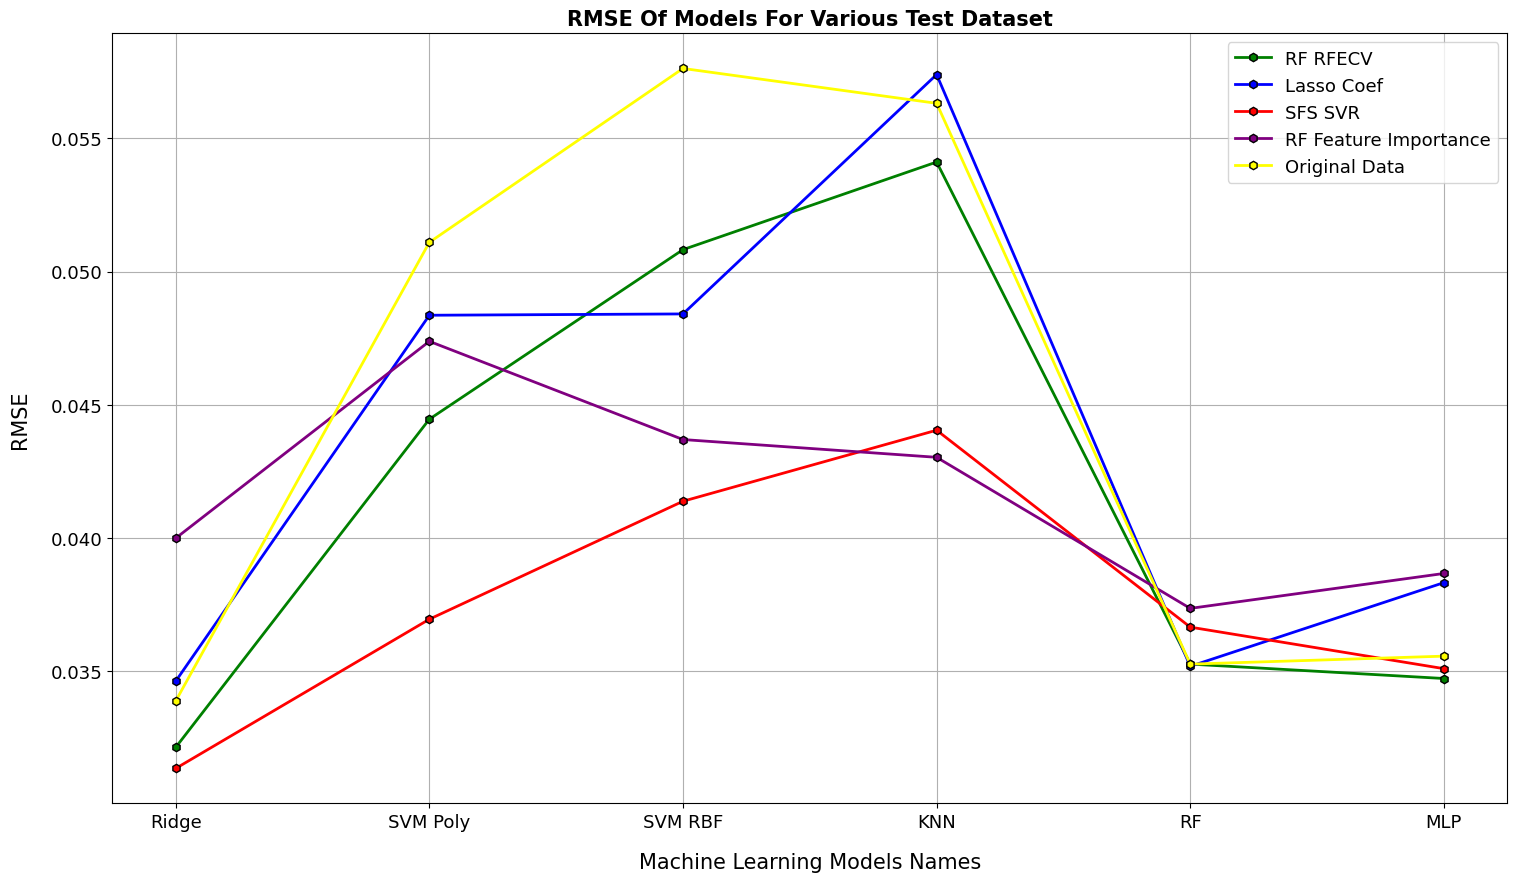

In [196]:
##Plot

#Make Color
lotsa_colors = colors.get_named_colors_mapping()
colors_chosen = ['green' , 'blue' , 'red' ,'purple','yellow' ]
colors_plot = []
for cname in colors_chosen:
    colors_plot.append(lotsa_colors[cname])
    

# Figure

fig = plt.figure(figsize=(18,10) , dpi=100)

plt.grid() 

plt.title('RMSE Of Models For Various Test Dataset' ,  fontsize = 15, weight='bold')

plt.xlabel('Machine Learning Models Names' ,  fontsize = 15, labelpad=15)
plt.ylabel('RMSE' ,  fontsize = 15 , labelpad=15)



for j,name in enumerate(Model_Final_Results['Name']):
    ind = Model_Final_Results.loc[Model_Final_Results['Name'] == name]
    plt.plot(['Ridge','SVM Poly','SVM RBF', 'KNN', 'RF','MLP'], ind.iloc[:,3::2].values.flatten(),
                 color = colors_plot[j] , marker = 'h', mec = 'k', 
         label=name, linewidth= 2)
    
    
plt.legend(bbox_to_anchor = (1, 1))
plt.rcParams.update({'font.size': 13})
plt.show()